### Deliverable 3: Preprocessing the Data for a Neural Network

In [63]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [64]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN','NAME'], axis=1)

In [65]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [66]:
# Look at APPLICATION_TYPE value counts for binning
app = (application_df["APPLICATION_TYPE"].value_counts())
app

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

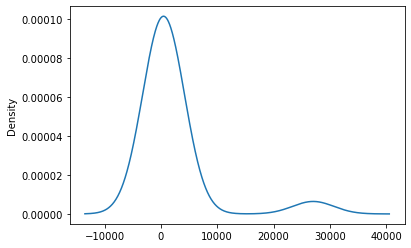

In [67]:
# Visualize the value counts of APPLICATION_TYPE
app.plot.density()

In [68]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app[app < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [69]:
# Look at CLASSIFICATION value counts for binning
classify = application_df.CLASSIFICATION.value_counts()
classify

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4500        1
C2170        1
C6100        1
C1283        1
C1248        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

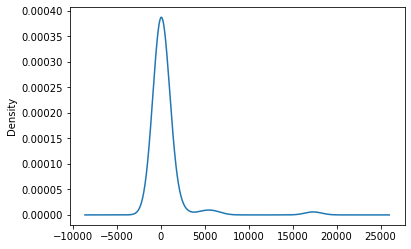

In [70]:
# Visualize the value counts of CLASSIFICATION
classify.plot.density()

In [71]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classify[classify < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [72]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [73]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  ...  INCOME_AMT_1-9999  \
0                           0.0  ...                0.0   
1                           0.0  ...                1.0   
2                           1.0  ...                0.0   
3                           1.0  ...                0.0   
4                           0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 41 columns]

In [74]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0       1     5000              1                     0.0   
1       1   108590              1                     0.0   
2       1     5000              0                     0.0   
3       1     6692              1                     0.0   
4       1   142590              1                     0.0   

   APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                   1.0                   0.0                  0.0   
1                   0.0                   0.0                  1.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  1.0   
4                   0.0                   0.0                  1.0   

   APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  0.0                  1.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 44 columns]

In [75]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [76]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 3: Attempt 1 More Neurons

In [77]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=120, 
                                   activation="relu", 
                                   input_dim=43))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=90, 
                                   activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, 
                                   activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 120)               5280      
                                                                 
 dense_13 (Dense)            (None, 90)                10890     
                                                                 
 dense_14 (Dense)            (None, 1)                 91        
                                                                 
Total params: 16,261
Trainable params: 16,261
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [79]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [80]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 4:25 - loss: 370.0033 - accuracy: 0.4688
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 10/804 [..............................] - ETA: 5s - loss: 55686.1875 - accuracy: 0.5250
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 20/804 [..............................] - ETA: 4s - loss: 54427.5000 - accuracy: 0.4891
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 30/804 [>.............................] - ETA: 4s - loss: 36761.3398 - accuracy: 0.4677
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 40/804 [>.............................] - ETA: 4s - loss: 72773.2266 - accuracy: 0.4586
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 50/804 [>........

415/804 [==============>...............] - ETA: 2s - loss: 183362.4062 - accuracy: 0.5019
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
425/804 [==============>...............] - ETA: 2s - loss: 179061.2656 - accuracy: 0.5003
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
435/804 [===============>..............] - ETA: 2s - loss: 174962.9219 - accuracy: 0.4994
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
445/804 [===============>..............] - ETA: 2s - loss: 171073.7812 - accuracy: 0.4982
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
455/804 [===============>..............] - ETA: 2s - loss: 167346.6094 - accuracy: 0.4974
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
469/804 [================

 31/804 [>.............................] - ETA: 4s - loss: 68010.1719 - accuracy: 0.5242
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
 41/804 [>.............................] - ETA: 4s - loss: 55543.4688 - accuracy: 0.5175
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
 51/804 [>.............................] - ETA: 4s - loss: 46840.5781 - accuracy: 0.5080
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
 61/804 [=>............................] - ETA: 4s - loss: 47516.6914 - accuracy: 0.4980
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
 71/804 [=>............................] - ETA: 4s - loss: 42599.0039 - accuracy: 0.4899
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
 81/804 [==>..................

451/804 [===============>..............] - ETA: 2s - loss: 51112.5039 - accuracy: 0.4748
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
461/804 [================>.............] - ETA: 1s - loss: 50790.1523 - accuracy: 0.4749
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
471/804 [================>.............] - ETA: 1s - loss: 55858.7852 - accuracy: 0.4752
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
481/804 [================>.............] - ETA: 1s - loss: 55015.7695 - accuracy: 0.4756
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
491/804 [=================>............] - ETA: 1s - loss: 57292.7500 - accuracy: 0.4758
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
501/804 [=================>...

 57/804 [=>............................] - ETA: 4s - loss: 1436.4562 - accuracy: 0.5132
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
 67/804 [=>............................] - ETA: 4s - loss: 1542.6624 - accuracy: 0.5014
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
 77/804 [=>............................] - ETA: 4s - loss: 1351.5612 - accuracy: 0.5085
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
 87/804 [==>...........................] - ETA: 4s - loss: 1212.1843 - accuracy: 0.5144
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
 97/804 [==>...........................] - ETA: 4s - loss: 1134.5347 - accuracy: 0.5158
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
107/804 [==>.......................

482/804 [================>.............] - ETA: 1s - loss: 4804.0283 - accuracy: 0.4912
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
492/804 [=================>............] - ETA: 1s - loss: 4715.7837 - accuracy: 0.4910
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
502/804 [=================>............] - ETA: 1s - loss: 5226.3994 - accuracy: 0.4916
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
514/804 [==================>...........] - ETA: 1s - loss: 5727.1948 - accuracy: 0.4924
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
524/804 [==================>...........] - ETA: 1s - loss: 5926.8818 - accuracy: 0.4933
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
532/804 [==================>.......

 98/804 [==>...........................] - ETA: 4s - loss: 29506.1777 - accuracy: 0.5124
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
108/804 [===>..........................] - ETA: 4s - loss: 26781.5957 - accuracy: 0.5150
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
118/804 [===>..........................] - ETA: 4s - loss: 24512.7012 - accuracy: 0.5180
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
128/804 [===>..........................] - ETA: 4s - loss: 22614.6250 - accuracy: 0.5164
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
138/804 [====>.........................] - ETA: 3s - loss: 20988.2168 - accuracy: 0.5127
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
148/804 [====>................

518/804 [==================>...........] - ETA: 1s - loss: 14952.2930 - accuracy: 0.5022
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
528/804 [==================>...........] - ETA: 1s - loss: 14708.7314 - accuracy: 0.5014
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
538/804 [===================>..........] - ETA: 1s - loss: 14444.0039 - accuracy: 0.5009
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
548/804 [===================>..........] - ETA: 1s - loss: 14189.9932 - accuracy: 0.5011
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
558/804 [===================>..........] - ETA: 1s - loss: 14051.3525 - accuracy: 0.5018
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
568/804 [====================>

129/804 [===>..........................] - ETA: 3s - loss: 2254.0496 - accuracy: 0.4840
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
139/804 [====>.........................] - ETA: 3s - loss: 2098.6621 - accuracy: 0.4858
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
149/804 [====>.........................] - ETA: 3s - loss: 2185.7258 - accuracy: 0.4887
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
159/804 [====>.........................] - ETA: 3s - loss: 2065.7781 - accuracy: 0.4878
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
169/804 [=====>........................] - ETA: 3s - loss: 3228.2415 - accuracy: 0.4904
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
179/804 [=====>....................

549/804 [===================>..........] - ETA: 1s - loss: 14000.7686 - accuracy: 0.4939
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
559/804 [===================>..........] - ETA: 1s - loss: 13750.5293 - accuracy: 0.4947
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
569/804 [====================>.........] - ETA: 1s - loss: 13509.7236 - accuracy: 0.4948
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
579/804 [====================>.........] - ETA: 1s - loss: 13277.7275 - accuracy: 0.4949
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
589/804 [====================>.........] - ETA: 1s - loss: 13056.8730 - accuracy: 0.4953
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
599/804 [=====================

160/804 [====>.........................] - ETA: 3s - loss: 14633.1270 - accuracy: 0.4848
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
170/804 [=====>........................] - ETA: 3s - loss: 13904.8252 - accuracy: 0.4846
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
180/804 [=====>........................] - ETA: 3s - loss: 16660.3398 - accuracy: 0.4884
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
190/804 [======>.......................] - ETA: 3s - loss: 15897.7354 - accuracy: 0.4887
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
200/804 [======>.......................] - ETA: 3s - loss: 17056.0078 - accuracy: 0.4914
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
210/804 [======>..............

580/804 [====================>.........] - ETA: 1s - loss: 8430.5547 - accuracy: 0.5085
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
590/804 [=====================>........] - ETA: 1s - loss: 8290.2041 - accuracy: 0.5084
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
600/804 [=====================>........] - ETA: 1s - loss: 8152.8052 - accuracy: 0.5091
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
610/804 [=====================>........] - ETA: 1s - loss: 8019.2368 - accuracy: 0.5098
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
620/804 [======================>.......] - ETA: 1s - loss: 7890.4082 - accuracy: 0.5098
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
630/804 [======================>...

191/804 [======>.......................] - ETA: 3s - loss: 1910.5828 - accuracy: 0.4881
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
201/804 [======>.......................] - ETA: 3s - loss: 1824.9907 - accuracy: 0.4857
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
211/804 [======>.......................] - ETA: 3s - loss: 1744.8942 - accuracy: 0.4847
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
221/804 [=======>......................] - ETA: 3s - loss: 1687.3895 - accuracy: 0.4850
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
231/804 [=======>......................] - ETA: 3s - loss: 1626.3719 - accuracy: 0.4832
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
241/804 [=======>..................

611/804 [=====================>........] - ETA: 1s - loss: 1549.5240 - accuracy: 0.4962
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
621/804 [======================>.......] - ETA: 1s - loss: 1526.1895 - accuracy: 0.4968
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
636/804 [======================>.......] - ETA: 0s - loss: 1522.6932 - accuracy: 0.4969
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
647/804 [=======================>......] - ETA: 0s - loss: 1502.3268 - accuracy: 0.4965
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
656/804 [=======================>......] - ETA: 0s - loss: 1484.0812 - accuracy: 0.4961
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoin

227/804 [=======>......................] - ETA: 3s - loss: 1409.7209 - accuracy: 0.5076
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
237/804 [=======>......................] - ETA: 3s - loss: 1416.7612 - accuracy: 0.5075
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
247/804 [========>.....................] - ETA: 3s - loss: 1370.8245 - accuracy: 0.5063
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
257/804 [========>.....................] - ETA: 3s - loss: 1333.8030 - accuracy: 0.5050
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
267/804 [========>.....................] - ETA: 3s - loss: 1515.2000 - accuracy: 0.5046
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
278/804 [=========>................


Epoch 8: saving model to checkpoints\weights.08hdf5
657/804 [=======================>......] - ETA: 0s - loss: 1056.9939 - accuracy: 0.4989
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
667/804 [=======================>......] - ETA: 0s - loss: 1042.4635 - accuracy: 0.4986
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
677/804 [========================>.....] - ETA: 0s - loss: 1031.5035 - accuracy: 0.4970
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
689/804 [========================>.....] - ETA: 0s - loss: 1164.8713 - accuracy: 0.4972
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
698/804 [=========================>....] - ETA: 0s - loss: 1156.2391 - accuracy: 0.4978
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoin

268/804 [=========>....................] - ETA: 3s - loss: 272.3317 - accuracy: 0.5163
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
278/804 [=========>....................] - ETA: 3s - loss: 265.2750 - accuracy: 0.5142
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
288/804 [=========>....................] - ETA: 2s - loss: 259.6528 - accuracy: 0.5141
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
298/804 [==========>...................] - ETA: 2s - loss: 266.6877 - accuracy: 0.5125
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
308/804 [==========>...................] - ETA: 2s - loss: 276.6732 - accuracy: 0.5119
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
318/804 [==========>...................]


Epoch 9: saving model to checkpoints\weights.09hdf5
698/804 [=========================>....] - ETA: 0s - loss: 124.6790 - accuracy: 0.5245
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
710/804 [=========================>....] - ETA: 0s - loss: 122.5836 - accuracy: 0.5248
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
718/804 [=========================>....] - ETA: 0s - loss: 121.2255 - accuracy: 0.5251
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
728/804 [==========================>...] - ETA: 0s - loss: 119.5698 - accuracy: 0.5254
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
738/804 [==========================>...] - ETA: 0s - loss: 117.9591 - accuracy: 0.5255
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\we

309/804 [==========>...................] - ETA: 2s - loss: 0.6935 - accuracy: 0.5283
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
319/804 [==========>...................] - ETA: 2s - loss: 0.6934 - accuracy: 0.5284
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.6934 - accuracy: 0.5279
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.6932 - accuracy: 0.5289
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.6931 - accuracy: 0.5297
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
359/804 [============>.................]


Epoch 10: saving model to checkpoints\weights.10hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6918 - accuracy: 0.5329
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6918 - accuracy: 0.5328
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6919 - accuracy: 0.5323
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6919 - accuracy: 0.5317
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6920 - accuracy: 0.5315
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\w

345/804 [===========>..................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5303
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
355/804 [============>.................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5308
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
365/804 [============>.................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5311
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
375/804 [============>.................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
385/804 [=============>................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5308
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
395/804 [=============>................]

770/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 12/100

Epoch 12: saving model to checkpoints\weights.12hdf5
  1/804 [..............................] - ETA: 16s - loss: 0.6636 - accuracy: 0.7500
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.6883 - accurac

391/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5320
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
401/804 [=============>................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5313
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
411/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5321
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
421/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5327
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
431/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5323
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
441/804 [===============>..............]

  7/804 [..............................] - ETA: 7s - loss: 0.6940 - accuracy: 0.5089
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.6937 - accuracy: 0.5110
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
 27/804 [>.............................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5289
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
 37/804 [>.............................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5346
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
 47/804 [>.............................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5406
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
 58/804 [=>............................]


Epoch 13: saving model to checkpoints\weights.13hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
448/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
458/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5304
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
467/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5305
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\w

 48/804 [>.............................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5358
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
 58/804 [=>............................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5366
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
 68/804 [=>............................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5299
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
 78/804 [=>............................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5288
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
 88/804 [==>...........................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5263
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
 98/804 [==>...........................]


Epoch 14: saving model to checkpoints\weights.14hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5292
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5297
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5306
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5308
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5303
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\w

 89/804 [==>...........................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5316
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
 99/804 [==>...........................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5312
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
109/804 [===>..........................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5281
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
119/804 [===>..........................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5291
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
129/804 [===>..........................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5291
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
139/804 [====>.........................]


Epoch 15: saving model to checkpoints\weights.15hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5294
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5295
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5291
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5290
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
559/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5293
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\w

130/804 [===>..........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5339
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
141/804 [====>.........................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5341
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
150/804 [====>.........................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5350
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
160/804 [====>.........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5338
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
170/804 [=====>........................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5342
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
180/804 [=====>........................]


Epoch 16: saving model to checkpoints\weights.16hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5309
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5308
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5313
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\w


Epoch 17: saving model to checkpoints\weights.17hdf5
181/804 [=====>........................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5247
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5247
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
201/804 [======>.......................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5250
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
211/804 [======>.......................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5252
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
221/804 [=======>......................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5255
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\w

601/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
651/804 [=======================>......]

218/804 [=======>......................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5314
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
227/804 [=======>......................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
237/804 [=======>......................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5309
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
247/804 [========>.....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5314
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
257/804 [========>.....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5300
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
267/804 [========>.....................]


Epoch 18: saving model to checkpoints\weights.18hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5308
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5306
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\w

258/804 [========>.....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5329
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
268/804 [=========>....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5321
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
278/804 [=========>....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
288/804 [=========>....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5317
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
298/804 [==========>...................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5320
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
308/804 [==========>...................]


Epoch 19: saving model to checkpoints\weights.19hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5304
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5307
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\w

299/804 [==========>...................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5275
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
309/804 [==========>...................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5276
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
319/804 [==========>...................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5273
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5286
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5298
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
349/804 [============>.................]


Epoch 20: saving model to checkpoints\weights.20hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\w

340/804 [===========>..................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5346
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
350/804 [============>.................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5338
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5345
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5358
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
380/804 [=============>................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5362
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
390/804 [=============>................]


Epoch 21: saving model to checkpoints\weights.21hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 22/100

Epoch 22: saving model to checkpoints\weights.22hdf5
  1/804 [..............................] - ETA: 16s - loss: 0.7129 - accuracy: 0.3750
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
 11/804 [............


Epoch 22: saving model to checkpoints\weights.22hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5353
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
401/804 [=============>................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5341
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
411/804 [==============>...............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5338
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
421/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5333
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
431/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5329
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\w

  7/804 [..............................] - ETA: 6s - loss: 0.6840 - accuracy: 0.5848
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.6927 - accuracy: 0.5202
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
 27/804 [>.............................] - ETA: 5s - loss: 0.6935 - accuracy: 0.5127
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
 37/804 [>.............................] - ETA: 4s - loss: 0.6930 - accuracy: 0.5169
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
 47/804 [>.............................] - ETA: 4s - loss: 0.6933 - accuracy: 0.5126
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
 57/804 [=>............................]


Epoch 23: saving model to checkpoints\weights.23hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5287
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
447/804 [===============>..............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5281
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5282
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5279
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5280
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\w

 48/804 [>.............................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5234
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
 58/804 [=>............................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5296
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
 68/804 [=>............................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5331
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
 78/804 [=>............................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5317
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
 88/804 [==>...........................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5369
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
 98/804 [==>...........................]


Epoch 24: saving model to checkpoints\weights.24hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5310
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5313
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5316
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\w

 88/804 [==>...........................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5327
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
 94/804 [==>...........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5309
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
104/804 [==>...........................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5325
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
114/804 [===>..........................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5321
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
124/804 [===>..........................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5310
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
134/804 [====>.........................]

509/804 [=================>............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5291
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5294
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5286
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5281
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5289
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
559/804 [===================>..........]

120/804 [===>..........................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5409
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
130/804 [===>..........................] - ETA: 4s - loss: 0.6893 - accuracy: 0.5447
Epoch 26: saving model to checkpoints\weights.26hdf5
138/804 [====>.........................] - ETA: 4s - loss: 0.6893 - accuracy: 0.5446
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
145/804 [====>.........................] - ETA: 4s - loss: 0.6896 - accuracy: 0.5429
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
155/804 [====>.........................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5401
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
165/804 [=====>........................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5388
Epoch 26:

545/804 [===================>..........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
555/804 [===================>..........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5343
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
565/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5338
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
575/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
595/804 [=====================>........]

161/804 [=====>........................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5373
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
171/804 [=====>........................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5367
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
181/804 [=====>........................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5368
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5386
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
201/804 [======>.......................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5392
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
211/804 [======>.......................]


Epoch 27: saving model to checkpoints\weights.27hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5330
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\w

207/804 [======>.......................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5261
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
217/804 [=======>......................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5253
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
227/804 [=======>......................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5263
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
237/804 [=======>......................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5281
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
247/804 [========>.....................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5273
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
257/804 [========>.....................]


Epoch 28: saving model to checkpoints\weights.28hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5338
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\w

248/804 [========>.....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5292
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
258/804 [========>.....................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5276
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
268/804 [=========>....................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5279
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
278/804 [=========>....................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5272
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
288/804 [=========>....................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5277
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
298/804 [==========>...................]


Epoch 29: saving model to checkpoints\weights.29hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\w

289/804 [=========>....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5355
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
299/804 [==========>...................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5333
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
309/804 [==========>...................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5323
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
319/804 [==========>...................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5331
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5331
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
339/804 [===========>..................]


Epoch 30: saving model to checkpoints\weights.30hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\w

330/804 [===========>..................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5364
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
340/804 [===========>..................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5364
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
350/804 [============>.................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5362
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5356
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5362
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
380/804 [=============>................]


Epoch 31: saving model to checkpoints\weights.31hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 32/100

Epoch 32: saving model to checkpoints\weights.32hdf5
  1/804 [.............


Epoch 32: saving model to checkpoints\weights.32hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5308
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5304
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
401/804 [=============>................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5305
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
411/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5299
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
421/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5298
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\w

804/804 [==============================] - 5s 6ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 33/100
  1/804 [..............................] - ETA: 2s - loss: 0.7002 - accuracy: 0.4688
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
  7/804 [..............................] - ETA: 7s - loss: 0.7013 - accuracy: 0.4598
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.6936 - accuracy: 0.5165
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
 27/804 [>.............................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5289
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
 37/804 [>.............................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5228
Epoch 33: saving model to checkpoints\weights

417/804 [==============>...............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5352
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5353
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5361
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
447/804 [===============>..............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5363
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
457/804 [================>.............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5361
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
467/804 [================>.............]

 28/804 [>.............................] - ETA: 5s - loss: 0.6925 - accuracy: 0.5201
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
 38/804 [>.............................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5255
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
 48/804 [>.............................] - ETA: 5s - loss: 0.6929 - accuracy: 0.5156
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
 58/804 [=>............................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5269
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
 68/804 [=>............................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5257
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
 78/804 [=>............................]


Epoch 34: saving model to checkpoints\weights.34hdf5
458/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5329
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5333
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5339
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5323
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\w

 69/804 [=>............................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5412
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
 79/804 [=>............................] - ETA: 5s - loss: 0.6897 - accuracy: 0.5431
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
 89/804 [==>...........................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5411
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
 99/804 [==>...........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5363
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
109/804 [===>..........................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5341
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
119/804 [===>..........................]


Epoch 35: saving model to checkpoints\weights.35hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5293
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5285
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5292
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5295
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5295
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\w

110/804 [===>..........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5349
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
120/804 [===>..........................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5341
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
130/804 [===>..........................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5380
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
140/804 [====>.........................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5388
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
150/804 [====>.........................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5377
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
160/804 [====>.........................]


Epoch 36: saving model to checkpoints\weights.36hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5361
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5361
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5357
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5353
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5355
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\w


Epoch 37: saving model to checkpoints\weights.37hdf5
161/804 [=====>........................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5318
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
171/804 [=====>........................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5347
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
181/804 [=====>........................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5350
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5357
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
201/804 [======>.......................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5370
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\w

581/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5298
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5298
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
631/804 [======================>.......]

187/804 [=====>........................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5274
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
197/804 [======>.......................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5257
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
207/804 [======>.......................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5252
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
217/804 [=======>......................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5245
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
227/804 [=======>......................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5249
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
237/804 [=======>......................]


Epoch 38: saving model to checkpoints\weights.38hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\w

228/804 [=======>......................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5360
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
238/804 [=======>......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5337
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
248/804 [========>.....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5340
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
258/804 [========>.....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5329
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
268/804 [=========>....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5345
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
278/804 [=========>....................]


Epoch 39: saving model to checkpoints\weights.39hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5311
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5295
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5303
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\w

269/804 [=========>....................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5235
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
279/804 [=========>....................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5241
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
289/804 [=========>....................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5243
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
299/804 [==========>...................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5251
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
309/804 [==========>...................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5265
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
319/804 [==========>...................]


Epoch 40: saving model to checkpoints\weights.40hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\w

305/804 [==========>...................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5377
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
315/804 [==========>...................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5367
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
325/804 [===========>..................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5362
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
335/804 [===========>..................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5365
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
345/804 [===========>..................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5370
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
355/804 [============>.................]

730/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5332
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5332
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5337
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5332
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
780/804 [============================>.]

351/804 [============>.................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5361
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
361/804 [============>.................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5359
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
371/804 [============>.................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5366
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5370
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5355
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
401/804 [=============>................]


Epoch 42: saving model to checkpoints\weights.42hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5310
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6914 - accuracy: 0.5316
Epoch 43/100
  1/804 [..............................] - ETA: 1s - loss: 0.7223 - accuracy: 0.3438
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
  7/804 [..............................] - ETA: 6s - loss: 0.6958 - accuracy: 0.5045
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.6928 - accuracy

397/804 [=============>................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5331
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
407/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5332
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
417/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5335
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5336
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5334
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
447/804 [===============>..............]

  8/804 [..............................] - ETA: 6s - loss: 0.6894 - accuracy: 0.5469
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
 18/804 [..............................] - ETA: 5s - loss: 0.6935 - accuracy: 0.5174
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
 28/804 [>.............................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5301
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
 38/804 [>.............................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5345
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
 48/804 [>.............................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5254
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
 58/804 [=>............................]

433/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5317
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
443/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5307
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
453/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5299
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
463/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5299
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5299
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
483/804 [=================>............]

 49/804 [>.............................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5293
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
 59/804 [=>............................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5344
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
 69/804 [=>............................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5371
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
 79/804 [=>............................] - ETA: 4s - loss: 0.6898 - accuracy: 0.5407
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
 89/804 [==>...........................] - ETA: 4s - loss: 0.6897 - accuracy: 0.5414
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
 99/804 [==>...........................]


Epoch 45: saving model to checkpoints\weights.45hdf5
479/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5351
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
489/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5357
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5354
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5349
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5336
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\w

 90/804 [==>...........................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5431
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
100/804 [==>...........................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5409
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
110/804 [===>..........................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5398
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
120/804 [===>..........................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5393
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
130/804 [===>..........................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5380
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
140/804 [====>.........................]


Epoch 46: saving model to checkpoints\weights.46hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5342
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5346
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5349
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5344
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5338
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\w


Epoch 47: saving model to checkpoints\weights.47hdf5
141/804 [====>.........................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5315
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
151/804 [====>.........................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5319
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
161/804 [=====>........................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5345
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
171/804 [=====>........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5318
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
181/804 [=====>........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5326
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\w


Epoch 47: saving model to checkpoints\weights.47hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5318
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5322
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5322
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5322
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\w

172/804 [=====>........................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5307
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
182/804 [=====>........................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5297
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
192/804 [======>.......................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5299
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
202/804 [======>.......................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5302
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
212/804 [======>.......................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5312
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
222/804 [=======>......................]


Epoch 48: saving model to checkpoints\weights.48hdf5
602/804 [=====================>........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5305
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5307
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5309
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5307
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5308
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\w

208/804 [======>.......................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5269
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
218/804 [=======>......................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5274
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
228/804 [=======>......................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5275
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
238/804 [=======>......................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5272
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
248/804 [========>.....................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5267
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
258/804 [========>.....................]

633/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5311
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
643/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5307
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5311
Epoch 49: saving model to checkpoints\weights.49hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5317
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5319
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5326
Epoch 49:

244/804 [========>.....................] - ETA: 3s - loss: 0.6925 - accuracy: 0.5164
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
254/804 [========>.....................] - ETA: 3s - loss: 0.6925 - accuracy: 0.5166
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
264/804 [========>.....................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5178
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
274/804 [=========>....................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5192
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
284/804 [=========>....................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5206
Epoch 50: saving model to checkpoints\weights.50hdf5
292/804 [=========>....................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5188
Epoch 50:

664/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5297
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5294
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
714/804 [=========================>....]

275/804 [=========>....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5328
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
285/804 [=========>....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5326
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
295/804 [==========>...................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5339
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
305/804 [==========>...................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5339
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
315/804 [==========>...................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5330
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
325/804 [===========>..................]


Epoch 51: saving model to checkpoints\weights.51hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\w

316/804 [==========>...................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5354
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
326/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5363
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
336/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5358
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
346/804 [===========>..................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5368
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
356/804 [============>.................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5365
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
366/804 [============>.................]

736/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5332
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5336
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5330
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5328
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5326
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
786/804 [============================>.]


Epoch 53: saving model to checkpoints\weights.53hdf5
347/804 [===========>..................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5365
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
357/804 [============>.................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5358
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
367/804 [============>.................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5357
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
377/804 [=============>................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5348
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
387/804 [=============>................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5338
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\w

762/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 54/100
  1/804 [..............................] - ETA: 2s - loss: 0.7019 - accuracy: 0.4375
Epoch 54: saving model to checkpoints\weights

373/804 [============>.................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5330
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
383/804 [=============>................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5338
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
393/804 [=============>................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5351
Epoch 54: saving model to checkpoints\weights.54hdf5
402/804 [==============>...............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5365
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
408/804 [==============>...............] - ETA: 2s - loss: 0.6905 - accuracy: 0.5372
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
418/804 [==============>...............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5369
Epoch 54:

793/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5322
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.6915 - accuracy: 0.5321
Epoch 55/100
  1/804 [..............................] - ETA: 1s - loss: 0.6938 - accuracy: 0.5000
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
  9/804 [..............................] - ETA: 6s - loss: 0.6882 - accuracy: 0.5625
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
 19/804 [..............................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5296
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
 29/804 [>.............................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5345
Epoch 55: saving model to checkpoints\weights

404/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5345
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
414/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5340
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
424/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5338
Epoch 55: saving model to checkpoints\weights.55hdf5
433/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5331
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
439/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5332
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
449/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5329
Epoch 55:


Epoch 56: saving model to checkpoints\weights.56hdf5
 20/804 [..............................] - ETA: 5s - loss: 0.6949 - accuracy: 0.5250
Epoch 56: saving model to checkpoints\weights.56hdf5
 28/804 [>.............................] - ETA: 4s - loss: 0.6953 - accuracy: 0.5212
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
 35/804 [>.............................] - ETA: 5s - loss: 0.6934 - accuracy: 0.5295
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
 45/804 [>.............................] - ETA: 5s - loss: 0.6942 - accuracy: 0.5222
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
 55/804 [=>............................] - ETA: 5s - loss: 0.6940 - accuracy: 0.5210
Epoch 56: saving model to checkpoints\weights.56hdf5
 63/804 [=>............................] - ETA: 5s - loss: 0.6934 - accuracy: 0.5243
Epoch 56:

435/804 [===============>..............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5320
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
445/804 [===============>..............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5316
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
455/804 [===============>..............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5315
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
465/804 [================>.............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5323
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
475/804 [================>.............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5316
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
485/804 [=================>............]


Epoch 57: saving model to checkpoints\weights.57hdf5
 51/804 [>.............................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5404
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
 61/804 [=>............................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5415
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
 71/804 [=>............................] - ETA: 5s - loss: 0.6897 - accuracy: 0.5440
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
 81/804 [==>...........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5390
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
 91/804 [==>...........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5398
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\w

471/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5345
Epoch 57: saving model to checkpoints\weights.57hdf5
479/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5347
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
486/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5347
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
496/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5350
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
506/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5345
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
516/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5344
Epoch 57:


Epoch 58: saving model to checkpoints\weights.58hdf5
 82/804 [==>...........................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5404
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
 92/804 [==>...........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5350
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
102/804 [==>...........................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5374
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
112/804 [===>..........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5379
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
122/804 [===>..........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5330
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\w


Epoch 58: saving model to checkpoints\weights.58hdf5
507/804 [=================>............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5296
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.6917 - accuracy: 0.5300
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
527/804 [==================>...........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5305
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5302
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5304
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\w

108/804 [===>..........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5373
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
118/804 [===>..........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5368
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
128/804 [===>..........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5369
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
138/804 [====>.........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5380
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
148/804 [====>.........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5380
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
158/804 [====>.........................]

528/804 [==================>...........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5316
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5313
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5314
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5312
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5311
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
578/804 [====================>.........]


Epoch 60: saving model to checkpoints\weights.60hdf5
144/804 [====>.........................] - ETA: 5s - loss: 0.6927 - accuracy: 0.5260
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
154/804 [====>.........................] - ETA: 4s - loss: 0.6926 - accuracy: 0.5262
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
164/804 [=====>........................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5292
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
174/804 [=====>........................] - ETA: 4s - loss: 0.6925 - accuracy: 0.5280
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
184/804 [=====>........................] - ETA: 4s - loss: 0.6926 - accuracy: 0.5267
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\w

559/804 [===================>..........] - ETA: 1s - loss: 0.6920 - accuracy: 0.5297
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.6919 - accuracy: 0.5300
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.6919 - accuracy: 0.5300
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6919 - accuracy: 0.5302
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6919 - accuracy: 0.5303
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
609/804 [=====================>........]

165/804 [=====>........................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5386
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
175/804 [=====>........................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5364
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
185/804 [=====>........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5358
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
195/804 [======>.......................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5375
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
205/804 [======>.......................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5381
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
215/804 [=======>......................]

570/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5322
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5322
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5325
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5323
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5326
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
620/804 [======================>.......]

191/804 [======>.......................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5332
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
201/804 [======>.......................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5317
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
211/804 [======>.......................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5318
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
221/804 [=======>......................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5305
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
231/804 [=======>......................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5306
Epoch 62: saving model to checkpoints\weights.62hdf5
237/804 [=======>......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5297
Epoch 62:


Epoch 62: saving model to checkpoints\weights.62hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5337
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5336
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5333
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5332
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5335
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\w

212/804 [======>.......................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5380
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
222/804 [=======>......................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5380
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
232/804 [=======>......................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5381
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
242/804 [========>.....................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5387
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
252/804 [========>.....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5361
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
262/804 [========>.....................]

636/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5300
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5308
Epoch 63: saving model to checkpoints\weights.63hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5308
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5307
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5308
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5309
Epoch 63:

225/804 [=======>......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5333
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
233/804 [=======>......................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5327
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
243/804 [========>.....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5328
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
253/804 [========>.....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5326
Epoch 64: saving model to checkpoints\weights.64hdf5
262/804 [========>.....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5327
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
268/804 [=========>....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5335
Epoch 64:

643/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5325
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5324
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5328
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5332
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5332
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
693/804 [========================>.....]


Epoch 65: saving model to checkpoints\weights.65hdf5
259/804 [========>.....................] - ETA: 4s - loss: 0.6925 - accuracy: 0.5210
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
269/804 [=========>....................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5227
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
279/804 [=========>....................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5220
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
289/804 [=========>....................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5225
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
299/804 [==========>...................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5235
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\w

679/804 [========================>.....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5303
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5308
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5309
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5311
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5309
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
729/804 [==========================>...]


Epoch 66: saving model to checkpoints\weights.66hdf5
290/804 [=========>....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5353
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
300/804 [==========>...................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5365
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
310/804 [==========>...................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5361
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
320/804 [==========>...................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5361
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
330/804 [===========>..................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5371
Epoch 66: saving model to checkpoints\weights.66hdf5
337/804 [===========>..................]


Epoch 66: saving model to checkpoints\weights.66hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5313
Epoch 66: saving model to checkpoints\weights.66hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5312
Epoch 66: saving model to checkpoints\weights.66hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5307
Epoch 66: saving model to checkpoints\weights.66hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5307
Epoch 66: saving model to checkpoints\weights.66hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5308
Epoch 66: saving model to checkpoints\weights.66hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5309
Epoch 66: saving model to checkpoints\weights.66hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5309
Epoch 66: saving model to checkpo

271/804 [=========>....................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5361
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
281/804 [=========>....................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5364
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
291/804 [=========>....................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5369
Epoch 67: saving model to checkpoints\weights.67hdf5
299/804 [==========>...................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5376
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
306/804 [==========>...................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5370
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
316/804 [==========>...................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5363
Epoch 67:

690/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5311
Epoch 67: saving model to checkpoints\weights.67hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5311
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 67:

297/804 [==========>...................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5364
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
307/804 [==========>...................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5365
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
317/804 [==========>...................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5360
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
327/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5354
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
337/804 [===========>..................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5361
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
347/804 [===========>..................]


Epoch 68: saving model to checkpoints\weights.68hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5329
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5329
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5327
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5331
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5331
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\w

308/804 [==========>...................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5287
Epoch 69: saving model to checkpoints\weights.69hdf5
313/804 [==========>...................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5287
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
323/804 [===========>..................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5282
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
333/804 [===========>..................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5276
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5278
Epoch 69: saving model to checkpoints\weights.69hdf5
352/804 [============>.................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5281
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69:

698/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5298
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5301
Epoch 69: saving model to checkpoints\weights.69hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5305
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5308
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5306
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 69:


Epoch 70: saving model to checkpoints\weights.70hdf5
294/804 [=========>....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5352
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
304/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5348
Epoch 70: saving model to checkpoints\weights.70hdf5
311/804 [==========>...................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5342
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
319/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5336
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
329/804 [===========>..................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5340
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
339/804 [===========>..................]

704/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5340
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5333
Epoch 70: saving model to checkpoints\weights.70hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5332
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5331
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5328
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5333
Epoch 70:

300/804 [==========>...................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5258
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
310/804 [==========>...................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5261
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
320/804 [==========>...................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5266
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
330/804 [===========>..................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5257
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
340/804 [===========>..................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5256
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
350/804 [============>.................]

698/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5327
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5326
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5318
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5319
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
745/804 [==========================>...]

291/804 [=========>....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5328
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
301/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5335
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
311/804 [==========>...................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5318
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
321/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5309
Epoch 72: saving model to checkpoints\weights.72hdf5
330/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5317
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
336/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5319
Epoch 72:

710/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5327
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5329
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5328
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5329
Epoch 72: saving model to checkpoints\weights.72hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5332
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5334
Epoch 72:

312/804 [==========>...................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5343
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
322/804 [===========>..................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5341
Epoch 73: saving model to checkpoints\weights.73hdf5
331/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5338
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
337/804 [===========>..................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5331
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
347/804 [===========>..................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5330
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
357/804 [============>.................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5341
Epoch 73:


Epoch 73: saving model to checkpoints\weights.73hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5338
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5337
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5336
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5329
Epoch 73: saving model to checkpoints\weights.73hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5328
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
772/804 [===========================>..]


Epoch 74: saving model to checkpoints\weights.74hdf5
323/804 [===========>..................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5355
Epoch 74: saving model to checkpoints\weights.74hdf5
332/804 [===========>..................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5338
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
338/804 [===========>..................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5321
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
348/804 [===========>..................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5314
Epoch 74: saving model to checkpoints\weights.74hdf5
356/804 [============>.................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5321
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
363/804 [============>.................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5321
Epoch 74:

723/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5321
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5329
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5330
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5318
Epoch 74: saving model to checkpoints\weights.74hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5321
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5323
Epoch 74:

314/804 [==========>...................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5321
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
324/804 [===========>..................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5315
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
334/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5324
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
344/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5335
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
354/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5315
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
364/804 [============>.................]

738/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5330
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5331
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5329
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5322
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5318
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
784/804 [============================>.]

340/804 [===========>..................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5301
Epoch 76: saving model to checkpoints\weights.76hdf5
349/804 [============>.................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5304
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
355/804 [============>.................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5311
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
365/804 [============>.................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5308
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
375/804 [============>.................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5312
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
385/804 [=============>................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5303
Epoch 76:

752/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5340
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5338
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5330
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5329
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5326
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
804/804 [==============================]


Epoch 77: saving model to checkpoints\weights.77hdf5
351/804 [============>.................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5270
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
361/804 [============>.................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5278
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
371/804 [============>.................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5269
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
381/804 [=============>................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5270
Epoch 77: saving model to checkpoints\weights.77hdf5
390/804 [=============>................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5269
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
396/804 [=============>................]

751/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
804/804 [==============================]

347/804 [===========>..................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5285
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
357/804 [============>.................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5296
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
367/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5310
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
377/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5307
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
387/804 [=============>................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5296
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
397/804 [=============>................]

766/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5313
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5317
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5323
Epoch 78: saving model to checkpoints\weights.78hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5321
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5324
Epoch 78: saving model to checkpoints\weights.78hdf5
804/804 [==============================] - 6s 8ms/step - loss: 0.6914 - accuracy: 0.5321
Epoch 79/100
  1/804 [..............................] - ETA

362/804 [============>.................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5322
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
368/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5315
Epoch 79: saving model to checkpoints\weights.79hdf5
373/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5310
Epoch 79: saving model to checkpoints\weights.79hdf5
378/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5312
Epoch 79: saving model to checkpoints\weights.79hdf5
384/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5314
Epoch 79: saving model to checkpoints\weights.79hdf5
391/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5316
Epoch 79: saving model to checkpoints\weights.79hdf5
395/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5309
Epoch 79: saving model to checkpo


Epoch 79: saving model to checkpoints\weights.79hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5322
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5321
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5318
Epoch 79: saving model to checkpoints\weights.79hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5316
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5320
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
804/804 [==============================]

344/804 [===========>..................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5250
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
354/804 [============>.................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5252
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
364/804 [============>.................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5256
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
374/804 [============>.................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5257
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
384/804 [=============>................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5262
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
394/804 [=============>................]

764/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 80: saving model to checkpoints\weights.80hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 80: saving model to checkpoints\weights.80hdf5
804/804 [==============================] - 6s 8ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 81/100
  1/804 [..............................] - ETA


Epoch 81: saving model to checkpoints\weights.81hdf5
375/804 [============>.................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5279
Epoch 81: saving model to checkpoints\weights.81hdf5
380/804 [=============>................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5284
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
390/804 [=============>................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5281
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
400/804 [=============>................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5277
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
410/804 [==============>...............] - ETA: 2s - loss: 0.6921 - accuracy: 0.5266
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
420/804 [==============>...............]

780/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5327
Epoch 81: saving model to checkpoints\weights.81hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 81: saving model to checkpoints\weights.81hdf5
804/804 [==============================] - 6s 8ms/step - loss: 0.6914 - accuracy: 0.5321
Epoch 82/100

Epoch 82: saving model to checkpoints\weights.82hdf5
  1/804 [..............................] - ETA: 29s - loss: 0.7060 - accuracy: 0.4062
Epoch 82: saving model to checkpoints\weights.82hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.6962 - accuracy: 0.4844 
Epoch 82: saving model to checkpoints\weights.82hdf5
 13/804 [..............................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5216
Epoch 82: sav

346/804 [===========>..................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5315
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
356/804 [============>.................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5312
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
366/804 [============>.................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5307
Epoch 82: saving model to checkpoints\weights.82hdf5
375/804 [============>.................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5313
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
381/804 [=============>................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5314
Epoch 82: saving model to checkpoints\weights.82hdf5
387/804 [=============>................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5313
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82:

751/804 [===========================>..] - ETA: 0s - loss: 0.6917 - accuracy: 0.5312
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6917 - accuracy: 0.5314
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6917 - accuracy: 0.5311
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5315
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5318
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
804/804 [==============================]

342/804 [===========>..................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5400
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
352/804 [============>.................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5407
Epoch 83: saving model to checkpoints\weights.83hdf5
360/804 [============>.................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5394
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
367/804 [============>.................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5393
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
377/804 [=============>................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5409
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
387/804 [=============>................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5408
Epoch 83:

752/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5330
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5328
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5327
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
804/804 [==============================]

352/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5326
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
358/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5322
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
368/804 [============>.................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5313
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
378/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5313
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
388/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5313
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
398/804 [=============>................]

748/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5318
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5322
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5322
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5319
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5327
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
798/804 [============================>.]

344/804 [===========>..................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5352
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
354/804 [============>.................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5347
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
364/804 [============>.................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5342
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
374/804 [============>.................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5338
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
384/804 [=============>................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5342
Epoch 85: saving model to checkpoints\weights.85hdf5
389/804 [=============>................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5333
Epoch 85:


Epoch 85: saving model to checkpoints\weights.85hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\w

345/804 [===========>..................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5327
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
355/804 [============>.................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5332
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
365/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5319
Epoch 86: saving model to checkpoints\weights.86hdf5
374/804 [============>.................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5309
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
380/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5318
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
390/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5317
Epoch 86:

750/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5329
Epoch 86: saving model to checkpoints\weights.86hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5329
Epoch 86: saving model to checkpoints\weights.86hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5332
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5324
Epoch 86: saving model to checkpoints\weights.86hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5321
Epoch 86: saving model to checkpoints\weights.86hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5320
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.691

314/804 [==========>...................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5294
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
321/804 [==========>...................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5287
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
331/804 [===========>..................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5278
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
341/804 [===========>..................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5288
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
351/804 [============>.................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5282
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
361/804 [============>.................]

720/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5319
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5322
Epoch 87: saving model to checkpoints\weights.87hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5328
Epoch 87: saving model to checkpoints\weights.87hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5326
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5330
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5332
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87:


Epoch 88: saving model to checkpoints\weights.88hdf5
317/804 [==========>...................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5344
Epoch 88: saving model to checkpoints\weights.88hdf5
326/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5331
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
332/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5327
Epoch 88: saving model to checkpoints\weights.88hdf5
339/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5333
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
347/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5324
Epoch 88: saving model to checkpoints\weights.88hdf5
356/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5310
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88:

722/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5327
Epoch 88: saving model to checkpoints\weights.88hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5329
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5329
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5330
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5328
Epoch 88: saving model to checkpoints\weights.88hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5323
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88:

315/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5305
Epoch 89: saving model to checkpoints\weights.89hdf5
321/804 [==========>...................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5298
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
328/804 [===========>..................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5290
Epoch 89: saving model to checkpoints\weights.89hdf5
336/804 [===========>..................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5308
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5316
Epoch 89: saving model to checkpoints\weights.89hdf5
351/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5308
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
358/804 [=

698/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5330
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5322
Epoch 89: saving model to checkpoints\weights.89hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5317
Epoch 89: saving model to checkpoints\weights.89hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5314
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5309
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5307
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89:

294/804 [=========>....................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5299
Epoch 90: saving model to checkpoints\weights.90hdf5
302/804 [==========>...................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5294
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
309/804 [==========>...................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5300
Epoch 90: saving model to checkpoints\weights.90hdf5
318/804 [==========>...................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5290
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
324/804 [===========>..................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5283
Epoch 90: saving model to checkpoints\weights.90hdf5
333/804 [===========>..................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5283
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
339/804 [=


Epoch 90: saving model to checkpoints\weights.90hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5303
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5305
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6917 - accuracy: 0.5304
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5309
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5307
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\w


Epoch 91: saving model to checkpoints\weights.91hdf5
315/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5333
Epoch 91: saving model to checkpoints\weights.91hdf5
324/804 [===========>..................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5330
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
330/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5339
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
340/804 [===========>..................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5326
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
350/804 [============>.................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5327
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
360/804 [============>.................]

720/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5331
Epoch 91: saving model to checkpoints\weights.91hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5328
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5327
Epoch 91: saving model to checkpoints\weights.91hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5325
Epoch 91: saving model to checkpoints\weights.91hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5322
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5319
Epoch 91: saving model to checkpoints\weights.91hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.691

298/804 [==========>...................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5281
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
306/804 [==========>...................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5285
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
316/804 [==========>...................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5280
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
326/804 [===========>..................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5275
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
336/804 [===========>..................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5259
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
346/804 [===========>..................]

706/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5314
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
756/804 [===========================>..]

317/804 [==========>...................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5236
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
327/804 [===========>..................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5244
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
337/804 [===========>..................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5252
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
347/804 [===========>..................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5254
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
357/804 [============>.................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5271
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
367/804 [============>.................]

722/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5316
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5314
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5313
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5319
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
772/804 [===========================>..]


Epoch 94: saving model to checkpoints\weights.94hdf5
323/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5324
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
333/804 [===========>..................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5307
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5300
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
353/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5318
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
363/804 [============>.................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5323
Epoch 94: saving model to checkpoints\weights.94hdf5
371/804 [============>.................]

698/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5304
Epoch 94: saving model to checkpoints\weights.94hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5305
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5304
Epoch 94: saving model to checkpoints\weights.94hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5302
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6917 - accuracy: 0.5306
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5312
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94:

294/804 [=========>....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5324
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
304/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5335
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
314/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5338
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
324/804 [===========>..................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5353
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
334/804 [===========>..................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5342
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
344/804 [===========>..................]

714/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5334
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5330
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5335
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5337
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5338
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
764/804 [===========================>..]


Epoch 96: saving model to checkpoints\weights.96hdf5
325/804 [===========>..................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5286
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
335/804 [===========>..................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5281
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
345/804 [===========>..................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5282
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
355/804 [============>.................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5284
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
365/804 [============>.................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5278
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\w

740/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5313
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5319
Epoch 96: saving model to checkpoints\weights.96hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5322
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5324
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5325
Epoch 96: saving model to checkpoints\weights.96hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5321
Epoch 96: saving model to checkpoints\weights.96hdf5
789/804 [=

311/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5334
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
321/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5337
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
331/804 [===========>..................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5338
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
341/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5333
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
351/804 [============>.................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5335
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
361/804 [============>.................]

726/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5311
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5306
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5309
Epoch 97: saving model to checkpoints\weights.97hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5310
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5315
Epoch 97:


Epoch 98: saving model to checkpoints\weights.98hdf5
337/804 [===========>..................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5324
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
347/804 [===========>..................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5315
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
357/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5324
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
367/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5320
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
377/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5317
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\w


Epoch 98: saving model to checkpoints\weights.98hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5329
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5329
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5328
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5323
Epoch 98: saving model to checkpoints\weights.98hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5322
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
804/804 [==============================]

361/804 [============>.................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5357
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
368/804 [============>.................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5352
Epoch 99: saving model to checkpoints\weights.99hdf5
376/804 [=============>................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5358
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
383/804 [=============>................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5344
Epoch 99: saving model to checkpoints\weights.99hdf5
388/804 [=============>................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5358
Epoch 99: saving model to checkpoints\weights.99hdf5
393/804 [=============>................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5364
Epoch 99: saving model to checkpoints\weights.99hdf5
398/804 [=============>................] - ETA: 3s - loss: 0.690

758/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 99: saving model to checkpoints\weights.99hdf5
804/804 [==============================] - 6s 8ms/step - loss: 0.6913 - accuracy: 0.5311
Epoch

349/804 [============>.................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5295
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
359/804 [============>.................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5293
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
369/804 [============>.................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5291
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
379/804 [=============>................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5294
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
389/804 [=============>................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5298
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
399/804 [===========

754/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5354
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5343
Epoch 100: saving model to checkpoints\weights.100hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5339
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5333
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy

In [81]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7854 - accuracy: 0.4667 - 441ms/epoch - 2ms/step
Loss: 0.7853791117668152, Accuracy: 0.4667055308818817


### Attempt 2: Add layer

In [82]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=150, 
                                   activation="relu", 
                                   input_dim=43))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=70, 
                                   activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=50, 
                                   activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, 
                                   activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 150)               6600      
                                                                 
 dense_16 (Dense)            (None, 70)                10570     
                                                                 
 dense_17 (Dense)            (None, 50)                3550      
                                                                 
 dense_18 (Dense)            (None, 1)                 51        
                                                                 
Total params: 20,771
Trainable params: 20,771
Non-trainable params: 0
_________________________________________________________________


In [83]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [84]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [85]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 6:12 - loss: 178.5719 - accuracy: 0.6875
Epoch 1: saving model to checkpoints\weights.01hdf5
  9/804 [..............................] - ETA: 5s - loss: 3356.0039 - accuracy: 0.4931 
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 15/804 [..............................] - ETA: 6s - loss: 2534.2551 - accuracy: 0.4896
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 25/804 [..............................] - ETA: 6s - loss: 2121.5898 - accuracy: 0.4988
Epoch 1: saving model to checkpoints\weights.01hdf5
 34/804 [>.............................] - ETA: 5s - loss: 1794.6180 - accuracy: 0.4881
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 40/804 [>.............................] - ETA: 6s - loss: 20063.1074 - accuracy: 0.4891
Epoch 1: saving model to checkpoints\w

385/804 [=============>................] - ETA: 3s - loss: 63920.7070 - accuracy: 0.4904
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
395/804 [=============>................] - ETA: 3s - loss: 62302.7695 - accuracy: 0.4912
Epoch 1: saving model to checkpoints\weights.01hdf5
404/804 [==============>...............] - ETA: 3s - loss: 60918.8477 - accuracy: 0.4939
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
410/804 [==============>...............] - ETA: 3s - loss: 60027.8594 - accuracy: 0.4939
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
420/804 [==============>...............] - ETA: 3s - loss: 58601.1328 - accuracy: 0.4944
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
430/804 [===============>..............] - ETA: 3s - loss: 57247.8984 - accuracy: 0

755/804 [===========================>..] - ETA: 0s - loss: 40538.1523 - accuracy: 0.4923
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
765/804 [===========================>..] - ETA: 0s - loss: 40068.5898 - accuracy: 0.4921
Epoch 1: saving model to checkpoints\weights.01hdf5
772/804 [===========================>..] - ETA: 0s - loss: 39780.4414 - accuracy: 0.4917
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
780/804 [============================>.] - ETA: 0s - loss: 39373.1523 - accuracy: 0.4913
Epoch 1: saving model to checkpoints\weights.01hdf5
785/804 [============================>.] - ETA: 0s - loss: 39130.5859 - accuracy: 0.4914
Epoch 1: saving model to checkpoints\weights.01hdf5
792/804 [============================>.] - ETA: 0s - loss: 38787.6914 - accuracy: 0.4913
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01

311/804 [==========>...................] - ETA: 4s - loss: 10240.6650 - accuracy: 0.5072
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
321/804 [==========>...................] - ETA: 4s - loss: 9921.8945 - accuracy: 0.5081 
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
331/804 [===========>..................] - ETA: 4s - loss: 9623.0918 - accuracy: 0.5091
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
341/804 [===========>..................] - ETA: 4s - loss: 9347.3232 - accuracy: 0.5085
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
351/804 [============>.................] - ETA: 3s - loss: 9092.9873 - accuracy: 0.5086
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
361/804 [============>...........

701/804 [=========================>....] - ETA: 0s - loss: 21620.1250 - accuracy: 0.4925
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
711/804 [=========================>....] - ETA: 0s - loss: 21385.0469 - accuracy: 0.4925
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
721/804 [=========================>....] - ETA: 0s - loss: 21905.5469 - accuracy: 0.4919
Epoch 2: saving model to checkpoints\weights.02hdf5
728/804 [==========================>...] - ETA: 0s - loss: 25320.5293 - accuracy: 0.4912
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
736/804 [==========================>...] - ETA: 0s - loss: 25053.8477 - accuracy: 0.4914
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
746/804 [==========================>...] - ETA: 0s - loss: 24752.7109 - accuracy: 0

282/804 [=========>....................] - ETA: 4s - loss: 1118.7355 - accuracy: 0.4789
Epoch 3: saving model to checkpoints\weights.03hdf5
291/804 [=========>....................] - ETA: 4s - loss: 1099.2002 - accuracy: 0.4798
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
297/804 [==========>...................] - ETA: 4s - loss: 1078.3182 - accuracy: 0.4806
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
307/804 [==========>...................] - ETA: 4s - loss: 1049.4476 - accuracy: 0.4834
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
317/804 [==========>...................] - ETA: 4s - loss: 1045.8381 - accuracy: 0.4853
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
327/804 [===========>..................] - ETA: 4s - loss: 1034.2142 - accuracy: 0.4859


687/804 [========================>.....] - ETA: 0s - loss: 1825.5767 - accuracy: 0.4963
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
697/804 [=========================>....] - ETA: 0s - loss: 1799.3998 - accuracy: 0.4972
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
707/804 [=========================>....] - ETA: 0s - loss: 1773.9648 - accuracy: 0.4973
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
717/804 [=========================>....] - ETA: 0s - loss: 1749.2386 - accuracy: 0.4975
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
727/804 [==========================>...] - ETA: 0s - loss: 1725.1920 - accuracy: 0.4979
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
737/804 [==========================

248/804 [========>.....................] - ETA: 5s - loss: 0.8625 - accuracy: 0.5309
Epoch 4: saving model to checkpoints\weights.04hdf5
253/804 [========>.....................] - ETA: 5s - loss: 0.8618 - accuracy: 0.5301
Epoch 4: saving model to checkpoints\weights.04hdf5
259/804 [========>.....................] - ETA: 5s - loss: 0.8612 - accuracy: 0.5290
Epoch 4: saving model to checkpoints\weights.04hdf5
264/804 [========>.....................] - ETA: 5s - loss: 0.8607 - accuracy: 0.5281
Epoch 4: saving model to checkpoints\weights.04hdf5
268/804 [=========>....................] - ETA: 5s - loss: 0.8593 - accuracy: 0.5283
Epoch 4: saving model to checkpoints\weights.04hdf5
273/804 [=========>....................] - ETA: 5s - loss: 0.8572 - accuracy: 0.5291
Epoch 4: saving model to checkpoints\weights.04hdf5
278/804 [=========>....................] - ETA: 4s - loss: 0.8558 - accuracy: 0.5291
Epoch 4: saving model to checkpoints\weights.04hdf5
283/804 [=========>....................] 

627/804 [======================>.......] - ETA: 1s - loss: 0.7860 - accuracy: 0.5325
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
633/804 [======================>.......] - ETA: 1s - loss: 0.7852 - accuracy: 0.5326
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
643/804 [======================>.......] - ETA: 1s - loss: 0.7836 - accuracy: 0.5333
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.7823 - accuracy: 0.5335
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.7811 - accuracy: 0.5335
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
673/804 [========================>.....] - ETA: 1s

217/804 [=======>......................] - ETA: 4s - loss: 0.6949 - accuracy: 0.5276
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
224/804 [=======>......................] - ETA: 4s - loss: 0.6948 - accuracy: 0.5282
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
234/804 [=======>......................] - ETA: 4s - loss: 0.6946 - accuracy: 0.5287
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
244/804 [========>.....................] - ETA: 4s - loss: 0.6943 - accuracy: 0.5295
Epoch 5: saving model to checkpoints\weights.05hdf5
252/804 [========>.....................] - ETA: 4s - loss: 0.6946 - accuracy: 0.5281
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
259/804 [========>.....................] - ETA: 4s - loss: 0.6949 - accuracy: 0.5263
Epoch 5: saving mo


Epoch 5: saving model to checkpoints\weights.05hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6923 - accuracy: 0.5331
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6923 - accuracy: 0.5330
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.6923 - accuracy: 0.5328
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6924 - accuracy: 0.5322
Epoch 5: saving model to checkpoints\weights.05hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6923 - accuracy: 0.5328
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
669/804 [=======================>......] - ETA: 1s

205/804 [======>.......................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5299
Epoch 6: saving model to checkpoints\weights.06hdf5
210/804 [======>.......................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5293
Epoch 6: saving model to checkpoints\weights.06hdf5
216/804 [=======>......................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5273
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
225/804 [=======>......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5292
Epoch 6: saving model to checkpoints\weights.06hdf5
233/804 [=======>......................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5318
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
240/804 [=======>......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5296
Epoch 6: saving model to checkpoints\weights.06hdf5
249/804 [========>.....................] - ETA: 4s - loss: 0.6914 - accu

562/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5313
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 6: saving model to checkpoints\weights.06hdf5
575/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5311
Epoch 6: saving model to checkpoints\weights.06hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 6: saving model to checkpoints\weights.06hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
605/804 [==========

155/804 [====>.........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5321
Epoch 7: saving model to checkpoints\weights.07hdf5
160/804 [====>.........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5330
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
166/804 [=====>........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5320
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
176/804 [=====>........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5309
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
186/804 [=====>........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5316
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
196/804 [======>.......................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5297
Epoch 7: saving mo

546/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5317
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
556/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 7: saving model to checkpoints\weights.07hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5306
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5304
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5300
Epoch 7: saving mo

127/804 [===>..........................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5204
Epoch 8: saving model to checkpoints\weights.08hdf5
136/804 [====>.........................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5202
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
142/804 [====>.........................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5242
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
152/804 [====>.........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5294
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
162/804 [=====>........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5312
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
172/804 [=====>........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5316
Epoch 8: saving mo

527/804 [==================>...........] - ETA: 2s - loss: 0.6906 - accuracy: 0.5360
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.6906 - accuracy: 0.5361
Epoch 8: saving model to checkpoints\weights.08hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.6906 - accuracy: 0.5360
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5357
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5368
Epoch 8: saving model to checkpoints\weights.08hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5365
Epoch 8: saving model to checkpoints\weights.08hdf5
573/804 [==========

 83/804 [==>...........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5264
Epoch 9: saving model to checkpoints\weights.09hdf5
 91/804 [==>...........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5271
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
 98/804 [==>...........................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5249
Epoch 9: saving model to checkpoints\weights.09hdf5
105/804 [==>...........................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5235
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
113/804 [===>..........................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5249
Epoch 9: saving model to checkpoints\weights.09hdf5
122/804 [===>..........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5289
Epoch 9: saving model to checkpoints\weights.09hdf5
127/804 [===>..........................] - ETA: 6s - loss: 0.6918 - accu

463/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5299
Epoch 9: saving model to checkpoints\weights.09hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5297
Epoch 9: saving model to checkpoints\weights.09hdf5
475/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5296
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
483/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5291
Epoch 9: saving model to checkpoints\weights.09hdf5
490/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5293
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
498/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5293
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
508/804 [==========

 44/804 [>.............................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5227
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
 54/804 [=>............................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5307
Epoch 10: saving model to checkpoints\weights.10hdf5
 62/804 [=>............................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5318
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
 69/804 [=>............................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5317
Epoch 10: saving model to checkpoints\weights.10hdf5
 77/804 [=>............................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5333
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
 84/804 [==>...........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5324
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10:

442/804 [===============>..............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5284
Epoch 10: saving model to checkpoints\weights.10hdf5
447/804 [===============>..............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5280
Epoch 10: saving model to checkpoints\weights.10hdf5
450/804 [===============>..............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5274
Epoch 10: saving model to checkpoints\weights.10hdf5
457/804 [================>.............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5273
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
464/804 [================>.............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5271
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5270
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
484/804 [=

 20/804 [..............................] - ETA: 6s - loss: 0.6956 - accuracy: 0.5063
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
 30/804 [>.............................] - ETA: 6s - loss: 0.6952 - accuracy: 0.5083
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
 40/804 [>.............................] - ETA: 6s - loss: 0.6930 - accuracy: 0.5227
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
 50/804 [>.............................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5300
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
 60/804 [=>............................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5307
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
 70/804 [=>............................]


Epoch 11: saving model to checkpoints\weights.11hdf5
395/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5297
Epoch 11: saving model to checkpoints\weights.11hdf5
403/804 [==============>...............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5297
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
410/804 [==============>...............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5295
Epoch 11: saving model to checkpoints\weights.11hdf5
419/804 [==============>...............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5282
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
425/804 [==============>...............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5279
Epoch 11: saving model to checkpoints\weights.11hdf5
430/804 [===============>..............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5289
Epoch 11: saving model to checkpoints\weights.11hdf5
439/804 [=

780/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 11: saving model to checkpoints\weights.11hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 11: saving model to checkpoints\weights.11hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 12/100

Epoch 12: saving model to checkpoints\weights.12hdf5
  1/804 [..............................] - ETA: 28s - loss: 0.6824 - accuracy: 0.5938
Epoch 12: saving model to checkpoints\weights.12hdf5
  7/804 [..............................] - ETA: 6s - loss: 0.6803 - accuracy: 0.6071 
Epoch 12: saving model to checkpoints\weights.12hdf5
 15/804 [..............................] - ETA: 5s - loss: 0.6822 - accuracy: 0.5917
Epoch 12: sav


Epoch 12: saving model to checkpoints\weights.12hdf5
361/804 [============>.................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5353
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
371/804 [============>.................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5361
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
381/804 [=============>................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5363
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
391/804 [=============>................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5356
Epoch 12: saving model to checkpoints\weights.12hdf5
399/804 [=============>................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5355
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
406/804 [==============>...............]

749/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 12: saving model to checkpoints\weights.12hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 12:

346/804 [===========>..................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5353
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
352/804 [============>.................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5358
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
362/804 [============>.................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5344
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
372/804 [============>.................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5343
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
382/804 [=============>................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5352
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
392/804 [=============>................]

715/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 13: saving model to checkpoints\weights.13hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 13:

297/804 [==========>...................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5317
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
303/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5324
Epoch 14: saving model to checkpoints\weights.14hdf5
311/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5326
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
318/804 [==========>...................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5312
Epoch 14: saving model to checkpoints\weights.14hdf5
323/804 [===========>..................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5305
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
333/804 [===========>..................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5306
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14:

687/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5309
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 14: saving model to checkpoints\weights.14hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 14:

244/804 [========>.....................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5332
Epoch 15: saving model to checkpoints\weights.15hdf5
250/804 [========>.....................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5337
Epoch 15: saving model to checkpoints\weights.15hdf5
255/804 [========>.....................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5352
Epoch 15: saving model to checkpoints\weights.15hdf5
262/804 [========>.....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5339
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
269/804 [=========>....................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5345
Epoch 15: saving model to checkpoints\weights.15hdf5
276/804 [=========>....................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5360
Epoch 15: saving model to checkpoints\weights.15hdf5
283/804 [=========>....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5354
Epoch 15: saving model to checkpo

629/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5338
Epoch 15: saving model to checkpoints\weights.15hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5338
Epoch 15: saving model to checkpoints\weights.15hdf5
643/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5334
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5333
Epoch 15: saving model to checkpoints\weights.15hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5333
Epoch 15: saving model to checkpoints\weights.15hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5335
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.691


Epoch 16: saving model to checkpoints\weights.16hdf5
175/804 [=====>........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5345
Epoch 16: saving model to checkpoints\weights.16hdf5
182/804 [=====>........................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5350
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
190/804 [======>.......................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5367
Epoch 16: saving model to checkpoints\weights.16hdf5
198/804 [======>.......................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5372
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
205/804 [======>.......................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5372
Epoch 16: saving model to checkpoints\weights.16hdf5
210/804 [======>.......................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5378
Epoch 16: saving model to checkpoints\weights.16hdf5
215/804 [=


Epoch 16: saving model to checkpoints\weights.16hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5348
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5350
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5349
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5348
Epoch 16: saving model to checkpoints\weights.16hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5351
Epoch 16: saving model to checkpoints\weights.16hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5351
Epoch 16:

156/804 [====>.........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5260
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
166/804 [=====>........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5254
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
176/804 [=====>........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5261
Epoch 17: saving model to checkpoints\weights.17hdf5
181/804 [=====>........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5271
Epoch 17: saving model to checkpoints\weights.17hdf5
190/804 [======>.......................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5278
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
196/804 [======>.......................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5290
Epoch 17: saving model to checkpoints\weights.17hdf5
201/804 [=

551/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5320
Epoch 17: saving model to checkpoints\weights.17hdf5
556/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5320
Epoch 17: saving model to checkpoints\weights.17hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5319
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5322
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5316
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17:

132/804 [===>..........................] - ETA: 6s - loss: 0.6892 - accuracy: 0.5459
Epoch 18: saving model to checkpoints\weights.18hdf5
139/804 [====>.........................] - ETA: 6s - loss: 0.6894 - accuracy: 0.5452
Epoch 18: saving model to checkpoints\weights.18hdf5
143/804 [====>.........................] - ETA: 6s - loss: 0.6895 - accuracy: 0.5446
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
152/804 [====>.........................] - ETA: 6s - loss: 0.6901 - accuracy: 0.5409
Epoch 18: saving model to checkpoints\weights.18hdf5
157/804 [====>.........................] - ETA: 6s - loss: 0.6895 - accuracy: 0.5442
Epoch 18: saving model to checkpoints\weights.18hdf5
164/804 [=====>........................] - ETA: 5s - loss: 0.6895 - accuracy: 0.5442
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
172/804 [=====>........................] - ETA: 5s - loss: 0.689

497/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5331
Epoch 18: saving model to checkpoints\weights.18hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5322
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
512/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5328
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
522/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5328
Epoch 18: saving model to checkpoints\weights.18hdf5
528/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5323
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5329
Epoch 18: saving model to checkpoints\weights.18hdf5
546/804 [=

 73/804 [=>............................] - ETA: 6s - loss: 0.6901 - accuracy: 0.5420
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
 83/804 [==>...........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5377
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
 93/804 [==>...........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5363
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
103/804 [==>...........................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5361
Epoch 19: saving model to checkpoints\weights.19hdf5
112/804 [===>..........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5405
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
118/804 [===>..........................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5389
Epoch 19:

463/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5331
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5328
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
483/804 [=================>............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5333
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
493/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5328
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
503/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5328
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
513/804 [==================>...........]


Epoch 20: saving model to checkpoints\weights.20hdf5
 49/804 [>.............................] - ETA: 7s - loss: 0.6877 - accuracy: 0.5555
Epoch 20: saving model to checkpoints\weights.20hdf5
 57/804 [=>............................] - ETA: 6s - loss: 0.6879 - accuracy: 0.5537
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
 64/804 [=>............................] - ETA: 6s - loss: 0.6888 - accuracy: 0.5483
Epoch 20: saving model to checkpoints\weights.20hdf5
 73/804 [=>............................] - ETA: 6s - loss: 0.6883 - accuracy: 0.5509
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
 79/804 [=>............................] - ETA: 6s - loss: 0.6886 - accuracy: 0.5491
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
 89/804 [==>...........................] - ETA: 6s - loss: 0.6891 - accuracy: 0.5463
Epoch 20:

434/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5342
Epoch 20: saving model to checkpoints\weights.20hdf5
441/804 [===============>..............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5338
Epoch 20: saving model to checkpoints\weights.20hdf5
447/804 [===============>..............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5333
Epoch 20: saving model to checkpoints\weights.20hdf5
453/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5336
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
459/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5328
Epoch 20: saving model to checkpoints\weights.20hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5319
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.691

783/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 20: saving model to checkpoints\weights.20hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 20: saving model to checkpoints\weights.20hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 20: saving model to checkpoints\weights.20hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 20: saving model to checkpoints\weights.20hdf5
803/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 20: saving model to checkpoints\weights.20hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 21/100
  1/804 [..............................] - ETA: 3s - loss: 0.6872 - accuracy: 0.5625
Epoch 21: saving model to checkpoints\weights.21hdf5
  7/804 [..............................] - ETA: 6s - loss: 0.6895 - ac

305/804 [==========>...................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5316
Epoch 21: saving model to checkpoints\weights.21hdf5
313/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5329
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
320/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5326
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
330/804 [===========>..................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5328
Epoch 21: saving model to checkpoints\weights.21hdf5
337/804 [===========>..................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5331
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
345/804 [===========>..................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5329
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21:

696/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 21: saving model to checkpoints\weights.21hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 21: saving model to checkpoints\weights.21hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 21: saving model to checkpoints\weights.21hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 21: saving model to checkpoints\weights.21hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.691

266/804 [========>.....................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5383
Epoch 22: saving model to checkpoints\weights.22hdf5
275/804 [=========>....................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5390
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
281/804 [=========>....................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5393
Epoch 22: saving model to checkpoints\weights.22hdf5
290/804 [=========>....................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5394
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
296/804 [==========>...................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5384
Epoch 22: saving model to checkpoints\weights.22hdf5
305/804 [==========>...................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5355
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
311/804 [=

623/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 22: saving model to checkpoints\weights.22hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 22: saving model to checkpoints\weights.22hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 22: saving model to checkpoints\weights.22hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 22: saving model to checkpoints\weights.22hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 22: saving model to checkpoints\weights.22hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5313
Epoch 22: saving model to checkpoints\weights.22hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 22: saving model to checkpoints\weights.22hdf5
656/804 [=======================>.


Epoch 23: saving model to checkpoints\weights.23hdf5
177/804 [=====>........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5339
Epoch 23: saving model to checkpoints\weights.23hdf5
182/804 [=====>........................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5354
Epoch 23: saving model to checkpoints\weights.23hdf5
188/804 [======>.......................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5367
Epoch 23: saving model to checkpoints\weights.23hdf5
195/804 [======>.......................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5385
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
202/804 [======>.......................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5384
Epoch 23: saving model to checkpoints\weights.23hdf5
209/804 [======>.......................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5398
Epoch 23: saving model to checkpoints\weights.23hdf5
216/804 [=======>......................] - ETA: 5s - loss: 0.689

532/804 [==================>...........] - ETA: 2s - loss: 0.6906 - accuracy: 0.5362
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
542/804 [===================>..........] - ETA: 2s - loss: 0.6905 - accuracy: 0.5370
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.6906 - accuracy: 0.5363
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
562/804 [===================>..........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5354
Epoch 23: saving model to checkpoints\weights.23hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.6906 - accuracy: 0.5361
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
577/804 [====================>.........] - ETA: 2s - loss: 0.6906 - accuracy: 0.5359
Epoch 23:

118/804 [===>..........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5355
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
128/804 [===>..........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5349
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
138/804 [====>.........................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5367
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
148/804 [====>.........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5367
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
158/804 [====>.........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5356
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
168/804 [=====>........................]

511/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5319
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
518/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5325
Epoch 24: saving model to checkpoints\weights.24hdf5
523/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5323
Epoch 24: saving model to checkpoints\weights.24hdf5
529/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5327
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
538/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
548/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5332
Epoch 24: saving model to checkpoints\weights.24hdf5
557/804 [=

 71/804 [=>............................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5330
Epoch 25: saving model to checkpoints\weights.25hdf5
 76/804 [=>............................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5345
Epoch 25: saving model to checkpoints\weights.25hdf5
 82/804 [==>...........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5332
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
 89/804 [==>...........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5316
Epoch 25: saving model to checkpoints\weights.25hdf5
 94/804 [==>...........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5336
Epoch 25: saving model to checkpoints\weights.25hdf5
 99/804 [==>...........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5335
Epoch 25: saving model to checkpoints\weights.25hdf5
106/804 [==>...........................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5339
Epoch 25: saving model to checkpo

384/804 [=============>................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5288
Epoch 25: saving model to checkpoints\weights.25hdf5
389/804 [=============>................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5288
Epoch 25: saving model to checkpoints\weights.25hdf5
394/804 [=============>................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5288
Epoch 25: saving model to checkpoints\weights.25hdf5
399/804 [=============>................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5290
Epoch 25: saving model to checkpoints\weights.25hdf5
404/804 [==============>...............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5290
Epoch 25: saving model to checkpoints\weights.25hdf5
409/804 [==============>...............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5290
Epoch 25: saving model to checkpoints\weights.25hdf5
414/804 [==============>...............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5300
Epoch 25: saving model to checkpoints\weights.25hdf5
419/804 [==============>..........

704/804 [=========================>....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5309
Epoch 25: saving model to checkpoints\weights.25hdf5
709/804 [=========================>....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5309
Epoch 25: saving model to checkpoints\weights.25hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5307
Epoch 25: saving model to checkpoints\weights.25hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5310
Epoch 25: saving model to checkpoints\weights.25hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5310
Epoch 25: saving model to checkpoints\weights.25hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 25: saving model to checkpoints\weights.25hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5309
Epoch 25: saving model to checkpoints\weights.25hdf5
739/804 [=========================

230/804 [=======>......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5330
Epoch 26: saving model to checkpoints\weights.26hdf5
235/804 [=======>......................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5323
Epoch 26: saving model to checkpoints\weights.26hdf5
240/804 [=======>......................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5322
Epoch 26: saving model to checkpoints\weights.26hdf5
245/804 [========>.....................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5318
Epoch 26: saving model to checkpoints\weights.26hdf5
252/804 [========>.....................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5308
Epoch 26: saving model to checkpoints\weights.26hdf5
255/804 [========>.....................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5316
Epoch 26: saving model to checkpoints\weights.26hdf5
262/804 [========>.....................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5314
Epoch 26: saving model to checkpoints\weights.26hdf5
269/804 [=========>...............

600/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5306
Epoch 26: saving model to checkpoints\weights.26hdf5
608/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
645/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 26:

162/804 [=====>........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5361
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
171/804 [=====>........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5349
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
181/804 [=====>........................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5380
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
191/804 [======>.......................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5376
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
201/804 [======>.......................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5372
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
211/804 [======>.......................]

551/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5290
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
561/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5296
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
571/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5298
Epoch 27: saving model to checkpoints\weights.27hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5303
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5305
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 27:

127/804 [===>..........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5330
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
137/804 [====>.........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5340
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
147/804 [====>.........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5357
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
157/804 [====>.........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5356
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
167/804 [=====>........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5367
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
177/804 [=====>........................]

492/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5330
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5332
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
512/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5338
Epoch 28: saving model to checkpoints\weights.28hdf5
521/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5334
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
527/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5337
Epoch 28: saving model to checkpoints\weights.28hdf5
532/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5336
Epoch 28: saving model to checkpoints\weights.28hdf5
537/804 [=

 18/804 [..............................] - ETA: 11s - loss: 0.6928 - accuracy: 0.5191
Epoch 29: saving model to checkpoints\weights.29hdf5
 23/804 [..............................] - ETA: 11s - loss: 0.6926 - accuracy: 0.5204
Epoch 29: saving model to checkpoints\weights.29hdf5
 28/804 [>.............................] - ETA: 10s - loss: 0.6919 - accuracy: 0.5268
Epoch 29: saving model to checkpoints\weights.29hdf5
 35/804 [>.............................] - ETA: 9s - loss: 0.6914 - accuracy: 0.5304 
Epoch 29: saving model to checkpoints\weights.29hdf5
 40/804 [>.............................] - ETA: 9s - loss: 0.6913 - accuracy: 0.5312
Epoch 29: saving model to checkpoints\weights.29hdf5
 46/804 [>.............................] - ETA: 8s - loss: 0.6920 - accuracy: 0.5251
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
 53/804 [>.............................] - ETA: 8s - loss: 0.6924 - accuracy: 0.5218
Epoch 29: saving model to che

328/804 [===========>..................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5266
Epoch 29: saving model to checkpoints\weights.29hdf5
333/804 [===========>..................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5259
Epoch 29: saving model to checkpoints\weights.29hdf5
338/804 [===========>..................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5266
Epoch 29: saving model to checkpoints\weights.29hdf5
343/804 [===========>..................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5256
Epoch 29: saving model to checkpoints\weights.29hdf5
349/804 [============>.................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5255
Epoch 29: saving model to checkpoints\weights.29hdf5
356/804 [============>.................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5260
Epoch 29: saving model to checkpoints\weights.29hdf5
362/804 [============>.................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5261
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpo

643/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 29: saving model to checkpoints\weights.29hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 29: saving model to checkpoints\weights.29hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 29: saving model to checkpoints\weights.29hdf5
658/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 29: saving model to checkpoints\weights.29hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 29: saving model to checkpoints\weights.29hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 29: saving model to checkpoints\weights.29hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 29: saving model to checkpoints\weights.29hdf5
678/804 [========================>

130/804 [===>..........................] - ETA: 8s - loss: 0.6901 - accuracy: 0.5397
Epoch 30: saving model to checkpoints\weights.30hdf5
134/804 [====>.........................] - ETA: 8s - loss: 0.6897 - accuracy: 0.5424
Epoch 30: saving model to checkpoints\weights.30hdf5
139/804 [====>.........................] - ETA: 7s - loss: 0.6898 - accuracy: 0.5414
Epoch 30: saving model to checkpoints\weights.30hdf5
144/804 [====>.........................] - ETA: 7s - loss: 0.6899 - accuracy: 0.5410
Epoch 30: saving model to checkpoints\weights.30hdf5
149/804 [====>.........................] - ETA: 7s - loss: 0.6900 - accuracy: 0.5407
Epoch 30: saving model to checkpoints\weights.30hdf5
155/804 [====>.........................] - ETA: 7s - loss: 0.6901 - accuracy: 0.5399
Epoch 30: saving model to checkpoints\weights.30hdf5
162/804 [=====>........................] - ETA: 7s - loss: 0.6900 - accuracy: 0.5401
Epoch 30: saving model to checkpoints\weights.30hdf5
168/804 [=====>...................

467/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5328
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
474/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5324
Epoch 30: saving model to checkpoints\weights.30hdf5
479/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5322
Epoch 30: saving model to checkpoints\weights.30hdf5
484/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5322
Epoch 30: saving model to checkpoints\weights.30hdf5
489/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5316
Epoch 30: saving model to checkpoints\weights.30hdf5
494/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5313
Epoch 30: saving model to checkpoints\weights.30hdf5
499/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5318
Epoch 30: saving model to checkpo

Epoch 31/100
  1/804 [..............................] - ETA: 2s - loss: 0.6821 - accuracy: 0.5938
Epoch 31: saving model to checkpoints\weights.31hdf5
  7/804 [..............................] - ETA: 6s - loss: 0.6852 - accuracy: 0.5714
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
 15/804 [..............................] - ETA: 8s - loss: 0.6814 - accuracy: 0.5917
Epoch 31: saving model to checkpoints\weights.31hdf5
 22/804 [..............................] - ETA: 7s - loss: 0.6836 - accuracy: 0.5781
Epoch 31: saving model to checkpoints\weights.31hdf5
 28/804 [>.............................] - ETA: 7s - loss: 0.6876 - accuracy: 0.5569
Epoch 31: saving model to checkpoints\weights.31hdf5
 33/804 [>.............................] - ETA: 7s - loss: 0.6895 - accuracy: 0.5464
Epoch 31: saving model to checkpoints\weights.31hdf5
 35/804 [>.............................] - ETA: 8s - loss: 0.6901 - accuracy: 0.5429
Epoch 31: saving mod


Epoch 31: saving model to checkpoints\weights.31hdf5
360/804 [============>.................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5262
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
370/804 [============>.................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5256
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
380/804 [=============>................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5248
Epoch 31: saving model to checkpoints\weights.31hdf5
386/804 [=============>................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5252
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
395/804 [=============>................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5237
Epoch 31: saving model to checkpoints\weights.31hdf5
400/804 [=============>................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5238
Epoch 31:

736/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 31: saving model to checkpoints\weights.31hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 31: saving model to checkpoints\weights.31hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 31: saving model to checkpoints\weights.31hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
780/804 [=

316/804 [==========>...................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5271
Epoch 32: saving model to checkpoints\weights.32hdf5
325/804 [===========>..................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5280
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
331/804 [===========>..................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5278
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
341/804 [===========>..................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5275
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
351/804 [============>.................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5278
Epoch 32: saving model to checkpoints\weights.32hdf5
356/804 [============>.................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5273
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32:

670/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5303
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5304
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5303
Epoch 32: saving model to checkpoints\weights.32hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5306
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5308
Epoch 32: saving model to checkpoints\weights.32hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32:

237/804 [=======>......................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5374
Epoch 33: saving model to checkpoints\weights.33hdf5
244/804 [========>.....................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5379
Epoch 33: saving model to checkpoints\weights.33hdf5
250/804 [========>.....................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5378
Epoch 33: saving model to checkpoints\weights.33hdf5
256/804 [========>.....................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5382
Epoch 33: saving model to checkpoints\weights.33hdf5
259/804 [========>.....................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5374
Epoch 33: saving model to checkpoints\weights.33hdf5
266/804 [========>.....................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5361
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
272/804 [=========>....................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5366
Epoch 33: saving model to checkpo

602/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5331
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5332
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
652/804 [=======================>......]


Epoch 34: saving model to checkpoints\weights.34hdf5
173/804 [=====>........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5397
Epoch 34: saving model to checkpoints\weights.34hdf5
178/804 [=====>........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5400
Epoch 34: saving model to checkpoints\weights.34hdf5
183/804 [=====>........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5389
Epoch 34: saving model to checkpoints\weights.34hdf5
188/804 [======>.......................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5374
Epoch 34: saving model to checkpoints\weights.34hdf5
197/804 [======>.......................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5379
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
203/804 [======>.......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5368
Epoch 34: saving model to checkpoints\weights.34hdf5
210/804 [======>.......................] - ETA: 5s - loss: 0.690

561/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5334
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
568/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5331
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5337
Epoch 34: saving model to checkpoints\weights.34hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5341
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5339
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5334
Epoch 34:

137/804 [====>.........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5251
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
144/804 [====>.........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5276
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
154/804 [====>.........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5272
Epoch 35: saving model to checkpoints\weights.35hdf5
163/804 [=====>........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5261
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
169/804 [=====>........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5250
Epoch 35: saving model to checkpoints\weights.35hdf5
174/804 [=====>........................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5241
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35:


Epoch 35: saving model to checkpoints\weights.35hdf5
519/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5308
Epoch 35: saving model to checkpoints\weights.35hdf5
526/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5313
Epoch 35: saving model to checkpoints\weights.35hdf5
532/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
539/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 35: saving model to checkpoints\weights.35hdf5
547/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5320
Epoch 35: saving model to checkpoints\weights.35hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5325
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
559/804 [=

 66/804 [=>............................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5327
Epoch 36: saving model to checkpoints\weights.36hdf5
 72/804 [=>............................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5326
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
 80/804 [=>............................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5328
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
 90/804 [==>...........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5361
Epoch 36: saving model to checkpoints\weights.36hdf5
 99/804 [==>...........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5369
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
105/804 [==>...........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5372
Epoch 36: saving model to checkpoints\weights.36hdf5
113/804 [=

455/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5334
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
465/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5329
Epoch 36: saving model to checkpoints\weights.36hdf5
472/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5331
Epoch 36: saving model to checkpoints\weights.36hdf5
478/804 [================>.............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5338
Epoch 36: saving model to checkpoints\weights.36hdf5
482/804 [================>.............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5338
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
490/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5334
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
500/804 [=

 31/804 [>.............................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5383
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
 41/804 [>.............................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5312
Epoch 37: saving model to checkpoints\weights.37hdf5
 49/804 [>.............................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5408
Epoch 37: saving model to checkpoints\weights.37hdf5
 54/804 [=>............................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5388
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
 61/804 [=>............................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5384
Epoch 37: saving model to checkpoints\weights.37hdf5
 70/804 [=>............................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5330
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
 76/804 [=

428/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5320
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
436/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5325
Epoch 37: saving model to checkpoints\weights.37hdf5
441/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
451/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5333
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
461/804 [================>.............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5338
Epoch 37: saving model to checkpoints\weights.37hdf5
470/804 [================>.............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5340
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37:

798/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 37: saving model to checkpoints\weights.37hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 38/100
  1/804 [..............................] - ETA: 2s - loss: 0.6879 - accuracy: 0.5625
Epoch 38: saving model to checkpoints\weights.38hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.6901 - accuracy: 0.5417
Epoch 38: saving model to checkpoints\weights.38hdf5
 11/804 [..............................] - ETA: 8s - loss: 0.6901 - accuracy: 0.5426
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
 17/804 [..............................] - ETA: 9s - loss: 0.6880 - accuracy: 0.5607
Epoch 38: saving model to checkpoints\weights.38hdf5
 22/804 [..............................] - ETA: 9s - loss: 0.6891 - accuracy: 0.5511
Epoch 38: saving model to checkpoints\weights.38hdf5
 27/804 [>......

351/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5345
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
357/804 [============>.................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5353
Epoch 38: saving model to checkpoints\weights.38hdf5
366/804 [============>.................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5342
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
372/804 [============>.................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5347
Epoch 38: saving model to checkpoints\weights.38hdf5
381/804 [=============>................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5351
Epoch 38: saving model to checkpoints\weights.38hdf5
386/804 [=============>................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5353
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
392/804 [=

732/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 38: saving model to checkpoints\weights.38hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 38: saving model to checkpoints\weights.38hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38:


Epoch 39: saving model to checkpoints\weights.39hdf5
318/804 [==========>...................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5329
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
328/804 [===========>..................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5324
Epoch 39: saving model to checkpoints\weights.39hdf5
334/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5334
Epoch 39: saving model to checkpoints\weights.39hdf5
339/804 [===========>..................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5333
Epoch 39: saving model to checkpoints\weights.39hdf5
344/804 [===========>..................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5332
Epoch 39: saving model to checkpoints\weights.39hdf5
348/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5334
Epoch 39: saving model to checkpoints\weights.39hdf5
357/804 [============>.................] - ETA: 3s - loss: 0.690

683/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 39: saving model to checkpoints\weights.39hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 39: saving model to checkpoints\weights.39hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 39: saving model to checkpoints\weights.39hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 39: saving model to checkpoints\weights.39hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.691

228/804 [=======>......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5351
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
234/804 [=======>......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5337
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
244/804 [========>.....................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5348
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
254/804 [========>.....................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5360
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
264/804 [========>.....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5357
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
274/804 [=========>....................]

617/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5330
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5329
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5321
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5330
Epoch 40: saving model to checkpoints\weights.40hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5332
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5331
Epoch 40:

185/804 [=====>........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5318
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
195/804 [======>.......................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5319
Epoch 41: saving model to checkpoints\weights.41hdf5
202/804 [======>.......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5309
Epoch 41: saving model to checkpoints\weights.41hdf5
207/804 [======>.......................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5305
Epoch 41: saving model to checkpoints\weights.41hdf5
213/804 [======>.......................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5330
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
220/804 [=======>......................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5321
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
230/804 [=

570/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5308
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5304
Epoch 41: saving model to checkpoints\weights.41hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5305
Epoch 41: saving model to checkpoints\weights.41hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5311
Epoch 41: saving model to checkpoints\weights.41hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 41: saving model to checkpoints\weights.41hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.691

139/804 [====>.........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5378
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
146/804 [====>.........................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5362
Epoch 42: saving model to checkpoints\weights.42hdf5
154/804 [====>.........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5353
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
161/804 [=====>........................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5359
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
171/804 [=====>........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5364
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
181/804 [=====>........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5342
Epoch 42:

505/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5322
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5318
Epoch 42: saving model to checkpoints\weights.42hdf5
516/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5313
Epoch 42: saving model to checkpoints\weights.42hdf5
521/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5311
Epoch 42: saving model to checkpoints\weights.42hdf5
526/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 42: saving model to checkpoints\weights.42hdf5
532/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5310
Epoch 42: saving model to checkpoints\weights.42hdf5
536/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 42: saving model to checkpo

 67/804 [=>............................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5271
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
 77/804 [=>............................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5296
Epoch 43: saving model to checkpoints\weights.43hdf5
 84/804 [==>...........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5290
Epoch 43: saving model to checkpoints\weights.43hdf5
 89/804 [==>...........................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5274
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
 97/804 [==>...........................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5226
Epoch 43: saving model to checkpoints\weights.43hdf5
104/804 [==>...........................] - ETA: 6s - loss: 0.6928 - accuracy: 0.5207
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
112/804 [=

432/804 [===============>..............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5292
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
442/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5300
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
452/804 [===============>..............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5294
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
462/804 [================>.............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5300
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
472/804 [================>.............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5295
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
482/804 [================>.............]

 23/804 [..............................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5367
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
 33/804 [>.............................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5350
Epoch 44: saving model to checkpoints\weights.44hdf5
 41/804 [>.............................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5358
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
 48/804 [>.............................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5299
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
 58/804 [=>............................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5307
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
 68/804 [=>............................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5262
Epoch 44:

423/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5311
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
433/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5315
Epoch 44: saving model to checkpoints\weights.44hdf5
441/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5317
Epoch 44: saving model to checkpoints\weights.44hdf5
446/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5315
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
453/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5321
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
463/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5323
Epoch 44: saving model to checkpoints\weights.44hdf5
472/804 [=

798/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 44: saving model to checkpoints\weights.44hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 45/100
  1/804 [..............................] - ETA: 2s - loss: 0.7023 - accuracy: 0.4688
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
  9/804 [..............................] - ETA: 8s - loss: 0.6957 - accuracy: 0.5069
Epoch 45: saving model to checkpoints\weights.45hdf5
 14/804 [..............................] - ETA: 8s - loss: 0.6945 - accuracy: 0.5134
Epoch 45: saving model to checkpoints\weights.45hdf5
 19/804 [..............................] - ETA: 8s - loss: 0.6945 - accuracy: 0.5132
Epoch 45: saving model to checkpoints\weights.45hdf5
 25/804 [..............................] - ETA: 8s - loss: 0.6945 - accuracy: 0.5125
Epoch 45: saving model to checkpoints\weights.45hdf5
 29/804 [>......

366/804 [============>.................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5288
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
374/804 [============>.................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5290
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
384/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5296
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
394/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5301
Epoch 45: saving model to checkpoints\weights.45hdf5
401/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5305
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
409/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5307
Epoch 45:


Epoch 45: saving model to checkpoints\weights.45hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 45: saving model to checkpoints\weights.45hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 45: saving model to checkpoints\weights.45hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 45: saving model to checkpoints\weights.45hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45:

341/804 [===========>..................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5302
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
350/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5303
Epoch 46: saving model to checkpoints\weights.46hdf5
358/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5306
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
365/804 [============>.................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5308
Epoch 46: saving model to checkpoints\weights.46hdf5
372/804 [============>.................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5318
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
380/804 [=============>................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5322
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46:

726/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5314
Epoch 46: saving model to checkpoints\weights.46hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5316
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 46: saving model to checkpoints\weights.46hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46:

275/804 [=========>....................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5356
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
281/804 [=========>....................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5365
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
291/804 [=========>....................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5370
Epoch 47: saving model to checkpoints\weights.47hdf5
300/804 [==========>...................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5357
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
306/804 [==========>...................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5365
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
316/804 [==========>...................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5362
Epoch 47:

661/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5327
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 47: saving model to checkpoints\weights.47hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 47:

233/804 [=======>......................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5402
Epoch 48: saving model to checkpoints\weights.48hdf5
238/804 [=======>......................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5403
Epoch 48: saving model to checkpoints\weights.48hdf5
244/804 [========>.....................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5402
Epoch 48: saving model to checkpoints\weights.48hdf5
248/804 [========>.....................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5410
Epoch 48: saving model to checkpoints\weights.48hdf5
254/804 [========>.....................] - ETA: 4s - loss: 0.6897 - accuracy: 0.5415
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
262/804 [========>.....................] - ETA: 4s - loss: 0.6898 - accuracy: 0.5411
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
272/804 [=========>....................] - ETA: 4s - loss: 0.689

622/804 [======================>.......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5363
Epoch 48: saving model to checkpoints\weights.48hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5358
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5361
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5365
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5360
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5357
Epoch 48:

193/804 [======>.......................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5309
Epoch 49: saving model to checkpoints\weights.49hdf5
201/804 [======>.......................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5300
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
208/804 [======>.......................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5311
Epoch 49: saving model to checkpoints\weights.49hdf5
213/804 [======>.......................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5302
Epoch 49: saving model to checkpoints\weights.49hdf5
218/804 [=======>......................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5292
Epoch 49: saving model to checkpoints\weights.49hdf5
223/804 [=======>......................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5289
Epoch 49: saving model to checkpoints\weights.49hdf5
228/804 [=======>......................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5280
Epoch 49: saving model to checkpo

517/804 [==================>...........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5288
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
523/804 [==================>...........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5290
Epoch 49: saving model to checkpoints\weights.49hdf5
529/804 [==================>...........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5293
Epoch 49: saving model to checkpoints\weights.49hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5293
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
543/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5303
Epoch 49: saving model to checkpoints\weights.49hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5302
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
558/804 [=

 29/804 [>.............................] - ETA: 10s - loss: 0.6887 - accuracy: 0.5485
Epoch 50: saving model to checkpoints\weights.50hdf5
 35/804 [>.............................] - ETA: 9s - loss: 0.6885 - accuracy: 0.5491 
Epoch 50: saving model to checkpoints\weights.50hdf5
 41/804 [>.............................] - ETA: 9s - loss: 0.6887 - accuracy: 0.5480
Epoch 50: saving model to checkpoints\weights.50hdf5
 45/804 [>.............................] - ETA: 9s - loss: 0.6891 - accuracy: 0.5458
Epoch 50: saving model to checkpoints\weights.50hdf5
 49/804 [>.............................] - ETA: 9s - loss: 0.6880 - accuracy: 0.5517
Epoch 50: saving model to checkpoints\weights.50hdf5
 54/804 [=>............................] - ETA: 9s - loss: 0.6887 - accuracy: 0.5480
Epoch 50: saving model to checkpoints\weights.50hdf5
 59/804 [=>............................] - ETA: 8s - loss: 0.6898 - accuracy: 0.5424
Epoch 50: saving model to checkpoints\weights.50hdf5
 64/804 [=>.....................

357/804 [============>.................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5281
Epoch 50: saving model to checkpoints\weights.50hdf5
363/804 [============>.................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5290
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
369/804 [============>.................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5282
Epoch 50: saving model to checkpoints\weights.50hdf5
377/804 [=============>................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5293
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
384/804 [=============>................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5289
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
394/804 [=============>................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5279
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50:

713/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 50: saving model to checkpoints\weights.50hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 50: saving model to checkpoints\weights.50hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50:

265/804 [========>.....................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5267
Epoch 51: saving model to checkpoints\weights.51hdf5
274/804 [=========>....................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5261
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
280/804 [=========>....................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5271
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
290/804 [=========>....................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5262
Epoch 51: saving model to checkpoints\weights.51hdf5
298/804 [==========>...................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5268
Epoch 51: saving model to checkpoints\weights.51hdf5
304/804 [==========>...................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5270
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
310/804 [=

605/804 [=====================>........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5291
Epoch 51: saving model to checkpoints\weights.51hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5286
Epoch 51: saving model to checkpoints\weights.51hdf5
618/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5287
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5291
Epoch 51: saving model to checkpoints\weights.51hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5291
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
650/804 [=

170/804 [=====>........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5320
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
176/804 [=====>........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5314
Epoch 52: saving model to checkpoints\weights.52hdf5
181/804 [=====>........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5345
Epoch 52: saving model to checkpoints\weights.52hdf5
188/804 [======>.......................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5327
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
196/804 [======>.......................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5325
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
206/804 [======>.......................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5303
Epoch 52: saving model to checkpoints\weights.52hdf5
214/804 [=

546/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5311
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
556/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5311
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
566/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5313
Epoch 52: saving model to checkpoints\weights.52hdf5
571/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5310
Epoch 52: saving model to checkpoints\weights.52hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5314
Epoch 52: saving model to checkpoints\weights.52hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5313
Epoch 52: saving model to checkpoints\weights.52hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.691

 42/804 [>.............................] - ETA: 9s - loss: 0.6916 - accuracy: 0.5298 
Epoch 53: saving model to checkpoints\weights.53hdf5
 47/804 [>.............................] - ETA: 9s - loss: 0.6913 - accuracy: 0.5319
Epoch 53: saving model to checkpoints\weights.53hdf5
 52/804 [>.............................] - ETA: 9s - loss: 0.6907 - accuracy: 0.5361
Epoch 53: saving model to checkpoints\weights.53hdf5
 57/804 [=>............................] - ETA: 9s - loss: 0.6912 - accuracy: 0.5329
Epoch 53: saving model to checkpoints\weights.53hdf5
 62/804 [=>............................] - ETA: 9s - loss: 0.6916 - accuracy: 0.5297
Epoch 53: saving model to checkpoints\weights.53hdf5
 67/804 [=>............................] - ETA: 9s - loss: 0.6918 - accuracy: 0.5275
Epoch 53: saving model to checkpoints\weights.53hdf5
 72/804 [=>............................] - ETA: 9s - loss: 0.6917 - accuracy: 0.5291
Epoch 53: saving model to checkpoints\weights.53hdf5
 77/804 [=>......................

347/804 [===========>..................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5313
Epoch 53: saving model to checkpoints\weights.53hdf5
352/804 [============>.................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5310
Epoch 53: saving model to checkpoints\weights.53hdf5
357/804 [============>.................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5303
Epoch 53: saving model to checkpoints\weights.53hdf5
362/804 [============>.................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5313
Epoch 53: saving model to checkpoints\weights.53hdf5
367/804 [============>.................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5310
Epoch 53: saving model to checkpoints\weights.53hdf5
372/804 [============>.................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5312
Epoch 53: saving model to checkpoints\weights.53hdf5
377/804 [=============>................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5316
Epoch 53: saving model to checkpoints\weights.53hdf5
382/804 [=============>...........

647/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5343
Epoch 53: saving model to checkpoints\weights.53hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 53: saving model to checkpoints\weights.53hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 53: saving model to checkpoints\weights.53hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
692/804 [=

198/804 [======>.......................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5238
Epoch 54: saving model to checkpoints\weights.54hdf5
207/804 [======>.......................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5229
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
213/804 [======>.......................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5217
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
223/804 [=======>......................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5214
Epoch 54: saving model to checkpoints\weights.54hdf5
228/804 [=======>......................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5223
Epoch 54: saving model to checkpoints\weights.54hdf5
235/804 [=======>......................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5233
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
243/804 [=

576/804 [====================>.........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5295
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5299
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5292
Epoch 54: saving model to checkpoints\weights.54hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5293
Epoch 54: saving model to checkpoints\weights.54hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5298
Epoch 54: saving model to checkpoints\weights.54hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
618/804 [=

 99/804 [==>...........................] - ETA: 8s - loss: 0.6920 - accuracy: 0.5290
Epoch 55: saving model to checkpoints\weights.55hdf5
104/804 [==>...........................] - ETA: 8s - loss: 0.6916 - accuracy: 0.5337
Epoch 55: saving model to checkpoints\weights.55hdf5
109/804 [===>..........................] - ETA: 8s - loss: 0.6914 - accuracy: 0.5347
Epoch 55: saving model to checkpoints\weights.55hdf5
114/804 [===>..........................] - ETA: 8s - loss: 0.6918 - accuracy: 0.5321
Epoch 55: saving model to checkpoints\weights.55hdf5
119/804 [===>..........................] - ETA: 8s - loss: 0.6915 - accuracy: 0.5336
Epoch 55: saving model to checkpoints\weights.55hdf5
124/804 [===>..........................] - ETA: 8s - loss: 0.6915 - accuracy: 0.5335
Epoch 55: saving model to checkpoints\weights.55hdf5
130/804 [===>..........................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5322
Epoch 55: saving model to checkpoints\weights.55hdf5
136/804 [====>....................

404/804 [==============>...............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5329
Epoch 55: saving model to checkpoints\weights.55hdf5
409/804 [==============>...............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5322
Epoch 55: saving model to checkpoints\weights.55hdf5
414/804 [==============>...............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5315
Epoch 55: saving model to checkpoints\weights.55hdf5
419/804 [==============>...............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5321
Epoch 55: saving model to checkpoints\weights.55hdf5
427/804 [==============>...............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5317
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
434/804 [===============>..............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5317
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
444/804 [===============>..............] - ETA: 3s - loss: 0.691

732/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5310
Epoch 55: saving model to checkpoints\weights.55hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5311
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5312
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5311
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5312
Epoch 55:

281/804 [=========>....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5298
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
290/804 [=========>....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5319
Epoch 56: saving model to checkpoints\weights.56hdf5
296/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5324
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
305/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5328
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
315/804 [==========>...................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5334
Epoch 56: saving model to checkpoints\weights.56hdf5
324/804 [===========>..................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5332
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56:

660/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5342
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5344
Epoch 56: saving model to checkpoints\weights.56hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5342
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 56: saving model to checkpoints\weights.56hdf5
692/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 56: saving model to checkpoints\weights.56hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 56: saving model to checkpoints\weights.56hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.691

241/804 [=======>......................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5280
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
251/804 [========>.....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5286
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
261/804 [========>.....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5287
Epoch 57: saving model to checkpoints\weights.57hdf5
269/804 [=========>....................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5281
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
276/804 [=========>....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5289
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
286/804 [=========>....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5288
Epoch 57:

590/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5316
Epoch 57: saving model to checkpoints\weights.57hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 57: saving model to checkpoints\weights.57hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5322
Epoch 57: saving model to checkpoints\weights.57hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 57: saving model to checkpoints\weights.57hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 57: saving model to checkpoints\weights.57hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 57: saving model to checkpo

125/804 [===>..........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5312
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
132/804 [===>..........................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5355
Epoch 58: saving model to checkpoints\weights.58hdf5
139/804 [====>.........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5344
Epoch 58: saving model to checkpoints\weights.58hdf5
146/804 [====>.........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5334
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
152/804 [====>.........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5321
Epoch 58: saving model to checkpoints\weights.58hdf5
157/804 [====>.........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5332
Epoch 58: saving model to checkpoints\weights.58hdf5
163/804 [=====>........................] - ETA: 6s - loss: 0.691

492/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5317
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5312
Epoch 58: saving model to checkpoints\weights.58hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5313
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5316
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
527/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5317
Epoch 58: saving model to checkpoints\weights.58hdf5
536/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5319
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58:


Epoch 59: saving model to checkpoints\weights.59hdf5
 73/804 [=>............................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5325
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
 83/804 [==>...........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5343
Epoch 59: saving model to checkpoints\weights.59hdf5
 91/804 [==>...........................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5347
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
 98/804 [==>...........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5357
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
108/804 [===>..........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5315
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
118/804 [===>..........................]

448/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5340
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
458/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5343
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5343
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
478/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5345
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
488/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5341
Epoch 59: saving model to checkpoints\weights.59hdf5
497/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5342
Epoch 59:

788/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 59: saving model to checkpoints\weights.59hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 59: saving model to checkpoints\weights.59hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 59: saving model to checkpoints\weights.59hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 60/100
  1/804 [..............................] - ETA: 2s - loss: 0.6948 - accuracy: 0.5000
Epoch 60: saving model to checkpoints\weights.60hdf5
  4/804 [..............................] - ETA: 14s - loss: 0.7002 - accuracy: 0.4531
Epoch 60: saving model to checkpoints\weights.60hdf5
  9/804 [..............................] - ETA: 11s - loss: 0.6956 - accuracy: 0.4931
Epoch 60: saving model to checkpoints\weights.60hdf5
 14/804 [..............................] - ETA: 10s - loss: 0.6938 -

299/804 [==========>...................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5327
Epoch 60: saving model to checkpoints\weights.60hdf5
304/804 [==========>...................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5331
Epoch 60: saving model to checkpoints\weights.60hdf5
309/804 [==========>...................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5320
Epoch 60: saving model to checkpoints\weights.60hdf5
314/804 [==========>...................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5322
Epoch 60: saving model to checkpoints\weights.60hdf5
319/804 [==========>...................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5320
Epoch 60: saving model to checkpoints\weights.60hdf5
324/804 [===========>..................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5332
Epoch 60: saving model to checkpoints\weights.60hdf5
329/804 [===========>..................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5325
Epoch 60: saving model to checkpoints\weights.60hdf5
334/804 [===========>.............

594/804 [=====================>........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5301
Epoch 60: saving model to checkpoints\weights.60hdf5
599/804 [=====================>........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5303
Epoch 60: saving model to checkpoints\weights.60hdf5
604/804 [=====================>........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5308
Epoch 60: saving model to checkpoints\weights.60hdf5
609/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5314
Epoch 60: saving model to checkpoints\weights.60hdf5
614/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5318
Epoch 60: saving model to checkpoints\weights.60hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5321
Epoch 60: saving model to checkpoints\weights.60hdf5
624/804 [======================>.......] - ETA: 2s - loss: 0.6913 - accuracy: 0.5316
Epoch 60: saving model to checkpoints\weights.60hdf5
629/804 [======================>..

 95/804 [==>...........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5362
Epoch 61: saving model to checkpoints\weights.61hdf5
104/804 [==>...........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5361
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
110/804 [===>..........................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5349
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
120/804 [===>..........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5318
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
130/804 [===>..........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5322
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
140/804 [====>.........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5335
Epoch 61:

489/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5305
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5307
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
505/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5306
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5304
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
525/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5302
Epoch 61: saving model to checkpoints\weights.61hdf5
534/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5305
Epoch 61:

 47/804 [>.............................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5286
Epoch 62: saving model to checkpoints\weights.62hdf5
 55/804 [=>............................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5290
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
 61/804 [=>............................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5323
Epoch 62: saving model to checkpoints\weights.62hdf5
 69/804 [=>............................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5349
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
 76/804 [=>............................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5374
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
 86/804 [==>...........................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5400
Epoch 62: saving model to checkpoints\weights.62hdf5
 95/804 [=

382/804 [=============>................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5315
Epoch 62: saving model to checkpoints\weights.62hdf5
388/804 [=============>................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5321
Epoch 62: saving model to checkpoints\weights.62hdf5
392/804 [=============>................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5328
Epoch 62: saving model to checkpoints\weights.62hdf5
396/804 [=============>................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5329
Epoch 62: saving model to checkpoints\weights.62hdf5
401/804 [=============>................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5327
Epoch 62: saving model to checkpoints\weights.62hdf5
406/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5327
Epoch 62: saving model to checkpoints\weights.62hdf5
412/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5325
Epoch 62: saving model to checkpoints\weights.62hdf5
418/804 [==============>..........


Epoch 62: saving model to checkpoints\weights.62hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5314
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 62: saving model to checkpoints\weights.62hdf5
804/804 [==============================]


Epoch 63: saving model to checkpoints\weights.63hdf5
337/804 [===========>..................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5358
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
347/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5349
Epoch 63: saving model to checkpoints\weights.63hdf5
352/804 [============>.................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5356
Epoch 63: saving model to checkpoints\weights.63hdf5
357/804 [============>.................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5357
Epoch 63: saving model to checkpoints\weights.63hdf5
362/804 [============>.................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5352
Epoch 63: saving model to checkpoints\weights.63hdf5
370/804 [============>.................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5356
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
377/804 [=

702/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5326
Epoch 63: saving model to checkpoints\weights.63hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 63: saving model to checkpoints\weights.63hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 63: saving model to checkpoints\weights.63hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5327
Epoch 63: saving model to checkpoints\weights.63hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.691

241/804 [=======>......................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5318
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
248/804 [========>.....................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5324
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
258/804 [========>.....................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5331
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
268/804 [=========>....................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5319
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
278/804 [=========>....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5324
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
288/804 [=========>....................]

628/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
638/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5323
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
658/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 64: saving model to checkpoints\weights.64hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5328
Epoch 64: saving model to checkpoints\weights.64hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5329
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64:


Epoch 65: saving model to checkpoints\weights.65hdf5
214/804 [======>.......................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5368
Epoch 65: saving model to checkpoints\weights.65hdf5
222/804 [=======>......................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5343
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
229/804 [=======>......................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5341
Epoch 65: saving model to checkpoints\weights.65hdf5
236/804 [=======>......................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5340
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
244/804 [========>.....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5319
Epoch 65: saving model to checkpoints\weights.65hdf5
251/804 [========>.....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5326
Epoch 65: saving model to checkpoints\weights.65hdf5
257/804 [=

601/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5334
Epoch 65: saving model to checkpoints\weights.65hdf5
608/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5336
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5337
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5342
Epoch 65: saving model to checkpoints\weights.65hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5346
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5338
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65:

174/804 [=====>........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5377
Epoch 66: saving model to checkpoints\weights.66hdf5
179/804 [=====>........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5367
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
185/804 [=====>........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5392
Epoch 66: saving model to checkpoints\weights.66hdf5
191/804 [======>.......................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5394
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
200/804 [======>.......................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5412
Epoch 66: saving model to checkpoints\weights.66hdf5
207/804 [======>.......................] - ETA: 5s - loss: 0.6897 - accuracy: 0.5420
Epoch 66: saving model to checkpoints\weights.66hdf5
210/804 [======>.......................] - ETA: 5s - loss: 0.689

525/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5359
Epoch 66: saving model to checkpoints\weights.66hdf5
533/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5355
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
540/804 [===================>..........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5355
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
550/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5344
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
560/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5344
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5343
Epoch 66:

 86/804 [==>...........................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5254
Epoch 67: saving model to checkpoints\weights.67hdf5
 92/804 [==>...........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5292
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
101/804 [==>...........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5288
Epoch 67: saving model to checkpoints\weights.67hdf5
108/804 [===>..........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5301
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
116/804 [===>..........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5329
Epoch 67: saving model to checkpoints\weights.67hdf5
123/804 [===>..........................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5353
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
131/804 [=


Epoch 67: saving model to checkpoints\weights.67hdf5
471/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5340
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
481/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5331
Epoch 67: saving model to checkpoints\weights.67hdf5
486/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5332
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
496/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5328
Epoch 67: saving model to checkpoints\weights.67hdf5
503/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5326
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5330
Epoch 67:

 43/804 [>.............................] - ETA: 7s - loss: 0.6902 - accuracy: 0.5400
Epoch 68: saving model to checkpoints\weights.68hdf5
 47/804 [>.............................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5346
Epoch 68: saving model to checkpoints\weights.68hdf5
 53/804 [>.............................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5307
Epoch 68: saving model to checkpoints\weights.68hdf5
 58/804 [=>............................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5345
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
 67/804 [=>............................] - ETA: 7s - loss: 0.6904 - accuracy: 0.5392
Epoch 68: saving model to checkpoints\weights.68hdf5
 74/804 [=>............................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5346
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
 82/804 [==>...........................] - ETA: 6s - loss: 0.691

414/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5313
Epoch 68: saving model to checkpoints\weights.68hdf5
419/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5312
Epoch 68: saving model to checkpoints\weights.68hdf5
425/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5315
Epoch 68: saving model to checkpoints\weights.68hdf5
431/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5315
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
437/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5311
Epoch 68: saving model to checkpoints\weights.68hdf5
442/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5312
Epoch 68: saving model to checkpoints\weights.68hdf5
450/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5315
Epoch 68: saving model to checkpo

762/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 68: saving model to checkpoints\weights.68hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 68: saving model to checkpoints\weights.68hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 69/100
  1/804 [..............................] - ETA


Epoch 69: saving model to checkpoints\weights.69hdf5
348/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5321
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
358/804 [============>.................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5326
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
368/804 [============>.................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5325
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
378/804 [=============>................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5331
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
388/804 [=============>................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5330
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\w


Epoch 69: saving model to checkpoints\weights.69hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 69: saving model to checkpoints\weights.69hdf5
804/804 [==============================]

332/804 [===========>..................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5259
Epoch 70: saving model to checkpoints\weights.70hdf5
334/804 [===========>..................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5260
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
344/804 [===========>..................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5272
Epoch 70: saving model to checkpoints\weights.70hdf5
353/804 [============>.................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5269
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
359/804 [============>.................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5275
Epoch 70: saving model to checkpoints\weights.70hdf5
364/804 [============>.................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5272
Epoch 70: saving model to checkpoints\weights.70hdf5
370/804 [============>.................] - ETA: 3s - loss: 0.691

689/804 [========================>.....] - ETA: 1s - loss: 0.6916 - accuracy: 0.5303
Epoch 70: saving model to checkpoints\weights.70hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5303
Epoch 70: saving model to checkpoints\weights.70hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5301
Epoch 70: saving model to checkpoints\weights.70hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5300
Epoch 70: saving model to checkpoints\weights.70hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5297
Epoch 70: saving model to checkpoints\weights.70hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5297
Epoch 70: saving model to checkpoints\weights.70hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5297
Epoch 70: saving model to checkpoints\weights.70hdf5
724/804 [=========================


Epoch 71: saving model to checkpoints\weights.71hdf5
235/804 [=======>......................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5328
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
245/804 [========>.....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5315
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
255/804 [========>.....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5328
Epoch 71: saving model to checkpoints\weights.71hdf5
262/804 [========>.....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5320
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
270/804 [=========>....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5322
Epoch 71: saving model to checkpoints\weights.71hdf5
278/804 [=========>....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5328
Epoch 71:

617/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 71: saving model to checkpoints\weights.71hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 71: saving model to checkpoints\weights.71hdf5
645/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 71: saving model to checkpoints\weights.71hdf5
650/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5330
Epoch 71: saving model to checkpoints\weights.71hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.691

174/804 [=====>........................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5392
Epoch 72: saving model to checkpoints\weights.72hdf5
180/804 [=====>........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5401
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
186/804 [=====>........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5400
Epoch 72: saving model to checkpoints\weights.72hdf5
195/804 [======>.......................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5402
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
201/804 [======>.......................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5386
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
211/804 [======>.......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5345
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72:

554/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5314
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
561/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5310
Epoch 72: saving model to checkpoints\weights.72hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5315
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5316
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 72: saving model to checkpoints\weights.72hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5330
Epoch 72: saving model to checkpoints\weights.72hdf5
600/804 [=

112/804 [===>..........................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5413
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
122/804 [===>..........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5394
Epoch 73: saving model to checkpoints\weights.73hdf5
129/804 [===>..........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5400
Epoch 73: saving model to checkpoints\weights.73hdf5
132/804 [===>..........................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5407
Epoch 73: saving model to checkpoints\weights.73hdf5
138/804 [====>.........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5380
Epoch 73: saving model to checkpoints\weights.73hdf5
143/804 [====>.........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5372
Epoch 73: saving model to checkpoints\weights.73hdf5
149/804 [====>.........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5373
Epoch 73: saving model to checkpo

455/804 [===============>..............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5348
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
462/804 [================>.............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5354
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
472/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5348
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
482/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5334
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
492/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5325
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
502/804 [=================>............]

  1/804 [..............................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5312
Epoch 74: saving model to checkpoints\weights.74hdf5
  4/804 [..............................] - ETA: 13s - loss: 0.6901 - accuracy: 0.5391
Epoch 74: saving model to checkpoints\weights.74hdf5
  8/804 [..............................] - ETA: 12s - loss: 0.6850 - accuracy: 0.5742
Epoch 74: saving model to checkpoints\weights.74hdf5
 13/804 [..............................] - ETA: 10s - loss: 0.6846 - accuracy: 0.5769
Epoch 74: saving model to checkpoints\weights.74hdf5
 18/804 [..............................] - ETA: 9s - loss: 0.6845 - accuracy: 0.5764 
Epoch 74: saving model to checkpoints\weights.74hdf5
 25/804 [..............................] - ETA: 8s - loss: 0.6841 - accuracy: 0.5775
Epoch 74: saving model to checkpoints\weights.74hdf5
 31/804 [>.............................] - ETA: 8s - loss: 0.6865 - accuracy: 0.5635
Epoch 74: saving model to checkpoints\weights.74hdf5
 34/804 [>....................

293/804 [=========>....................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5403
Epoch 74: saving model to checkpoints\weights.74hdf5
298/804 [==========>...................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5407
Epoch 74: saving model to checkpoints\weights.74hdf5
303/804 [==========>...................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5414
Epoch 74: saving model to checkpoints\weights.74hdf5
309/804 [==========>...................] - ETA: 5s - loss: 0.6897 - accuracy: 0.5421
Epoch 74: saving model to checkpoints\weights.74hdf5
317/804 [==========>...................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5408
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
323/804 [===========>..................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5413
Epoch 74: saving model to checkpoints\weights.74hdf5
328/804 [===========>..................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5418
Epoch 74: saving model to checkpo

594/804 [=====================>........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5349
Epoch 74: saving model to checkpoints\weights.74hdf5
599/804 [=====================>........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5350
Epoch 74: saving model to checkpoints\weights.74hdf5
604/804 [=====================>........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5350
Epoch 74: saving model to checkpoints\weights.74hdf5
609/804 [=====================>........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5350
Epoch 74: saving model to checkpoints\weights.74hdf5
613/804 [=====================>........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5342
Epoch 74: saving model to checkpoints\weights.74hdf5
618/804 [======================>.......] - ETA: 2s - loss: 0.6909 - accuracy: 0.5343
Epoch 74: saving model to checkpoints\weights.74hdf5
625/804 [======================>.......] - ETA: 2s - loss: 0.6908 - accuracy: 0.5346
Epoch 74: saving model to checkpoints\weights.74hdf5
630/804 [======================>..

 89/804 [==>...........................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5348
Epoch 75: saving model to checkpoints\weights.75hdf5
 95/804 [==>...........................] - ETA: 7s - loss: 0.6905 - accuracy: 0.5385
Epoch 75: saving model to checkpoints\weights.75hdf5
 99/804 [==>...........................] - ETA: 7s - loss: 0.6907 - accuracy: 0.5366
Epoch 75: saving model to checkpoints\weights.75hdf5
104/804 [==>...........................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5340
Epoch 75: saving model to checkpoints\weights.75hdf5
109/804 [===>..........................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5356
Epoch 75: saving model to checkpoints\weights.75hdf5
114/804 [===>..........................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5359
Epoch 75: saving model to checkpoints\weights.75hdf5
119/804 [===>..........................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5355
Epoch 75: saving model to checkpoints\weights.75hdf5
128/804 [===>.....................

430/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5337
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
439/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5336
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
449/804 [===============>..............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5345
Epoch 75: saving model to checkpoints\weights.75hdf5
457/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5344
Epoch 75: saving model to checkpoints\weights.75hdf5
461/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5344
Epoch 75: saving model to checkpoints\weights.75hdf5
467/804 [================>.............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5349
Epoch 75: saving model to checkpoints\weights.75hdf5
472/804 [================>.............] - ETA: 3s - loss: 0.691

794/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 75: saving model to checkpoints\weights.75hdf5
803/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 75: saving model to checkpoints\weights.75hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 76/100
  1/804 [..............................] - ETA: 3s - loss: 0.6818 - accuracy: 0.6250
Epoch 76: saving model to checkpoints\weights.76hdf5
  7/804 [..............................] - ETA: 6s - loss: 0.6890 - accuracy: 0.5536
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
 15/804 [..............................] - ETA: 7s - loss: 0.6889 - accuracy: 0.5542
Epoch 76: saving model to checkpoints\weights.76hdf5
 24/804 [..............................] - ETA: 6s - loss: 0.6903 - accuracy: 0.5417
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: savi

336/804 [===========>..................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5366
Epoch 76: saving model to checkpoints\weights.76hdf5
340/804 [===========>..................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5367
Epoch 76: saving model to checkpoints\weights.76hdf5
346/804 [===========>..................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5361
Epoch 76: saving model to checkpoints\weights.76hdf5
353/804 [============>.................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5365
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
360/804 [============>.................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5350
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
370/804 [============>.................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5334
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
380/804 [=

704/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 76: saving model to checkpoints\weights.76hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5310
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5308
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 76:

223/804 [=======>......................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5412
Epoch 77: saving model to checkpoints\weights.77hdf5
226/804 [=======>......................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5402
Epoch 77: saving model to checkpoints\weights.77hdf5
231/804 [=======>......................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5414
Epoch 77: saving model to checkpoints\weights.77hdf5
236/804 [=======>......................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5416
Epoch 77: saving model to checkpoints\weights.77hdf5
242/804 [========>.....................] - ETA: 5s - loss: 0.6897 - accuracy: 0.5433
Epoch 77: saving model to checkpoints\weights.77hdf5
250/804 [========>.....................] - ETA: 5s - loss: 0.6897 - accuracy: 0.5429
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
256/804 [========>.....................] - ETA: 5s - loss: 0.6895 - accuracy: 0.5439
Epoch 77: saving model to checkpo


Epoch 77: saving model to checkpoints\weights.77hdf5
566/804 [====================>.........] - ETA: 2s - loss: 0.6905 - accuracy: 0.5369
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
576/804 [====================>.........] - ETA: 2s - loss: 0.6904 - accuracy: 0.5374
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
586/804 [====================>.........] - ETA: 2s - loss: 0.6903 - accuracy: 0.5379
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
596/804 [=====================>........] - ETA: 2s - loss: 0.6905 - accuracy: 0.5371
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5371
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\w


Epoch 78: saving model to checkpoints\weights.78hdf5
142/804 [====>.........................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5445
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
152/804 [====>.........................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5438
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
162/804 [=====>........................] - ETA: 5s - loss: 0.6897 - accuracy: 0.5457
Epoch 78: saving model to checkpoints\weights.78hdf5
171/804 [=====>........................] - ETA: 5s - loss: 0.6897 - accuracy: 0.5453
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
177/804 [=====>........................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5450
Epoch 78: saving model to checkpoints\weights.78hdf5
185/804 [=====>........................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5443
Epoch 78:

507/804 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5298
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5308
Epoch 78: saving model to checkpoints\weights.78hdf5
526/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5305
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
532/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 78: saving model to checkpoints\weights.78hdf5
541/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
547/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5313
Epoch 78: saving model to checkpoints\weights.78hdf5
555/804 [=


Epoch 79: saving model to checkpoints\weights.79hdf5
 93/804 [==>...........................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5383
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
103/804 [==>...........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5364
Epoch 79: saving model to checkpoints\weights.79hdf5
110/804 [===>..........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5395
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
118/804 [===>..........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5397
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
128/804 [===>..........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5393
Epoch 79: saving model to checkpoints\weights.79hdf5
136/804 [====>.........................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5416
Epoch 79:


Epoch 79: saving model to checkpoints\weights.79hdf5
433/804 [===============>..............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5364
Epoch 79: saving model to checkpoints\weights.79hdf5
438/804 [===============>..............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5360
Epoch 79: saving model to checkpoints\weights.79hdf5
443/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5353
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
453/804 [===============>..............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5348
Epoch 79: saving model to checkpoints\weights.79hdf5
458/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5347
Epoch 79: saving model to checkpoints\weights.79hdf5
464/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5340
Epoch 79: saving model to checkpoints\weights.79hdf5
470/804 [================>.............] - ETA: 3s - loss: 0.691

788/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 79: saving model to checkpoints\weights.79hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 79: saving model to checkpoints\weights.79hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 79: saving model to checkpoints\weights.79hdf5
804/804 [==============================] - 8s 9ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 80/100
  1/804 [..............................] - ETA: 3s - loss: 0.6832 - accuracy: 0.5938
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
  9/804 [..............................] - ETA: 8s - loss: 0.6904 - accuracy: 0.5382
Epoch 80: saving model to checkpoints\weights.80hdf5
 18/804 [..............................] - ETA: 6s - loss: 0.6948 - accuracy: 0.5052
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: savin

351/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5342
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
359/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5346
Epoch 80: saving model to checkpoints\weights.80hdf5
364/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5348
Epoch 80: saving model to checkpoints\weights.80hdf5
369/804 [============>.................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5348
Epoch 80: saving model to checkpoints\weights.80hdf5
374/804 [============>.................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5347
Epoch 80: saving model to checkpoints\weights.80hdf5
379/804 [=============>................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5345
Epoch 80: saving model to checkpoints\weights.80hdf5
384/804 [=============>................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5336
Epoch 80: saving model to checkpo

699/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 80: saving model to checkpoints\weights.80hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 80: saving model to checkpoints\weights.80hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 80: saving model to checkpoints\weights.80hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
744/804 [=

264/804 [========>.....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5285
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
270/804 [=========>....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5292
Epoch 81: saving model to checkpoints\weights.81hdf5
275/804 [=========>....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5300
Epoch 81: saving model to checkpoints\weights.81hdf5
281/804 [=========>....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5290
Epoch 81: saving model to checkpoints\weights.81hdf5
287/804 [=========>....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5295
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
295/804 [==========>...................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5306
Epoch 81: saving model to checkpoints\weights.81hdf5
303/804 [==========>...................] - ETA: 4s - loss: 0.691

618/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 81: saving model to checkpoints\weights.81hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
650/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 81:


Epoch 82: saving model to checkpoints\weights.82hdf5
211/804 [======>.......................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5290
Epoch 82: saving model to checkpoints\weights.82hdf5
219/804 [=======>......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5298
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
226/804 [=======>......................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5283
Epoch 82: saving model to checkpoints\weights.82hdf5
235/804 [=======>......................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5283
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
241/804 [=======>......................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5265
Epoch 82: saving model to checkpoints\weights.82hdf5
246/804 [========>.....................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5263
Epoch 82: saving model to checkpoints\weights.82hdf5
252/804 [=

581/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5320
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5313
Epoch 82: saving model to checkpoints\weights.82hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 82:


Epoch 83: saving model to checkpoints\weights.83hdf5
162/804 [=====>........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5280
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
172/804 [=====>........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5271
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
182/804 [=====>........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5283
Epoch 83: saving model to checkpoints\weights.83hdf5
191/804 [======>.......................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5272
Epoch 83: saving model to checkpoints\weights.83hdf5
195/804 [======>.......................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5280
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
202/804 [======>.......................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5283
Epoch 83:

523/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5298
Epoch 83: saving model to checkpoints\weights.83hdf5
531/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5298
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5302
Epoch 83: saving model to checkpoints\weights.83hdf5
542/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5298
Epoch 83: saving model to checkpoints\weights.83hdf5
548/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5300
Epoch 83: saving model to checkpoints\weights.83hdf5
553/804 [===================>..........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5296
Epoch 83: saving model to checkpoints\weights.83hdf5
557/804 [===================>..........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5290
Epoch 83: saving model to checkpo

 66/804 [=>............................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5336
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
 73/804 [=>............................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5338
Epoch 84: saving model to checkpoints\weights.84hdf5
 78/804 [=>............................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5357
Epoch 84: saving model to checkpoints\weights.84hdf5
 84/804 [==>...........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5301
Epoch 84: saving model to checkpoints\weights.84hdf5
 90/804 [==>...........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5285
Epoch 84: saving model to checkpoints\weights.84hdf5
 97/804 [==>...........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5277
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
103/804 [==>...........................] - ETA: 6s - loss: 0.691

414/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5324
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
423/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5323
Epoch 84: saving model to checkpoints\weights.84hdf5
432/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5328
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
438/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5325
Epoch 84: saving model to checkpoints\weights.84hdf5
445/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5332
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
453/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5331
Epoch 84: saving model to checkpoints\weights.84hdf5
462/804 [=

758/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5312
Epoch 84: saving model to checkpoints\weights.84hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 84: saving model to checkpoints\weights.84hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5310
Epoch 84: saving model to checkpoints\weights.84hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5310
Epoch 84: saving model to checkpoints\weights.84hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 84: saving model to checkpoints\weights.84hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 84: saving model to checkpoints\weights.84hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 84: saving model to checkpoints\weights.84hdf5
795/804 [=========================


Epoch 85: saving model to checkpoints\weights.85hdf5
289/804 [=========>....................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5267
Epoch 85: saving model to checkpoints\weights.85hdf5
298/804 [==========>...................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5262
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
304/804 [==========>...................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5251
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
314/804 [==========>...................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5267
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
324/804 [===========>..................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5279
Epoch 85: saving model to checkpoints\weights.85hdf5
333/804 [===========>..................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5279
Epoch 85:

604/804 [=====================>........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5344
Epoch 85: saving model to checkpoints\weights.85hdf5
609/804 [=====================>........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5349
Epoch 85: saving model to checkpoints\weights.85hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 85: saving model to checkpoints\weights.85hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.6906 - accuracy: 0.5355
Epoch 85: saving model to checkpoints\weights.85hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6906 - accuracy: 0.5359
Epoch 85: saving model to checkpoints\weights.85hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5353
Epoch 85: saving model to checkpoints\weights.85hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5347
Epoch 85: saving model to checkpoints\weights.85hdf5
639/804 [======================>..

102/804 [==>...........................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5288
Epoch 86: saving model to checkpoints\weights.86hdf5
106/804 [==>...........................] - ETA: 7s - loss: 0.6920 - accuracy: 0.5268
Epoch 86: saving model to checkpoints\weights.86hdf5
110/804 [===>..........................] - ETA: 7s - loss: 0.6921 - accuracy: 0.5261
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
120/804 [===>..........................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5234
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
130/804 [===>..........................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5243
Epoch 86: saving model to checkpoints\weights.86hdf5
139/804 [====>.........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5281
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
145/804 [=

420/804 [==============>...............] - ETA: 4s - loss: 0.6911 - accuracy: 0.5344
Epoch 86: saving model to checkpoints\weights.86hdf5
425/804 [==============>...............] - ETA: 4s - loss: 0.6910 - accuracy: 0.5346
Epoch 86: saving model to checkpoints\weights.86hdf5
430/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5342
Epoch 86: saving model to checkpoints\weights.86hdf5
435/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5339
Epoch 86: saving model to checkpoints\weights.86hdf5
440/804 [===============>..............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5347
Epoch 86: saving model to checkpoints\weights.86hdf5
445/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5341
Epoch 86: saving model to checkpoints\weights.86hdf5
450/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5342
Epoch 86: saving model to checkpoints\weights.86hdf5
455/804 [===============>.........

785/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 86: saving model to checkpoints\weights.86hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 87/100

Epoch 87: saving model to checkpoints\weights.87hdf5
  1/804 [..............................] - ETA: 30s - loss: 0.6998 - accuracy: 0.4375
Epoch 87: saving model to checkpoints\weights.87hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5174 
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
 16/804 [..............................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5352
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weig

361/804 [============>.................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5306
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
371/804 [============>.................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5280
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
381/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5295
Epoch 87: saving model to checkpoints\weights.87hdf5
390/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5295
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
396/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5293
Epoch 87: saving model to checkpoints\weights.87hdf5
404/804 [==============>...............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5297
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87:

711/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 87: saving model to checkpoints\weights.87hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 87: saving model to checkpoints\weights.87hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 87: saving model to checkpoints\weights.87hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 87: saving model to checkpoints\weights.87hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.691

269/804 [=========>....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5304
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
277/804 [=========>....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5302
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
287/804 [=========>....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5321
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
297/804 [==========>...................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5328
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
307/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5336
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
317/804 [==========>...................]

652/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5336
Epoch 88: saving model to checkpoints\weights.88hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5335
Epoch 88: saving model to checkpoints\weights.88hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5333
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5331
Epoch 88: saving model to checkpoints\weights.88hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
687/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
697/804 [=

193/804 [======>.......................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5322
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
203/804 [======>.......................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5362
Epoch 89: saving model to checkpoints\weights.89hdf5
212/804 [======>.......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5349
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
218/804 [=======>......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5344
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
228/804 [=======>......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5339
Epoch 89: saving model to checkpoints\weights.89hdf5
236/804 [=======>......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5342
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89:

529/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5308
Epoch 89: saving model to checkpoints\weights.89hdf5
533/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5308
Epoch 89: saving model to checkpoints\weights.89hdf5
538/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5306
Epoch 89: saving model to checkpoints\weights.89hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5300
Epoch 89: saving model to checkpoints\weights.89hdf5
550/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5302
Epoch 89: saving model to checkpoints\weights.89hdf5
556/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5303
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5309
Epoch 89: saving model to checkpo

 56/804 [=>............................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5346
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
 64/804 [=>............................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5303
Epoch 90: saving model to checkpoints\weights.90hdf5
 71/804 [=>............................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5317
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
 79/804 [=>............................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5241
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
 89/804 [==>...........................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5270
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
 99/804 [==>...........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5287
Epoch 90:


Epoch 90: saving model to checkpoints\weights.90hdf5
454/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5306
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
464/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5306
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5303
Epoch 90: saving model to checkpoints\weights.90hdf5
483/804 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5302
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
489/804 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5300
Epoch 90: saving model to checkpoints\weights.90hdf5
494/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5306
Epoch 90:

 20/804 [..............................] - ETA: 7s - loss: 0.6925 - accuracy: 0.5234
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
 30/804 [>.............................] - ETA: 6s - loss: 0.6932 - accuracy: 0.5188
Epoch 91: saving model to checkpoints\weights.91hdf5
 39/804 [>.............................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5288
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
 45/804 [>.............................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5229
Epoch 91: saving model to checkpoints\weights.91hdf5
 54/804 [=>............................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5324
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
 60/804 [=>............................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5344
Epoch 91: saving model to checkpoints\weights.91hdf5
 67/804 [=

405/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 91: saving model to checkpoints\weights.91hdf5
411/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5322
Epoch 91: saving model to checkpoints\weights.91hdf5
418/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5322
Epoch 91: saving model to checkpoints\weights.91hdf5
422/804 [==============>...............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5328
Epoch 91: saving model to checkpoints\weights.91hdf5
427/804 [==============>...............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5336
Epoch 91: saving model to checkpoints\weights.91hdf5
433/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5326
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
440/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5327
Epoch 91: saving model to checkpo


Epoch 91: saving model to checkpoints\weights.91hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 92/100

Epoch 92: saving model to checkpoints\weights.92hdf5
  1/804 [..............................] - ETA: 29s - loss: 0.6916 - accuracy: 0.5312
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
 11/804 [..............................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5398 
Epoch 92: saving model to checkpoints\weights.92hdf5
 20/804 [..............................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5437
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
 26/804 [..............................] - ETA: 6s - loss: 0.6902 - accura


Epoch 92: saving model to checkpoints\weights.92hdf5
326/804 [===========>..................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5352
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
336/804 [===========>..................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5353
Epoch 92: saving model to checkpoints\weights.92hdf5
345/804 [===========>..................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5346
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
351/804 [============>.................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5353
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
361/804 [============>.................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5373
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
371/804 [============>.................]

706/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 92: saving model to checkpoints\weights.92hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 92: saving model to checkpoints\weights.92hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 92: saving model to checkpoints\weights.92hdf5
754/804 [=

267/804 [========>.....................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5414
Epoch 93: saving model to checkpoints\weights.93hdf5
274/804 [=========>....................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5403
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
282/804 [=========>....................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5401
Epoch 93: saving model to checkpoints\weights.93hdf5
289/804 [=========>....................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5393
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
297/804 [==========>...................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5381
Epoch 93: saving model to checkpoints\weights.93hdf5
303/804 [==========>...................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5382
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
312/804 [=

639/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5333
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5332
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5333
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5331
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
677/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5332
Epoch 93: saving model to checkpoints\weights.93hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5332
Epoch 93:

208/804 [======>.......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5353
Epoch 94: saving model to checkpoints\weights.94hdf5
214/804 [======>.......................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5348
Epoch 94: saving model to checkpoints\weights.94hdf5
219/804 [=======>......................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5332
Epoch 94: saving model to checkpoints\weights.94hdf5
224/804 [=======>......................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5326
Epoch 94: saving model to checkpoints\weights.94hdf5
230/804 [=======>......................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5311
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
238/804 [=======>......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5328
Epoch 94: saving model to checkpoints\weights.94hdf5
246/804 [========>.....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5333
Epoch 94: saving model to checkpo

565/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5314
Epoch 94: saving model to checkpoints\weights.94hdf5
572/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5311
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
578/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5311
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5310
Epoch 94: saving model to checkpoints\weights.94hdf5
595/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5312
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5311
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94:

121/804 [===>..........................] - ETA: 6s - loss: 0.6927 - accuracy: 0.5214
Epoch 95: saving model to checkpoints\weights.95hdf5
124/804 [===>..........................] - ETA: 6s - loss: 0.6927 - accuracy: 0.5217
Epoch 95: saving model to checkpoints\weights.95hdf5
130/804 [===>..........................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5226
Epoch 95: saving model to checkpoints\weights.95hdf5
134/804 [====>.........................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5233
Epoch 95: saving model to checkpoints\weights.95hdf5
139/804 [====>.........................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5227
Epoch 95: saving model to checkpoints\weights.95hdf5
144/804 [====>.........................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5226
Epoch 95: saving model to checkpoints\weights.95hdf5
152/804 [====>.........................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5226
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpo

494/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5346
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
504/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5348
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
514/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5350
Epoch 95: saving model to checkpoints\weights.95hdf5
523/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5351
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
529/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5344
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
539/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5336
Epoch 95:

 55/804 [=>............................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5278
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
 65/804 [=>............................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5264
Epoch 96: saving model to checkpoints\weights.96hdf5
 73/804 [=>............................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5231
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
 80/804 [=>............................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5230
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
 90/804 [==>...........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5250
Epoch 96: saving model to checkpoints\weights.96hdf5
 99/804 [==>...........................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5224
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96:


Epoch 96: saving model to checkpoints\weights.96hdf5
430/804 [===============>..............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5254
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
440/804 [===============>..............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5253
Epoch 96: saving model to checkpoints\weights.96hdf5
448/804 [===============>..............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5256
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
455/804 [===============>..............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5258
Epoch 96: saving model to checkpoints\weights.96hdf5
462/804 [================>.............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5254
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
470/804 [================>.............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5267
Epoch 96:

759/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 96: saving model to checkpoints\weights.96hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 96: saving model to checkpoints\weights.96hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 96: saving model to checkpoints\weights.96hdf5
804/804 [=

314/804 [==========>...................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5305
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
321/804 [==========>...................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5303
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
331/804 [===========>..................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5298
Epoch 97: saving model to checkpoints\weights.97hdf5
338/804 [===========>..................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5308
Epoch 97: saving model to checkpoints\weights.97hdf5
341/804 [===========>..................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5313
Epoch 97: saving model to checkpoints\weights.97hdf5
348/804 [===========>..................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5312
Epoch 97: saving model to checkpoints\weights.97hdf5
353/804 [============>.................] - ETA: 4s - loss: 0.691


Epoch 97: saving model to checkpoints\weights.97hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5324
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
691/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5324
Epoch 97: saving model to checkpoints\weights.97hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5316
Epoch 97: saving model to checkpoints\weights.97hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 97: saving model to checkpoints\weights.97hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 97: saving model to checkpoints\weights.97hdf5
724/804 [=

237/804 [=======>......................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5374
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
247/804 [========>.....................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5352
Epoch 98: saving model to checkpoints\weights.98hdf5
256/804 [========>.....................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5354
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
262/804 [========>.....................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5359
Epoch 98: saving model to checkpoints\weights.98hdf5
271/804 [=========>....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5351
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
277/804 [=========>....................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5337
Epoch 98: saving model to checkpoints\weights.98hdf5
283/804 [=

636/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 98: saving model to checkpoints\weights.98hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 98: saving model to checkpoints\weights.98hdf5
652/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 98: saving model to checkpoints\weights.98hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 98: saving model to checkpoints\weights.98hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.691

183/804 [=====>........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5396
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
193/804 [======>.......................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5408
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
203/804 [======>.......................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5409
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
213/804 [======>.......................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5409
Epoch 99: saving model to checkpoints\weights.99hdf5
222/804 [=======>......................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5411
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
228/804 [=======>......................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5406
Epoch 99:


Epoch 99: saving model to checkpoints\weights.99hdf5
558/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5347
Epoch 99: saving model to checkpoints\weights.99hdf5
566/804 [====================>.........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5349
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
573/804 [====================>.........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5352
Epoch 99: saving model to checkpoints\weights.99hdf5
581/804 [====================>.........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5352
Epoch 99: saving model to checkpoints\weights.99hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5353
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5352
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99:

114/804 [===>..........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5378
Epoch 100: saving model to checkpoints\weights.100hdf5
120/804 [===>..........................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5362
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
129/804 [===>..........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5366
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
139/804 [====>.........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5339
Epoch 100: saving model to checkpoints\weights.100hdf5
144/804 [====>.........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5328
Epoch 100: saving model to checkpoints\weights.100hdf5
150/804 [====>.........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5331
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.

489/804 [=================>............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5365
Epoch 100: saving model to checkpoints\weights.100hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5359
Epoch 100: saving model to checkpoints\weights.100hdf5
503/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5353
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
509/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5356
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
519/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5356
Epoch 100: saving model to checkpoints\weights.100hdf5
524/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5358
Epoch 100: saving model to checkpoints\weights.100hdf5
532/804 [==================>...........] - ETA: 

In [86]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6942 - accuracy: 0.5334 - 580ms/epoch - 2ms/step
Loss: 0.6941607594490051, Accuracy: 0.5334110856056213


### Attempt 3: Different Activation Function

In [87]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=250, 
                                   activation="sigmoid", 
                                   input_dim=43))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=150, 
                                   activation="sigmoid"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=60, 
                                   activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, 
                                   activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 250)               11000     
                                                                 
 dense_20 (Dense)            (None, 150)               37650     
                                                                 
 dense_21 (Dense)            (None, 60)                9060      
                                                                 
 dense_22 (Dense)            (None, 1)                 61        
                                                                 
Total params: 57,771
Trainable params: 57,771
Non-trainable params: 0
_________________________________________________________________


In [88]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [89]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [90]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 8:44 - loss: 0.8412 - accuracy: 0.5312
Epoch 1: saving model to checkpoints\weights.01hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.7294 - accuracy: 0.5417  
Epoch 1: saving model to checkpoints\weights.01hdf5
 12/804 [..............................] - ETA: 7s - loss: 0.7202 - accuracy: 0.4818
Epoch 1: saving model to checkpoints\weights.01hdf5
 19/804 [..............................] - ETA: 6s - loss: 0.7114 - accuracy: 0.4984
Epoch 1: saving model to checkpoints\weights.01hdf5
 24/804 [..............................] - ETA: 7s - loss: 0.7101 - accuracy: 0.4987
Epoch 1: saving model to checkpoints\weights.01hdf5
 28/804 [>.............................] - ETA: 7s - loss: 0.7077 - accuracy: 0.4989
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 35/804 [>.............................] - ETA: 7s - loss: 0.7053 - accuracy: 0.5009
Epoch 1: saving model to

309/804 [==========>...................] - ETA: 5s - loss: 0.6954 - accuracy: 0.5213
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
315/804 [==========>...................] - ETA: 5s - loss: 0.6953 - accuracy: 0.5217
Epoch 1: saving model to checkpoints\weights.01hdf5
324/804 [===========>..................] - ETA: 4s - loss: 0.6952 - accuracy: 0.5220
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
330/804 [===========>..................] - ETA: 4s - loss: 0.6952 - accuracy: 0.5217
Epoch 1: saving model to checkpoints\weights.01hdf5
337/804 [===========>..................] - ETA: 4s - loss: 0.6952 - accuracy: 0.5214
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
345/804 [===========>..................] - ETA: 4s - loss: 0.6951 - accuracy: 0.5218
Epoch 1: saving model to checkpoints\weights.01hdf5
354/804 [==========

653/804 [=======================>......] - ETA: 1s - loss: 0.6943 - accuracy: 0.5204
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6942 - accuracy: 0.5208
Epoch 1: saving model to checkpoints\weights.01hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.6942 - accuracy: 0.5210
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.6942 - accuracy: 0.5205
Epoch 1: saving model to checkpoints\weights.01hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.6942 - accuracy: 0.5202
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.6942 - accuracy: 0.5201
Epoch 1: saving model to checkpoints\weights.01hdf5
696/804 [==========


Epoch 2: saving model to checkpoints\weights.02hdf5
171/804 [=====>........................] - ETA: 6s - loss: 0.6898 - accuracy: 0.5364
Epoch 2: saving model to checkpoints\weights.02hdf5
177/804 [=====>........................] - ETA: 6s - loss: 0.6901 - accuracy: 0.5353
Epoch 2: saving model to checkpoints\weights.02hdf5
181/804 [=====>........................] - ETA: 6s - loss: 0.6901 - accuracy: 0.5354
Epoch 2: saving model to checkpoints\weights.02hdf5
190/804 [======>.......................] - ETA: 6s - loss: 0.6903 - accuracy: 0.5337
Epoch 2: saving model to checkpoints\weights.02hdf5
195/804 [======>.......................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5330
Epoch 2: saving model to checkpoints\weights.02hdf5
196/804 [======>.......................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5327
Epoch 2: saving model to checkpoints\weights.02hdf5
203/804 [======>.......................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5340
Epoch 2: saving model to checkpoints\wei

510/804 [==================>...........] - ETA: 2s - loss: 0.6922 - accuracy: 0.5273
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
516/804 [==================>...........] - ETA: 2s - loss: 0.6922 - accuracy: 0.5274
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
526/804 [==================>...........] - ETA: 2s - loss: 0.6922 - accuracy: 0.5275
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
536/804 [===================>..........] - ETA: 2s - loss: 0.6923 - accuracy: 0.5268
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.6923 - accuracy: 0.5248
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
556/804 [===================>..........] - ETA: 2s

 50/804 [>.............................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5337
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
 57/804 [=>............................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5345
Epoch 3: saving model to checkpoints\weights.03hdf5
 65/804 [=>............................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5365
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
 72/804 [=>............................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5356
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
 82/804 [==>...........................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5320
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
 92/804 [==>...........................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5272
Epoch 3: saving mo

402/804 [==============>...............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5274
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
412/804 [==============>...............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5280
Epoch 3: saving model to checkpoints\weights.03hdf5
420/804 [==============>...............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5278
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
427/804 [==============>...............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5285
Epoch 3: saving model to checkpoints\weights.03hdf5
434/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5296
Epoch 3: saving model to checkpoints\weights.03hdf5
440/804 [===============>..............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5292
Epoch 3: saving model to checkpoints\weights.03hdf5
446/804 [===============>..............] - ETA: 3s - loss: 0.6918 - accu


Epoch 3: saving model to checkpoints\weights.03hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6922 - accuracy: 0.5264
Epoch 3: saving model to checkpoints\weights.03hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6923 - accuracy: 0.5263
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6922 - accuracy: 0.5265
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6922 - accuracy: 0.5269
Epoch 3: saving model to checkpoints\weights.03hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6921 - accuracy: 0.5271
Epoch 4/100
  1/804 [..............................] - ETA: 2s - loss: 0.6795 - accuracy: 0.5938
Epoch 4: saving model to checkpoints\weights.04hdf5
  6/804 [..............................] - ETA: 8s - lo


Epoch 4: saving model to checkpoints\weights.04hdf5
323/804 [===========>..................] - ETA: 4s - loss: 0.6926 - accuracy: 0.5204
Epoch 4: saving model to checkpoints\weights.04hdf5
332/804 [===========>..................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5232
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
338/804 [===========>..................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5241
Epoch 4: saving model to checkpoints\weights.04hdf5
346/804 [===========>..................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5250
Epoch 4: saving model to checkpoints\weights.04hdf5
349/804 [============>.................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5255
Epoch 4: saving model to checkpoints\weights.04hdf5
354/804 [============>.................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5249
Epoch 4: saving model to checkpoints\weights.04hdf5
360/804 [============>.................] - ETA: 4s - loss: 0.6920 - accu

665/804 [=======================>......] - ETA: 1s - loss: 0.6919 - accuracy: 0.5292
Epoch 4: saving model to checkpoints\weights.04hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.6918 - accuracy: 0.5293
Epoch 4: saving model to checkpoints\weights.04hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.6918 - accuracy: 0.5297
Epoch 4: saving model to checkpoints\weights.04hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.6918 - accuracy: 0.5295
Epoch 4: saving model to checkpoints\weights.04hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.6918 - accuracy: 0.5295
Epoch 4: saving model to checkpoints\weights.04hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.6919 - accuracy: 0.5292
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
698/804 [=========================>....] - ETA: 1s - loss: 0.6919 - accuracy: 0.5286
Epoch 4: saving model to checkpoints\wei

179/804 [=====>........................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5197
Epoch 5: saving model to checkpoints\weights.05hdf5
185/804 [=====>........................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5208
Epoch 5: saving model to checkpoints\weights.05hdf5
192/804 [======>.......................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5223
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
199/804 [======>.......................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5212
Epoch 5: saving model to checkpoints\weights.05hdf5
205/804 [======>.......................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5227
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
214/804 [======>.......................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5222
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
224/804 [=======>..

514/804 [==================>...........] - ETA: 2s - loss: 0.6923 - accuracy: 0.5271
Epoch 5: saving model to checkpoints\weights.05hdf5
519/804 [==================>...........] - ETA: 2s - loss: 0.6923 - accuracy: 0.5270
Epoch 5: saving model to checkpoints\weights.05hdf5
527/804 [==================>...........] - ETA: 2s - loss: 0.6924 - accuracy: 0.5267
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
534/804 [==================>...........] - ETA: 2s - loss: 0.6924 - accuracy: 0.5266
Epoch 5: saving model to checkpoints\weights.05hdf5
540/804 [===================>..........] - ETA: 2s - loss: 0.6924 - accuracy: 0.5264
Epoch 5: saving model to checkpoints\weights.05hdf5
547/804 [===================>..........] - ETA: 2s - loss: 0.6924 - accuracy: 0.5271
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
554/804 [===================>..........] - ETA: 2s - loss: 0.6924 - accu

 55/804 [=>............................] - ETA: 6s - loss: 0.6944 - accuracy: 0.5114
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
 65/804 [=>............................] - ETA: 6s - loss: 0.6938 - accuracy: 0.5163
Epoch 6: saving model to checkpoints\weights.06hdf5
 72/804 [=>............................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5265
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
 80/804 [=>............................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5297
Epoch 6: saving model to checkpoints\weights.06hdf5
 87/804 [==>...........................] - ETA: 6s - loss: 0.6936 - accuracy: 0.5251
Epoch 6: saving model to checkpoints\weights.06hdf5
 92/804 [==>...........................] - ETA: 6s - loss: 0.6935 - accuracy: 0.5262
Epoch 6: saving model to checkpoints\weights.06hdf5
 98/804 [==>...........................] - ETA: 6s - loss: 0.6935 - accu

413/804 [==============>...............] - ETA: 3s - loss: 0.6929 - accuracy: 0.5263
Epoch 6: saving model to checkpoints\weights.06hdf5
419/804 [==============>...............] - ETA: 3s - loss: 0.6929 - accuracy: 0.5263
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
425/804 [==============>...............] - ETA: 3s - loss: 0.6928 - accuracy: 0.5269
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
435/804 [===============>..............] - ETA: 3s - loss: 0.6926 - accuracy: 0.5280
Epoch 6: saving model to checkpoints\weights.06hdf5
444/804 [===============>..............] - ETA: 3s - loss: 0.6925 - accuracy: 0.5286
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
450/804 [===============>..............] - ETA: 3s - loss: 0.6924 - accuracy: 0.5292
Epoch 6: saving model to checkpoints\weights.06hdf5
457/804 [==========

775/804 [===========================>..] - ETA: 0s - loss: 0.6925 - accuracy: 0.5267
Epoch 6: saving model to checkpoints\weights.06hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6925 - accuracy: 0.5265
Epoch 6: saving model to checkpoints\weights.06hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6925 - accuracy: 0.5266
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6925 - accuracy: 0.5265
Epoch 6: saving model to checkpoints\weights.06hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6924 - accuracy: 0.5268
Epoch 7/100

Epoch 7: saving model to checkpoints\weights.07hdf5
  1/804 [..............................] - ETA: 29s - loss: 0.6915 - accuracy: 0.5312
Epoch 7: saving model to checkpoints\weights.07hdf5
  8/804 [..............................] - ETA: 5s - loss: 0.6894 - accuracy: 0.5469 
Epoch 7: saving model

309/804 [==========>...................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5244
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
316/804 [==========>...................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5236
Epoch 7: saving model to checkpoints\weights.07hdf5
325/804 [===========>..................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5244
Epoch 7: saving model to checkpoints\weights.07hdf5
330/804 [===========>..................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5245
Epoch 7: saving model to checkpoints\weights.07hdf5
335/804 [===========>..................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5249
Epoch 7: saving model to checkpoints\weights.07hdf5
339/804 [===========>..................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5261
Epoch 7: saving model to checkpoints\weights.07hdf5
345/804 [===========>..................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5279
Epoch 7: saving model to checkpoints\wei

668/804 [=======================>......] - ETA: 1s - loss: 0.6923 - accuracy: 0.5265
Epoch 7: saving model to checkpoints\weights.07hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.6923 - accuracy: 0.5263
Epoch 7: saving model to checkpoints\weights.07hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.6923 - accuracy: 0.5267
Epoch 7: saving model to checkpoints\weights.07hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.6923 - accuracy: 0.5267
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
691/804 [========================>.....] - ETA: 1s - loss: 0.6923 - accuracy: 0.5267
Epoch 7: saving model to checkpoints\weights.07hdf5
696/804 [========================>.....] - ETA: 1s - loss: 0.6923 - accuracy: 0.5268
Epoch 7: saving model to checkpoints\weights.07hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6923 - accuracy: 0.5268
Epoch 7: saving model to checkpoints\wei

217/804 [=======>......................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5325
Epoch 8: saving model to checkpoints\weights.08hdf5
223/804 [=======>......................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5332
Epoch 8: saving model to checkpoints\weights.08hdf5
229/804 [=======>......................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5328
Epoch 8: saving model to checkpoints\weights.08hdf5
235/804 [=======>......................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5319
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
242/804 [========>.....................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5322
Epoch 8: saving model to checkpoints\weights.08hdf5
247/804 [========>.....................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5316
Epoch 8: saving model to checkpoints\weights.08hdf5
253/804 [========>.....................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5314
Epoch 8: saving model to checkpoints\wei

582/804 [====================>.........] - ETA: 2s - loss: 0.6924 - accuracy: 0.5268
Epoch 8: saving model to checkpoints\weights.08hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6924 - accuracy: 0.5270
Epoch 8: saving model to checkpoints\weights.08hdf5
595/804 [=====================>........] - ETA: 1s - loss: 0.6923 - accuracy: 0.5274
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
602/804 [=====================>........] - ETA: 1s - loss: 0.6923 - accuracy: 0.5274
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.6921 - accuracy: 0.5284
Epoch 8: saving model to checkpoints\weights.08hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.6920 - accuracy: 0.5289
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
627/804 [==========

133/804 [===>..........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5406
Epoch 9: saving model to checkpoints\weights.09hdf5
141/804 [====>.........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5372
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
148/804 [====>.........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5363
Epoch 9: saving model to checkpoints\weights.09hdf5
153/804 [====>.........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5347
Epoch 9: saving model to checkpoints\weights.09hdf5
159/804 [====>.........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5332
Epoch 9: saving model to checkpoints\weights.09hdf5
165/804 [=====>........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5292
Epoch 9: saving model to checkpoints\weights.09hdf5
171/804 [=====>........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5307
Epoch 9: saving model to checkpoints\wei

463/804 [================>.............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5325
Epoch 9: saving model to checkpoints\weights.09hdf5
469/804 [================>.............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5320
Epoch 9: saving model to checkpoints\weights.09hdf5
475/804 [================>.............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5319
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
483/804 [=================>............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5316
Epoch 9: saving model to checkpoints\weights.09hdf5
491/804 [=================>............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5312
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
498/804 [=================>............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5303
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
508/804 [==========

  4/804 [..............................] - ETA: 13s - loss: 0.6978 - accuracy: 0.4219
Epoch 10: saving model to checkpoints\weights.10hdf5
  9/804 [..............................] - ETA: 10s - loss: 0.6956 - accuracy: 0.4514
Epoch 10: saving model to checkpoints\weights.10hdf5
 17/804 [..............................] - ETA: 7s - loss: 0.6944 - accuracy: 0.4798 
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
 24/804 [..............................] - ETA: 7s - loss: 0.6944 - accuracy: 0.4883
Epoch 10: saving model to checkpoints\weights.10hdf5
 32/804 [>.............................] - ETA: 6s - loss: 0.6930 - accuracy: 0.5049
Epoch 10: saving model to checkpoints\weights.10hdf5
 36/804 [>.............................] - ETA: 7s - loss: 0.6944 - accuracy: 0.4983
Epoch 10: saving model to checkpoints\weights.10hdf5
 42/804 [>.............................] - ETA: 7s - loss: 0.6949 - accuracy: 0.4911
Epoch 10: saving model to chec

346/804 [===========>..................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5202
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
354/804 [============>.................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5203
Epoch 10: saving model to checkpoints\weights.10hdf5
360/804 [============>.................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5209
Epoch 10: saving model to checkpoints\weights.10hdf5
368/804 [============>.................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5217
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
374/804 [============>.................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5221
Epoch 10: saving model to checkpoints\weights.10hdf5
379/804 [=============>................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5222
Epoch 10: saving model to checkpoints\weights.10hdf5
384/804 [=============>................] - ETA: 3s - loss: 0.691

698/804 [=========================>....] - ETA: 0s - loss: 0.6920 - accuracy: 0.5261
Epoch 10: saving model to checkpoints\weights.10hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6920 - accuracy: 0.5266
Epoch 10: saving model to checkpoints\weights.10hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6920 - accuracy: 0.5268
Epoch 10: saving model to checkpoints\weights.10hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6919 - accuracy: 0.5271
Epoch 10: saving model to checkpoints\weights.10hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6920 - accuracy: 0.5270
Epoch 10: saving model to checkpoints\weights.10hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6920 - accuracy: 0.5270
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6920 - accuracy: 0.5267
Epoch 10: saving model to checkpo

234/804 [=======>......................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5318
Epoch 11: saving model to checkpoints\weights.11hdf5
238/804 [=======>......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5331
Epoch 11: saving model to checkpoints\weights.11hdf5
241/804 [=======>......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5333
Epoch 11: saving model to checkpoints\weights.11hdf5
245/804 [========>.....................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5337
Epoch 11: saving model to checkpoints\weights.11hdf5
250/804 [========>.....................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5335
Epoch 11: saving model to checkpoints\weights.11hdf5
255/804 [========>.....................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5336
Epoch 11: saving model to checkpoints\weights.11hdf5
260/804 [========>.....................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5335
Epoch 11: saving model to checkpoints\weights.11hdf5
267/804 [========>................

561/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5322
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5328
Epoch 11: saving model to checkpoints\weights.11hdf5
576/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5327
Epoch 11: saving model to checkpoints\weights.11hdf5
582/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5321
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
590/804 [=====================>........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5322
Epoch 11: saving model to checkpoints\weights.11hdf5
596/804 [=====================>........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5327
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
605/804 [=

 98/804 [==>...........................] - ETA: 6s - loss: 0.6930 - accuracy: 0.5175
Epoch 12: saving model to checkpoints\weights.12hdf5
105/804 [==>...........................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5217
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
111/804 [===>..........................] - ETA: 6s - loss: 0.6927 - accuracy: 0.5211
Epoch 12: saving model to checkpoints\weights.12hdf5
116/804 [===>..........................] - ETA: 6s - loss: 0.6929 - accuracy: 0.5199
Epoch 12: saving model to checkpoints\weights.12hdf5
121/804 [===>..........................] - ETA: 6s - loss: 0.6929 - accuracy: 0.5199
Epoch 12: saving model to checkpoints\weights.12hdf5
129/804 [===>..........................] - ETA: 6s - loss: 0.6928 - accuracy: 0.5211
Epoch 12: saving model to checkpoints\weights.12hdf5
135/804 [====>.........................] - ETA: 6s - loss: 0.6929 - accuracy: 0.5194
Epoch 12: saving model to checkpo


Epoch 12: saving model to checkpoints\weights.12hdf5
451/804 [===============>..............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5319
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
461/804 [================>.............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5323
Epoch 12: saving model to checkpoints\weights.12hdf5
469/804 [================>.............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5323
Epoch 12: saving model to checkpoints\weights.12hdf5
474/804 [================>.............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5321
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
481/804 [================>.............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5320
Epoch 12: saving model to checkpoints\weights.12hdf5
489/804 [=================>............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5314
Epoch 12: saving model to checkpoints\weights.12hdf5
493/804 [=

  7/804 [..............................] - ETA: 11s - loss: 0.6907 - accuracy: 0.5491
Epoch 13: saving model to checkpoints\weights.13hdf5
 13/804 [..............................] - ETA: 9s - loss: 0.6899 - accuracy: 0.5505 
Epoch 13: saving model to checkpoints\weights.13hdf5
 20/804 [..............................] - ETA: 7s - loss: 0.6931 - accuracy: 0.5266
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
 27/804 [>.............................] - ETA: 8s - loss: 0.6932 - accuracy: 0.5197
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
 37/804 [>.............................] - ETA: 7s - loss: 0.6928 - accuracy: 0.5287
Epoch 13: saving model to checkpoints\weights.13hdf5
 44/804 [>.............................] - ETA: 7s - loss: 0.6921 - accuracy: 0.5334
Epoch 13: saving model to checkpoints\weights.13hdf5
 51/804 [>.............................] - ETA: 6s - loss: 0.6

352/804 [============>.................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5326
Epoch 13: saving model to checkpoints\weights.13hdf5
357/804 [============>.................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5334
Epoch 13: saving model to checkpoints\weights.13hdf5
362/804 [============>.................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5327
Epoch 13: saving model to checkpoints\weights.13hdf5
367/804 [============>.................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5322
Epoch 13: saving model to checkpoints\weights.13hdf5
372/804 [============>.................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5325
Epoch 13: saving model to checkpoints\weights.13hdf5
379/804 [=============>................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5329
Epoch 13: saving model to checkpoints\weights.13hdf5
386/804 [=============>................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5338
Epoch 13: saving model to checkpoints\weights.13hdf5
391/804 [=============>...........

683/804 [========================>.....] - ETA: 1s - loss: 0.6918 - accuracy: 0.5310
Epoch 13: saving model to checkpoints\weights.13hdf5
688/804 [========================>.....] - ETA: 1s - loss: 0.6918 - accuracy: 0.5311
Epoch 13: saving model to checkpoints\weights.13hdf5
694/804 [========================>.....] - ETA: 1s - loss: 0.6918 - accuracy: 0.5314
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
702/804 [=========================>....] - ETA: 1s - loss: 0.6918 - accuracy: 0.5315
Epoch 13: saving model to checkpoints\weights.13hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6919 - accuracy: 0.5310
Epoch 13: saving model to checkpoints\weights.13hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6918 - accuracy: 0.5310
Epoch 13: saving model to checkpoints\weights.13hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6919 - accuracy: 0.5306
Epoch 13: saving model to checkpo

221/804 [=======>......................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5294
Epoch 14: saving model to checkpoints\weights.14hdf5
223/804 [=======>......................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5294
Epoch 14: saving model to checkpoints\weights.14hdf5
228/804 [=======>......................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5304
Epoch 14: saving model to checkpoints\weights.14hdf5
235/804 [=======>......................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5307
Epoch 14: saving model to checkpoints\weights.14hdf5
241/804 [=======>......................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5306
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
248/804 [========>.....................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5311
Epoch 14: saving model to checkpoints\weights.14hdf5
253/804 [========>.....................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5312
Epoch 14: saving model to checkpo

583/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5306
Epoch 14: saving model to checkpoints\weights.14hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5309
Epoch 14: saving model to checkpoints\weights.14hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 14: saving model to checkpoints\weights.14hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 14: saving model to checkpoints\weights.14hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5310
Epoch 14: saving model to checkpoints\weights.14hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5311
Epoch 14: saving model to checkpoints\weights.14hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5310
Epoch 14: saving model to checkpoints\weights.14hdf5
622/804 [======================>..

 99/804 [==>...........................] - ETA: 7s - loss: 0.6906 - accuracy: 0.5432
Epoch 15: saving model to checkpoints\weights.15hdf5
104/804 [==>...........................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5418
Epoch 15: saving model to checkpoints\weights.15hdf5
109/804 [===>..........................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5399
Epoch 15: saving model to checkpoints\weights.15hdf5
114/804 [===>..........................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5395
Epoch 15: saving model to checkpoints\weights.15hdf5
120/804 [===>..........................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5396
Epoch 15: saving model to checkpoints\weights.15hdf5
125/804 [===>..........................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5408
Epoch 15: saving model to checkpoints\weights.15hdf5
130/804 [===>..........................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5406
Epoch 15: saving model to checkpoints\weights.15hdf5
135/804 [====>....................

419/804 [==============>...............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5334
Epoch 15: saving model to checkpoints\weights.15hdf5
424/804 [==============>...............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5338
Epoch 15: saving model to checkpoints\weights.15hdf5
429/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5338
Epoch 15: saving model to checkpoints\weights.15hdf5
434/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5336
Epoch 15: saving model to checkpoints\weights.15hdf5
439/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5341
Epoch 15: saving model to checkpoints\weights.15hdf5
447/804 [===============>..............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5335
Epoch 15: saving model to checkpoints\weights.15hdf5
453/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5345
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpo

739/804 [==========================>...] - ETA: 0s - loss: 0.6917 - accuracy: 0.5322
Epoch 15: saving model to checkpoints\weights.15hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6917 - accuracy: 0.5321
Epoch 15: saving model to checkpoints\weights.15hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6917 - accuracy: 0.5321
Epoch 15: saving model to checkpoints\weights.15hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6917 - accuracy: 0.5322
Epoch 15: saving model to checkpoints\weights.15hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6917 - accuracy: 0.5322
Epoch 15: saving model to checkpoints\weights.15hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6917 - accuracy: 0.5318
Epoch 15: saving model to checkpoints\weights.15hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6917 - accuracy: 0.5318
Epoch 15: saving model to checkpoints\weights.15hdf5
774/804 [=========================

240/804 [=======>......................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5301
Epoch 16: saving model to checkpoints\weights.16hdf5
245/804 [========>.....................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5306
Epoch 16: saving model to checkpoints\weights.16hdf5
250/804 [========>.....................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5310
Epoch 16: saving model to checkpoints\weights.16hdf5
255/804 [========>.....................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5322
Epoch 16: saving model to checkpoints\weights.16hdf5
260/804 [========>.....................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5332
Epoch 16: saving model to checkpoints\weights.16hdf5
265/804 [========>.....................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5329
Epoch 16: saving model to checkpoints\weights.16hdf5
270/804 [=========>....................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5326
Epoch 16: saving model to checkpoints\weights.16hdf5
275/804 [=========>...............

576/804 [====================>.........] - ETA: 2s - loss: 0.6920 - accuracy: 0.5278
Epoch 16: saving model to checkpoints\weights.16hdf5
583/804 [====================>.........] - ETA: 2s - loss: 0.6920 - accuracy: 0.5278
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
590/804 [=====================>........] - ETA: 2s - loss: 0.6920 - accuracy: 0.5282
Epoch 16: saving model to checkpoints\weights.16hdf5
595/804 [=====================>........] - ETA: 2s - loss: 0.6920 - accuracy: 0.5288
Epoch 16: saving model to checkpoints\weights.16hdf5
600/804 [=====================>........] - ETA: 2s - loss: 0.6920 - accuracy: 0.5290
Epoch 16: saving model to checkpoints\weights.16hdf5
607/804 [=====================>........] - ETA: 2s - loss: 0.6918 - accuracy: 0.5298
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.691

117/804 [===>..........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5331
Epoch 17: saving model to checkpoints\weights.17hdf5
124/804 [===>..........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5343
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
131/804 [===>..........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5348
Epoch 17: saving model to checkpoints\weights.17hdf5
136/804 [====>.........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5331
Epoch 17: saving model to checkpoints\weights.17hdf5
142/804 [====>.........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5328
Epoch 17: saving model to checkpoints\weights.17hdf5
149/804 [====>.........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5336
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
156/804 [====>.........................] - ETA: 6s - loss: 0.691

436/804 [===============>..............] - ETA: 3s - loss: 0.6920 - accuracy: 0.5278
Epoch 17: saving model to checkpoints\weights.17hdf5
441/804 [===============>..............] - ETA: 3s - loss: 0.6920 - accuracy: 0.5276
Epoch 17: saving model to checkpoints\weights.17hdf5
446/804 [===============>..............] - ETA: 3s - loss: 0.6920 - accuracy: 0.5275
Epoch 17: saving model to checkpoints\weights.17hdf5
451/804 [===============>..............] - ETA: 3s - loss: 0.6920 - accuracy: 0.5275
Epoch 17: saving model to checkpoints\weights.17hdf5
456/804 [================>.............] - ETA: 3s - loss: 0.6920 - accuracy: 0.5272
Epoch 17: saving model to checkpoints\weights.17hdf5
461/804 [================>.............] - ETA: 3s - loss: 0.6920 - accuracy: 0.5273
Epoch 17: saving model to checkpoints\weights.17hdf5
466/804 [================>.............] - ETA: 3s - loss: 0.6920 - accuracy: 0.5272
Epoch 17: saving model to checkpoints\weights.17hdf5
471/804 [================>........

771/804 [===========================>..] - ETA: 0s - loss: 0.6918 - accuracy: 0.5290
Epoch 17: saving model to checkpoints\weights.17hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6919 - accuracy: 0.5288
Epoch 17: saving model to checkpoints\weights.17hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6919 - accuracy: 0.5288
Epoch 17: saving model to checkpoints\weights.17hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6919 - accuracy: 0.5289
Epoch 17: saving model to checkpoints\weights.17hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6919 - accuracy: 0.5288
Epoch 17: saving model to checkpoints\weights.17hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6918 - accuracy: 0.5292
Epoch 17: saving model to checkpoints\weights.17hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6919 - accuracy: 0.5290
Epoch 18/100
  1/804 [..............................] - ETA: 2s - loss: 0.6958 - a

297/804 [==========>...................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5305
Epoch 18: saving model to checkpoints\weights.18hdf5
302/804 [==========>...................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5298
Epoch 18: saving model to checkpoints\weights.18hdf5
307/804 [==========>...................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5301
Epoch 18: saving model to checkpoints\weights.18hdf5
312/804 [==========>...................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5302
Epoch 18: saving model to checkpoints\weights.18hdf5
318/804 [==========>...................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5301
Epoch 18: saving model to checkpoints\weights.18hdf5
324/804 [===========>..................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5308
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
332/804 [===========>..................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5303
Epoch 18: saving model to checkpo

647/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5340
Epoch 18: saving model to checkpoints\weights.18hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5341
Epoch 18: saving model to checkpoints\weights.18hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5341
Epoch 18: saving model to checkpoints\weights.18hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5341
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5344
Epoch 18: saving model to checkpoints\weights.18hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5337
Epoch 18: saving model to checkpoints\weights.18hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5338
Epoch 18: saving model to checkpo

173/804 [=====>........................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5329
Epoch 19: saving model to checkpoints\weights.19hdf5
178/804 [=====>........................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5328
Epoch 19: saving model to checkpoints\weights.19hdf5
183/804 [=====>........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5331
Epoch 19: saving model to checkpoints\weights.19hdf5
188/804 [======>.......................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5331
Epoch 19: saving model to checkpoints\weights.19hdf5
193/804 [======>.......................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5327
Epoch 19: saving model to checkpoints\weights.19hdf5
198/804 [======>.......................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5316
Epoch 19: saving model to checkpoints\weights.19hdf5
203/804 [======>.......................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5320
Epoch 19: saving model to checkpoints\weights.19hdf5
208/804 [======>..................

473/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5365
Epoch 19: saving model to checkpoints\weights.19hdf5
478/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5357
Epoch 19: saving model to checkpoints\weights.19hdf5
484/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5353
Epoch 19: saving model to checkpoints\weights.19hdf5
488/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5346
Epoch 19: saving model to checkpoints\weights.19hdf5
493/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5342
Epoch 19: saving model to checkpoints\weights.19hdf5
501/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5339
Epoch 19: saving model to checkpoints\weights.19hdf5
503/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5336
Epoch 19: saving model to checkpoints\weights.19hdf5
509/804 [=================>.......

778/804 [============================>.] - ETA: 0s - loss: 0.6918 - accuracy: 0.5308
Epoch 19: saving model to checkpoints\weights.19hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6918 - accuracy: 0.5309
Epoch 19: saving model to checkpoints\weights.19hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6917 - accuracy: 0.5311
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6918 - accuracy: 0.5310
Epoch 19: saving model to checkpoints\weights.19hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.6918 - accuracy: 0.5309
Epoch 20/100
  1/804 [..............................] - ETA: 2s - loss: 0.6764 - accuracy: 0.6250
Epoch 20: saving model to checkpoints\weights.20hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.6905 - accuracy: 0.5365
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: savi

300/804 [==========>...................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5257
Epoch 20: saving model to checkpoints\weights.20hdf5
304/804 [==========>...................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5245
Epoch 20: saving model to checkpoints\weights.20hdf5
309/804 [==========>...................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5252
Epoch 20: saving model to checkpoints\weights.20hdf5
314/804 [==========>...................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5253
Epoch 20: saving model to checkpoints\weights.20hdf5
319/804 [==========>...................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5264
Epoch 20: saving model to checkpoints\weights.20hdf5
324/804 [===========>..................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5254
Epoch 20: saving model to checkpoints\weights.20hdf5
331/804 [===========>..................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5240
Epoch 20: saving model to checkpoints\weights.20hdf5
334/804 [===========>.............

634/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5318
Epoch 20: saving model to checkpoints\weights.20hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5316
Epoch 20: saving model to checkpoints\weights.20hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 20: saving model to checkpoints\weights.20hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 20: saving model to checkpoints\weights.20hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 20: saving model to checkpoints\weights.20hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 20: saving model to checkpoints\weights.20hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 20: saving model to checkpoints\weights.20hdf5
673/804 [========================>

165/804 [=====>........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5288
Epoch 21: saving model to checkpoints\weights.21hdf5
170/804 [=====>........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5268
Epoch 21: saving model to checkpoints\weights.21hdf5
175/804 [=====>........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5248
Epoch 21: saving model to checkpoints\weights.21hdf5
180/804 [=====>........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5247
Epoch 21: saving model to checkpoints\weights.21hdf5
185/804 [=====>........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5231
Epoch 21: saving model to checkpoints\weights.21hdf5
190/804 [======>.......................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5237
Epoch 21: saving model to checkpoints\weights.21hdf5
195/804 [======>.......................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5228
Epoch 21: saving model to checkpoints\weights.21hdf5
202/804 [======>..................

480/804 [================>.............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5306
Epoch 21: saving model to checkpoints\weights.21hdf5
485/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5311
Epoch 21: saving model to checkpoints\weights.21hdf5
490/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5311
Epoch 21: saving model to checkpoints\weights.21hdf5
496/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5310
Epoch 21: saving model to checkpoints\weights.21hdf5
503/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5317
Epoch 21: saving model to checkpoints\weights.21hdf5
509/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5323
Epoch 21: saving model to checkpoints\weights.21hdf5
514/804 [==================>...........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5326
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpo

804/804 [==============================] - 8s 10ms/step - loss: 0.6917 - accuracy: 0.5287
Epoch 22/100

Epoch 22: saving model to checkpoints\weights.22hdf5
  1/804 [..............................] - ETA: 36s - loss: 0.6921 - accuracy: 0.5312
Epoch 22: saving model to checkpoints\weights.22hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.6928 - accuracy: 0.5156 
Epoch 22: saving model to checkpoints\weights.22hdf5
 11/804 [..............................] - ETA: 9s - loss: 0.6925 - accuracy: 0.5284
Epoch 22: saving model to checkpoints\weights.22hdf5
 16/804 [..............................] - ETA: 9s - loss: 0.6921 - accuracy: 0.5352
Epoch 22: saving model to checkpoints\weights.22hdf5
 21/804 [..............................] - ETA: 8s - loss: 0.6922 - accuracy: 0.5298
Epoch 22: saving model to checkpoints\weights.22hdf5
 26/804 [..............................] - ETA: 8s - loss: 0.6924 - accuracy: 0.5276
Epoch 22: saving model to checkpoints\weights.22hdf5
 31/804 [>...

313/804 [==========>...................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5353
Epoch 22: saving model to checkpoints\weights.22hdf5
320/804 [==========>...................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5349
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
326/804 [===========>..................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5363
Epoch 22: saving model to checkpoints\weights.22hdf5
334/804 [===========>..................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5361
Epoch 22: saving model to checkpoints\weights.22hdf5
340/804 [===========>..................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5368
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
346/804 [===========>..................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5367
Epoch 22: saving model to checkpoints\weights.22hdf5
353/804 [============>.................] - ETA: 4s - loss: 0.690


Epoch 22: saving model to checkpoints\weights.22hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5339
Epoch 22: saving model to checkpoints\weights.22hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5335
Epoch 22: saving model to checkpoints\weights.22hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5327
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5319
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
696/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5322
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5321
Epoch 22:

212/804 [======>.......................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5304
Epoch 23: saving model to checkpoints\weights.23hdf5
217/804 [=======>......................] - ETA: 5s - loss: 0.6925 - accuracy: 0.5291
Epoch 23: saving model to checkpoints\weights.23hdf5
222/804 [=======>......................] - ETA: 5s - loss: 0.6925 - accuracy: 0.5283
Epoch 23: saving model to checkpoints\weights.23hdf5
230/804 [=======>......................] - ETA: 5s - loss: 0.6925 - accuracy: 0.5261
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
237/804 [=======>......................] - ETA: 5s - loss: 0.6925 - accuracy: 0.5257
Epoch 23: saving model to checkpoints\weights.23hdf5
243/804 [========>.....................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5251
Epoch 23: saving model to checkpoints\weights.23hdf5
251/804 [========>.....................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5248
Epoch 23: saving model to checkpo

533/804 [==================>...........] - ETA: 2s - loss: 0.6923 - accuracy: 0.5271
Epoch 23: saving model to checkpoints\weights.23hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.6923 - accuracy: 0.5274
Epoch 23: saving model to checkpoints\weights.23hdf5
543/804 [===================>..........] - ETA: 2s - loss: 0.6923 - accuracy: 0.5273
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.6922 - accuracy: 0.5276
Epoch 23: saving model to checkpoints\weights.23hdf5
561/804 [===================>..........] - ETA: 2s - loss: 0.6922 - accuracy: 0.5279
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
567/804 [====================>.........] - ETA: 2s - loss: 0.6922 - accuracy: 0.5279
Epoch 23: saving model to checkpoints\weights.23hdf5
574/804 [====================>.........] - ETA: 2s - loss: 0.692

 76/804 [=>............................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5288
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
 83/804 [==>...........................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5237
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
 93/804 [==>...........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5333
Epoch 24: saving model to checkpoints\weights.24hdf5
102/804 [==>...........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5343
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
108/804 [===>..........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5370
Epoch 24: saving model to checkpoints\weights.24hdf5
115/804 [===>..........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5375
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24:

416/804 [==============>...............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5322
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
423/804 [==============>...............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5324
Epoch 24: saving model to checkpoints\weights.24hdf5
429/804 [===============>..............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5314
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
438/804 [===============>..............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5307
Epoch 24: saving model to checkpoints\weights.24hdf5
446/804 [===============>..............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5308
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
453/804 [===============>..............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5320
Epoch 24: saving model to checkpoints\weights.24hdf5
459/804 [=

766/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5324
Epoch 24: saving model to checkpoints\weights.24hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5324
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5326
Epoch 24: saving model to checkpoints\weights.24hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5322
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5320
Epoch 24: saving model to checkpoints\weights.24hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5319
Epoch 24: saving model to checkpoints\weights.24hdf5
804/804 [==============================] - 8s 9ms/step - loss: 0

297/804 [==========>...................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5309
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
304/804 [==========>...................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5307
Epoch 25: saving model to checkpoints\weights.25hdf5
310/804 [==========>...................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5314
Epoch 25: saving model to checkpoints\weights.25hdf5
315/804 [==========>...................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5318
Epoch 25: saving model to checkpoints\weights.25hdf5
319/804 [==========>...................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5312
Epoch 25: saving model to checkpoints\weights.25hdf5
324/804 [===========>..................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5307
Epoch 25: saving model to checkpoints\weights.25hdf5
329/804 [===========>..................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5300
Epoch 25: saving model to checkpo


Epoch 25: saving model to checkpoints\weights.25hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5302
Epoch 25: saving model to checkpoints\weights.25hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5309
Epoch 25: saving model to checkpoints\weights.25hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5308
Epoch 25: saving model to checkpoints\weights.25hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5314
Epoch 25: saving model to checkpoints\weights.25hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5319
Epoch 25: saving model to checkpoints\weights.25hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5322
Epoch 25: saving model to checkpoints\weights.25hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5324
Epoch 25: saving model to checkpo

155/804 [====>.........................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5286
Epoch 26: saving model to checkpoints\weights.26hdf5
163/804 [=====>........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5309
Epoch 26: saving model to checkpoints\weights.26hdf5
168/804 [=====>........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5305
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
175/804 [=====>........................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5284
Epoch 26: saving model to checkpoints\weights.26hdf5
184/804 [=====>........................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5289
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
190/804 [======>.......................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5286
Epoch 26: saving model to checkpoints\weights.26hdf5
197/804 [======>.......................] - ETA: 5s - loss: 0.691

510/804 [==================>...........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5301
Epoch 26: saving model to checkpoints\weights.26hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5304
Epoch 26: saving model to checkpoints\weights.26hdf5
520/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5305
Epoch 26: saving model to checkpoints\weights.26hdf5
525/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5304
Epoch 26: saving model to checkpoints\weights.26hdf5
530/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5303
Epoch 26: saving model to checkpoints\weights.26hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5301
Epoch 26: saving model to checkpoints\weights.26hdf5
540/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5304
Epoch 26: saving model to checkpoints\weights.26hdf5
546/804 [===================>.....


Epoch 27: saving model to checkpoints\weights.27hdf5
 51/804 [>.............................] - ETA: 6s - loss: 0.6901 - accuracy: 0.5453
Epoch 27: saving model to checkpoints\weights.27hdf5
 59/804 [=>............................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5397
Epoch 27: saving model to checkpoints\weights.27hdf5
 65/804 [=>............................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5413
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
 71/804 [=>............................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5409
Epoch 27: saving model to checkpoints\weights.27hdf5
 79/804 [=>............................] - ETA: 6s - loss: 0.6903 - accuracy: 0.5439
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
 86/804 [==>...........................] - ETA: 6s - loss: 0.6899 - accuracy: 0.5458
Epoch 27: saving model to checkpoints\weights.27hdf5
 92/804 [=

387/804 [=============>................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5316
Epoch 27: saving model to checkpoints\weights.27hdf5
393/804 [=============>................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5316
Epoch 27: saving model to checkpoints\weights.27hdf5
399/804 [=============>................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5323
Epoch 27: saving model to checkpoints\weights.27hdf5
403/804 [==============>...............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5323
Epoch 27: saving model to checkpoints\weights.27hdf5
409/804 [==============>...............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5315
Epoch 27: saving model to checkpoints\weights.27hdf5
413/804 [==============>...............] - ETA: 3s - loss: 0.6920 - accuracy: 0.5312
Epoch 27: saving model to checkpoints\weights.27hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.6920 - accuracy: 0.5312
Epoch 27: saving model to checkpoints\weights.27hdf5
421/804 [==============>..........

701/804 [=========================>....] - ETA: 1s - loss: 0.6918 - accuracy: 0.5308
Epoch 27: saving model to checkpoints\weights.27hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6918 - accuracy: 0.5309
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6919 - accuracy: 0.5305
Epoch 27: saving model to checkpoints\weights.27hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6919 - accuracy: 0.5306
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6919 - accuracy: 0.5306
Epoch 27: saving model to checkpoints\weights.27hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6918 - accuracy: 0.5311
Epoch 27: saving model to checkpoints\weights.27hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.691

247/804 [========>.....................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5307
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
257/804 [========>.....................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5314
Epoch 28: saving model to checkpoints\weights.28hdf5
263/804 [========>.....................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5314
Epoch 28: saving model to checkpoints\weights.28hdf5
270/804 [=========>....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5308
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
277/804 [=========>....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5315
Epoch 28: saving model to checkpoints\weights.28hdf5
284/804 [=========>....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5308
Epoch 28: saving model to checkpoints\weights.28hdf5
289/804 [=========>....................] - ETA: 4s - loss: 0.691


Epoch 28: saving model to checkpoints\weights.28hdf5
602/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5359
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5355
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5354
Epoch 28: saving model to checkpoints\weights.28hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5353
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5353
Epoch 28: saving model to checkpoints\weights.28hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5352
Epoch 28:

128/804 [===>..........................] - ETA: 7s - loss: 0.6901 - accuracy: 0.5417
Epoch 29: saving model to checkpoints\weights.29hdf5
133/804 [===>..........................] - ETA: 7s - loss: 0.6900 - accuracy: 0.5423
Epoch 29: saving model to checkpoints\weights.29hdf5
138/804 [====>.........................] - ETA: 7s - loss: 0.6903 - accuracy: 0.5403
Epoch 29: saving model to checkpoints\weights.29hdf5
145/804 [====>.........................] - ETA: 7s - loss: 0.6904 - accuracy: 0.5388
Epoch 29: saving model to checkpoints\weights.29hdf5
151/804 [====>.........................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5408
Epoch 29: saving model to checkpoints\weights.29hdf5
153/804 [====>.........................] - ETA: 7s - loss: 0.6904 - accuracy: 0.5394
Epoch 29: saving model to checkpoints\weights.29hdf5
158/804 [====>.........................] - ETA: 7s - loss: 0.6904 - accuracy: 0.5396
Epoch 29: saving model to checkpoints\weights.29hdf5
163/804 [=====>...................

473/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5318
Epoch 29: saving model to checkpoints\weights.29hdf5
479/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5318
Epoch 29: saving model to checkpoints\weights.29hdf5
485/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5324
Epoch 29: saving model to checkpoints\weights.29hdf5
488/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5326
Epoch 29: saving model to checkpoints\weights.29hdf5
493/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5323
Epoch 29: saving model to checkpoints\weights.29hdf5
498/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5325
Epoch 29: saving model to checkpoints\weights.29hdf5
503/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5321
Epoch 29: saving model to checkpoints\weights.29hdf5
508/804 [=================>.......

801/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 29: saving model to checkpoints\weights.29hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 30/100
  1/804 [..............................] - ETA: 3s - loss: 0.6812 - accuracy: 0.5938
Epoch 30: saving model to checkpoints\weights.30hdf5
  8/804 [..............................] - ETA: 5s - loss: 0.6789 - accuracy: 0.6016
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
 14/804 [..............................] - ETA: 7s - loss: 0.6784 - accuracy: 0.5982
Epoch 30: saving model to checkpoints\weights.30hdf5
 21/804 [..............................] - ETA: 7s - loss: 0.6860 - accuracy: 0.5670
Epoch 30: saving model to checkpoints\weights.30hdf5
 25/804 [..............................] - ETA: 7s - loss: 0.6882 - accuracy: 0.5575
Epoch 30: saving model to checkpoints\weights.30hdf5
 32/804 [>.....

330/804 [===========>..................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5281
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
339/804 [===========>..................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5269
Epoch 30: saving model to checkpoints\weights.30hdf5
344/804 [===========>..................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5276
Epoch 30: saving model to checkpoints\weights.30hdf5
349/804 [============>.................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5283
Epoch 30: saving model to checkpoints\weights.30hdf5
354/804 [============>.................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5288
Epoch 30: saving model to checkpoints\weights.30hdf5
359/804 [============>.................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5296
Epoch 30: saving model to checkpoints\weights.30hdf5
365/804 [============>.................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5289
Epoch 30: saving model to checkpo

682/804 [========================>.....] - ETA: 1s - loss: 0.6918 - accuracy: 0.5270
Epoch 30: saving model to checkpoints\weights.30hdf5
687/804 [========================>.....] - ETA: 1s - loss: 0.6919 - accuracy: 0.5268
Epoch 30: saving model to checkpoints\weights.30hdf5
691/804 [========================>.....] - ETA: 1s - loss: 0.6918 - accuracy: 0.5269
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6918 - accuracy: 0.5270
Epoch 30: saving model to checkpoints\weights.30hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5276
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6918 - accuracy: 0.5272
Epoch 30: saving model to checkpoints\weights.30hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.691

233/804 [=======>......................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5213
Epoch 31: saving model to checkpoints\weights.31hdf5
239/804 [=======>......................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5220
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
245/804 [========>.....................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5203
Epoch 31: saving model to checkpoints\weights.31hdf5
251/804 [========>.....................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5208
Epoch 31: saving model to checkpoints\weights.31hdf5
256/804 [========>.....................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5203
Epoch 31: saving model to checkpoints\weights.31hdf5
264/804 [========>.....................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5213
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
270/804 [=========>....................] - ETA: 4s - loss: 0.692

565/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5297
Epoch 31: saving model to checkpoints\weights.31hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5302
Epoch 31: saving model to checkpoints\weights.31hdf5
575/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5304
Epoch 31: saving model to checkpoints\weights.31hdf5
581/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5307
Epoch 31: saving model to checkpoints\weights.31hdf5
587/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5302
Epoch 31: saving model to checkpoints\weights.31hdf5
591/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5307
Epoch 31: saving model to checkpoints\weights.31hdf5
596/804 [=====================>........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 31: saving model to checkpoints\weights.31hdf5
604/804 [=====================>...


Epoch 32: saving model to checkpoints\weights.32hdf5
 81/804 [==>...........................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5266
Epoch 32: saving model to checkpoints\weights.32hdf5
 87/804 [==>...........................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5255
Epoch 32: saving model to checkpoints\weights.32hdf5
 94/804 [==>...........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5299
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
101/804 [==>...........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5294
Epoch 32: saving model to checkpoints\weights.32hdf5
106/804 [==>...........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5289
Epoch 32: saving model to checkpoints\weights.32hdf5
111/804 [===>..........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5296
Epoch 32: saving model to checkpoints\weights.32hdf5
116/804 [===>..........................] - ETA: 6s - loss: 0.691

411/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5329
Epoch 32: saving model to checkpoints\weights.32hdf5
418/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5341
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
426/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5336
Epoch 32: saving model to checkpoints\weights.32hdf5
432/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5337
Epoch 32: saving model to checkpoints\weights.32hdf5
440/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5339
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
446/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5336
Epoch 32: saving model to checkpoints\weights.32hdf5
451/804 [===============>..............] - ETA: 3s - loss: 0.691

753/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5330
Epoch 32: saving model to checkpoints\weights.32hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5328
Epoch 32: saving model to checkpoints\weights.32hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5330
Epoch 32: saving model to checkpoints\weights.32hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5329
Epoch 32: saving model to checkpoints\weights.32hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5327
Epoch 32: saving model to checkpoints\weights.32hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5323
Epoch 32: saving model to checkpoints\weights.32hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5326
Epoch 32: saving model to checkpoints\weights.32hdf5
790/804 [=========================


Epoch 33: saving model to checkpoints\weights.33hdf5
292/804 [=========>....................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5287
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
302/804 [==========>...................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5285
Epoch 33: saving model to checkpoints\weights.33hdf5
309/804 [==========>...................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5284
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
317/804 [==========>...................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5282
Epoch 33: saving model to checkpoints\weights.33hdf5
325/804 [===========>..................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5289
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
332/804 [===========>..................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5280
Epoch 33:

627/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5332
Epoch 33: saving model to checkpoints\weights.33hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5331
Epoch 33: saving model to checkpoints\weights.33hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5328
Epoch 33: saving model to checkpoints\weights.33hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5326
Epoch 33: saving model to checkpoints\weights.33hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5321
Epoch 33: saving model to checkpoints\weights.33hdf5
652/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5320
Epoch 33: saving model to checkpoints\weights.33hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5320
Epoch 33: saving model to checkpoints\weights.33hdf5
662/804 [=======================>.

143/804 [====>.........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5400
Epoch 34: saving model to checkpoints\weights.34hdf5
149/804 [====>.........................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5405
Epoch 34: saving model to checkpoints\weights.34hdf5
154/804 [====>.........................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5406
Epoch 34: saving model to checkpoints\weights.34hdf5
161/804 [=====>........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5398
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
168/804 [=====>........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5392
Epoch 34: saving model to checkpoints\weights.34hdf5
173/804 [=====>........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5399
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
183/804 [=====>........................] - ETA: 5s - loss: 0.690

483/804 [=================>............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5316
Epoch 34: saving model to checkpoints\weights.34hdf5
488/804 [=================>............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5321
Epoch 34: saving model to checkpoints\weights.34hdf5
493/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5318
Epoch 34: saving model to checkpoints\weights.34hdf5
498/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5318
Epoch 34: saving model to checkpoints\weights.34hdf5
505/804 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5310
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
513/804 [==================>...........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5313
Epoch 34: saving model to checkpoints\weights.34hdf5
519/804 [==================>...........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5312
Epoch 34: saving model to checkpo

 24/804 [..............................] - ETA: 7s - loss: 0.6896 - accuracy: 0.5456
Epoch 35: saving model to checkpoints\weights.35hdf5
 31/804 [>.............................] - ETA: 7s - loss: 0.6904 - accuracy: 0.5403
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
 39/804 [>.............................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5312
Epoch 35: saving model to checkpoints\weights.35hdf5
 46/804 [>.............................] - ETA: 6s - loss: 0.6927 - accuracy: 0.5245
Epoch 35: saving model to checkpoints\weights.35hdf5
 51/804 [>.............................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5276
Epoch 35: saving model to checkpoints\weights.35hdf5
 57/804 [=>............................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5318
Epoch 35: saving model to checkpoints\weights.35hdf5
 62/804 [=>............................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5277
Epoch 35: saving model to checkpo

349/804 [============>.................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5365
Epoch 35: saving model to checkpoints\weights.35hdf5
358/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5360
Epoch 35: saving model to checkpoints\weights.35hdf5
363/804 [============>.................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5351
Epoch 35: saving model to checkpoints\weights.35hdf5
365/804 [============>.................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5352
Epoch 35: saving model to checkpoints\weights.35hdf5
373/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5364
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
379/804 [=============>................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5363
Epoch 35: saving model to checkpoints\weights.35hdf5
388/804 [=============>................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5354
Epoch 35: saving model to checkpo

674/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5335
Epoch 35: saving model to checkpoints\weights.35hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5336
Epoch 35: saving model to checkpoints\weights.35hdf5
684/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5334
Epoch 35: saving model to checkpoints\weights.35hdf5
689/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5328
Epoch 35: saving model to checkpoints\weights.35hdf5
694/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5330
Epoch 35: saving model to checkpoints\weights.35hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5329
Epoch 35: saving model to checkpoints\weights.35hdf5
704/804 [=========================>....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5330
Epoch 35: saving model to checkpoints\weights.35hdf5
709/804 [=========================

187/804 [=====>........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5299
Epoch 36: saving model to checkpoints\weights.36hdf5
192/804 [======>.......................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5311
Epoch 36: saving model to checkpoints\weights.36hdf5
195/804 [======>.......................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5312
Epoch 36: saving model to checkpoints\weights.36hdf5
200/804 [======>.......................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5309
Epoch 36: saving model to checkpoints\weights.36hdf5
205/804 [======>.......................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5325
Epoch 36: saving model to checkpoints\weights.36hdf5
210/804 [======>.......................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5312
Epoch 36: saving model to checkpoints\weights.36hdf5
215/804 [=======>......................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5312
Epoch 36: saving model to checkpoints\weights.36hdf5
221/804 [=======>.................

519/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5355
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
525/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5355
Epoch 36: saving model to checkpoints\weights.36hdf5
532/804 [==================>...........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5364
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
540/804 [===================>..........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5364
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
550/804 [===================>..........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5363
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
560/804 [===================>..........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5360
Epoch 36:


Epoch 37: saving model to checkpoints\weights.37hdf5
 61/804 [=>............................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5374
Epoch 37: saving model to checkpoints\weights.37hdf5
 66/804 [=>............................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5336
Epoch 37: saving model to checkpoints\weights.37hdf5
 72/804 [=>............................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5326
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
 81/804 [==>...........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5328
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
 91/804 [==>...........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5302
Epoch 37: saving model to checkpoints\weights.37hdf5
 96/804 [==>...........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5309
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37:

408/804 [==============>...............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5306
Epoch 37: saving model to checkpoints\weights.37hdf5
414/804 [==============>...............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5310
Epoch 37: saving model to checkpoints\weights.37hdf5
418/804 [==============>...............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5306
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
426/804 [==============>...............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5303
Epoch 37: saving model to checkpoints\weights.37hdf5
435/804 [===============>..............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5302
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
441/804 [===============>..............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5305
Epoch 37: saving model to checkpoints\weights.37hdf5
446/804 [===============>..............] - ETA: 3s - loss: 0.691

726/804 [==========================>...] - ETA: 0s - loss: 0.6917 - accuracy: 0.5313
Epoch 37: saving model to checkpoints\weights.37hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6917 - accuracy: 0.5312
Epoch 37: saving model to checkpoints\weights.37hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5315
Epoch 37: saving model to checkpoints\weights.37hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5316
Epoch 37: saving model to checkpoints\weights.37hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5314
Epoch 37: saving model to checkpoints\weights.37hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5315
Epoch 37: saving model to checkpoints\weights.37hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5319
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpo

253/804 [========>.....................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5289
Epoch 38: saving model to checkpoints\weights.38hdf5
258/804 [========>.....................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5299
Epoch 38: saving model to checkpoints\weights.38hdf5
262/804 [========>.....................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5295
Epoch 38: saving model to checkpoints\weights.38hdf5
267/804 [========>.....................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5301
Epoch 38: saving model to checkpoints\weights.38hdf5
273/804 [=========>....................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5299
Epoch 38: saving model to checkpoints\weights.38hdf5
278/804 [=========>....................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5295
Epoch 38: saving model to checkpoints\weights.38hdf5
284/804 [=========>....................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5287
Epoch 38: saving model to checkpoints\weights.38hdf5
290/804 [=========>...............

577/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5327
Epoch 38: saving model to checkpoints\weights.38hdf5
586/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5331
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
592/804 [=====================>........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5332
Epoch 38: saving model to checkpoints\weights.38hdf5
597/804 [=====================>........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5329
Epoch 38: saving model to checkpoints\weights.38hdf5
602/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5334
Epoch 38: saving model to checkpoints\weights.38hdf5
608/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5333
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.691

105/804 [==>...........................] - ETA: 6s - loss: 0.6895 - accuracy: 0.5446
Epoch 39: saving model to checkpoints\weights.39hdf5
111/804 [===>..........................] - ETA: 6s - loss: 0.6897 - accuracy: 0.5434
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
118/804 [===>..........................] - ETA: 6s - loss: 0.6899 - accuracy: 0.5421
Epoch 39: saving model to checkpoints\weights.39hdf5
127/804 [===>..........................] - ETA: 6s - loss: 0.6901 - accuracy: 0.5411
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
133/804 [===>..........................] - ETA: 6s - loss: 0.6898 - accuracy: 0.5428
Epoch 39: saving model to checkpoints\weights.39hdf5
140/804 [====>.........................] - ETA: 6s - loss: 0.6899 - accuracy: 0.5422
Epoch 39: saving model to checkpoints\weights.39hdf5
147/804 [====>.........................] - ETA: 6s - loss: 0.690

457/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5354
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
463/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5357
Epoch 39: saving model to checkpoints\weights.39hdf5
469/804 [================>.............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5362
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
478/804 [================>.............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5360
Epoch 39: saving model to checkpoints\weights.39hdf5
487/804 [=================>............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5353
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
493/804 [=================>............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5353
Epoch 39: saving model to checkpoints\weights.39hdf5
502/804 [=

779/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5321
Epoch 39: saving model to checkpoints\weights.39hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5324
Epoch 39: saving model to checkpoints\weights.39hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5318
Epoch 39: saving model to checkpoints\weights.39hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5321
Epoch 39: saving model to checkpoints\weights.39hdf5
802/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5321
Epoch 39: saving model to checkpoints\weights.39hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6915 - accuracy: 0.5321
Epoch 40/100
  1/804 [..............................] - ETA: 2s - loss: 0.6938 - accuracy: 0.5000
Epoch 40: saving model to checkpoints\weights.40hdf5
  8/804 [..............................] - ETA: 5s - loss: 0.6933 - a

299/804 [==========>...................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5302
Epoch 40: saving model to checkpoints\weights.40hdf5
307/804 [==========>...................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5312
Epoch 40: saving model to checkpoints\weights.40hdf5
313/804 [==========>...................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5306
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
319/804 [==========>...................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5308
Epoch 40: saving model to checkpoints\weights.40hdf5
324/804 [===========>..................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5307
Epoch 40: saving model to checkpoints\weights.40hdf5
329/804 [===========>..................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5312
Epoch 40: saving model to checkpoints\weights.40hdf5
337/804 [===========>..................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5314
Epoch 40: saving model to checkpo

634/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5313
Epoch 40: saving model to checkpoints\weights.40hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5308
Epoch 40: saving model to checkpoints\weights.40hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5309
Epoch 40: saving model to checkpoints\weights.40hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5312
Epoch 40: saving model to checkpoints\weights.40hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5316
Epoch 40: saving model to checkpoints\weights.40hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5317
Epoch 40: saving model to checkpoints\weights.40hdf5
664/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5321
Epoch 40: saving model to checkpoints\weights.40hdf5
670/804 [========================>

166/804 [=====>........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5365
Epoch 41: saving model to checkpoints\weights.41hdf5
172/804 [=====>........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5356
Epoch 41: saving model to checkpoints\weights.41hdf5
177/804 [=====>........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5364
Epoch 41: saving model to checkpoints\weights.41hdf5
184/804 [=====>........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5360
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
190/804 [======>.......................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5360
Epoch 41: saving model to checkpoints\weights.41hdf5
197/804 [======>.......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5363
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
205/804 [======>.......................] - ETA: 5s - loss: 0.690

515/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5316
Epoch 41: saving model to checkpoints\weights.41hdf5
522/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5315
Epoch 41: saving model to checkpoints\weights.41hdf5
529/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5322
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5321
Epoch 41: saving model to checkpoints\weights.41hdf5
542/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5314
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
550/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5317
Epoch 41: saving model to checkpoints\weights.41hdf5
556/804 [===================>..........] - ETA: 2s - loss: 0.691

 36/804 [>.............................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5365
Epoch 42: saving model to checkpoints\weights.42hdf5
 42/804 [>.............................] - ETA: 7s - loss: 0.6898 - accuracy: 0.5439
Epoch 42: saving model to checkpoints\weights.42hdf5
 48/804 [>.............................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5397
Epoch 42: saving model to checkpoints\weights.42hdf5
 54/804 [=>............................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5370
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
 61/804 [=>............................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5312
Epoch 42: saving model to checkpoints\weights.42hdf5
 66/804 [=>............................] - ETA: 7s - loss: 0.6921 - accuracy: 0.5289
Epoch 42: saving model to checkpoints\weights.42hdf5
 71/804 [=>............................] - ETA: 7s - loss: 0.6919 - accuracy: 0.5304
Epoch 42: saving model to checkpo

376/804 [=============>................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5261
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
386/804 [=============>................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5260
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
396/804 [=============>................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5275
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
406/804 [==============>...............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5289
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5296
Epoch 42: saving model to checkpoints\weights.42hdf5
425/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5304
Epoch 42:

728/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 42: saving model to checkpoints\weights.42hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 42: saving model to checkpoints\weights.42hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5314
Epoch 42: saving model to checkpoints\weights.42hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 42: saving model to checkpoints\weights.42hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.691

262/804 [========>.....................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5318
Epoch 43: saving model to checkpoints\weights.43hdf5
269/804 [=========>....................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5316
Epoch 43: saving model to checkpoints\weights.43hdf5
273/804 [=========>....................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5318
Epoch 43: saving model to checkpoints\weights.43hdf5
277/804 [=========>....................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5314
Epoch 43: saving model to checkpoints\weights.43hdf5
282/804 [=========>....................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5311
Epoch 43: saving model to checkpoints\weights.43hdf5
288/804 [=========>....................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5312
Epoch 43: saving model to checkpoints\weights.43hdf5
293/804 [=========>....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5307
Epoch 43: saving model to checkpoints\weights.43hdf5
297/804 [==========>..............

594/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5314
Epoch 43: saving model to checkpoints\weights.43hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 43: saving model to checkpoints\weights.43hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5328
Epoch 43: saving model to checkpoints\weights.43hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5329
Epoch 43: saving model to checkpoints\weights.43hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5328
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.691

100/804 [==>...........................] - ETA: 8s - loss: 0.6903 - accuracy: 0.5422
Epoch 44: saving model to checkpoints\weights.44hdf5
106/804 [==>...........................] - ETA: 7s - loss: 0.6906 - accuracy: 0.5395
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
113/804 [===>..........................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5376
Epoch 44: saving model to checkpoints\weights.44hdf5
120/804 [===>..........................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5357
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
128/804 [===>..........................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5344
Epoch 44: saving model to checkpoints\weights.44hdf5
137/804 [====>.........................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5360
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
143/804 [=

426/804 [==============>...............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5295
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
433/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5300
Epoch 44: saving model to checkpoints\weights.44hdf5
439/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5299
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
448/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5301
Epoch 44: saving model to checkpoints\weights.44hdf5
456/804 [================>.............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5302
Epoch 44: saving model to checkpoints\weights.44hdf5
461/804 [================>.............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5302
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
468/804 [=


Epoch 44: saving model to checkpoints\weights.44hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5326
Epoch 44: saving model to checkpoints\weights.44hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 44: saving model to checkpoints\weights.44hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 44: saving model to checkpoints\weights.44hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 44: saving model to checkpoints\weights.44hdf5
802/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 44: saving model to checkpoints\weights.44hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 45/100
  1/804 [..............................] - ETA: 2s - loss: 0.6938 - accuracy: 0.5000
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: savi

322/804 [===========>..................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5388
Epoch 45: saving model to checkpoints\weights.45hdf5
327/804 [===========>..................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5383
Epoch 45: saving model to checkpoints\weights.45hdf5
331/804 [===========>..................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5384
Epoch 45: saving model to checkpoints\weights.45hdf5
334/804 [===========>..................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5384
Epoch 45: saving model to checkpoints\weights.45hdf5
339/804 [===========>..................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5372
Epoch 45: saving model to checkpoints\weights.45hdf5
346/804 [===========>..................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5365
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
354/804 [============>.................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5361
Epoch 45: saving model to checkpo

659/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5325
Epoch 45: saving model to checkpoints\weights.45hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5322
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5318
Epoch 45: saving model to checkpoints\weights.45hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5322
Epoch 45: saving model to checkpoints\weights.45hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5325
Epoch 45: saving model to checkpoints\weights.45hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5323
Epoch 45: saving model to checkpoints\weights.45hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5322
Epoch 45: saving model to checkpo

161/804 [=====>........................] - ETA: 6s - loss: 0.6901 - accuracy: 0.5427
Epoch 46: saving model to checkpoints\weights.46hdf5
168/804 [=====>........................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5413
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
175/804 [=====>........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5396
Epoch 46: saving model to checkpoints\weights.46hdf5
183/804 [=====>........................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5401
Epoch 46: saving model to checkpoints\weights.46hdf5
189/804 [======>.......................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5394
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
195/804 [======>.......................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5399
Epoch 46: saving model to checkpoints\weights.46hdf5
200/804 [======>.......................] - ETA: 6s - loss: 0.690

500/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5329
Epoch 46: saving model to checkpoints\weights.46hdf5
507/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5329
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5322
Epoch 46: saving model to checkpoints\weights.46hdf5
523/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5321
Epoch 46: saving model to checkpoints\weights.46hdf5
529/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5317
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5318
Epoch 46: saving model to checkpoints\weights.46hdf5
542/804 [===================>..........] - ETA: 2s - loss: 0.691

 37/804 [>.............................] - ETA: 7s - loss: 0.6889 - accuracy: 0.5481
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
 46/804 [>.............................] - ETA: 7s - loss: 0.6877 - accuracy: 0.5543
Epoch 47: saving model to checkpoints\weights.47hdf5
 51/804 [>.............................] - ETA: 7s - loss: 0.6881 - accuracy: 0.5521
Epoch 47: saving model to checkpoints\weights.47hdf5
 56/804 [=>............................] - ETA: 7s - loss: 0.6885 - accuracy: 0.5502
Epoch 47: saving model to checkpoints\weights.47hdf5
 63/804 [=>............................] - ETA: 7s - loss: 0.6889 - accuracy: 0.5476
Epoch 47: saving model to checkpoints\weights.47hdf5
 69/804 [=>............................] - ETA: 6s - loss: 0.6891 - accuracy: 0.5466
Epoch 47: saving model to checkpoints\weights.47hdf5
 74/804 [=>............................] - ETA: 6s - loss: 0.6889 - accuracy: 0.5477
Epoch 47: saving model to checkpo

375/804 [============>.................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5325
Epoch 47: saving model to checkpoints\weights.47hdf5
379/804 [=============>................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5335
Epoch 47: saving model to checkpoints\weights.47hdf5
383/804 [=============>................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5337
Epoch 47: saving model to checkpoints\weights.47hdf5
386/804 [=============>................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5341
Epoch 47: saving model to checkpoints\weights.47hdf5
391/804 [=============>................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5341
Epoch 47: saving model to checkpoints\weights.47hdf5
396/804 [=============>................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5339
Epoch 47: saving model to checkpoints\weights.47hdf5
402/804 [==============>...............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5341
Epoch 47: saving model to checkpoints\weights.47hdf5
408/804 [==============>..........

698/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5331
Epoch 47: saving model to checkpoints\weights.47hdf5
701/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5331
Epoch 47: saving model to checkpoints\weights.47hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 47: saving model to checkpoints\weights.47hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 47: saving model to checkpoints\weights.47hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 47: saving model to checkpoints\weights.47hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 47: saving model to checkpoints\weights.47hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpo

198/804 [======>.......................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5219
Epoch 48: saving model to checkpoints\weights.48hdf5
206/804 [======>.......................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5223
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
212/804 [======>.......................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5223
Epoch 48: saving model to checkpoints\weights.48hdf5
219/804 [=======>......................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5243
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
227/804 [=======>......................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5249
Epoch 48: saving model to checkpoints\weights.48hdf5
235/804 [=======>......................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5239
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
242/804 [=

539/804 [===================>..........] - ETA: 2s - loss: 0.6918 - accuracy: 0.5286
Epoch 48: saving model to checkpoints\weights.48hdf5
543/804 [===================>..........] - ETA: 2s - loss: 0.6918 - accuracy: 0.5283
Epoch 48: saving model to checkpoints\weights.48hdf5
551/804 [===================>..........] - ETA: 2s - loss: 0.6918 - accuracy: 0.5281
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
557/804 [===================>..........] - ETA: 2s - loss: 0.6918 - accuracy: 0.5282
Epoch 48: saving model to checkpoints\weights.48hdf5
566/804 [====================>.........] - ETA: 2s - loss: 0.6918 - accuracy: 0.5285
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
572/804 [====================>.........] - ETA: 2s - loss: 0.6917 - accuracy: 0.5291
Epoch 48: saving model to checkpoints\weights.48hdf5
578/804 [====================>.........] - ETA: 2s - loss: 0.691

 91/804 [==>...........................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5240
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
 98/804 [==>...........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5300
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
108/804 [===>..........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5298
Epoch 49: saving model to checkpoints\weights.49hdf5
114/804 [===>..........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5310
Epoch 49: saving model to checkpoints\weights.49hdf5
120/804 [===>..........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5326
Epoch 49: saving model to checkpoints\weights.49hdf5
126/804 [===>..........................] - ETA: 6s - loss: 0.6903 - accuracy: 0.5372
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
133/804 [=

432/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5318
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
438/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5305
Epoch 49: saving model to checkpoints\weights.49hdf5
444/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5307
Epoch 49: saving model to checkpoints\weights.49hdf5
451/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5300
Epoch 49: saving model to checkpoints\weights.49hdf5
456/804 [================>.............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5299
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
463/804 [================>.............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5302
Epoch 49: saving model to checkpoints\weights.49hdf5
470/804 [================>.............] - ETA: 3s - loss: 0.691

761/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 49: saving model to checkpoints\weights.49hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 49: saving model to checkpoints\weights.49hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 49: saving model to checkpoints\weights.49hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 49: saving model to checkpoints\weights.49hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 49: saving model to checkpoints\weights.49hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 49: saving model to checkpoints\weights.49hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 49: saving model to checkpoints\weights.49hdf5
795/804 [=========================

254/804 [========>.....................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5396
Epoch 50: saving model to checkpoints\weights.50hdf5
259/804 [========>.....................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5392
Epoch 50: saving model to checkpoints\weights.50hdf5
268/804 [=========>....................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5392
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
274/804 [=========>....................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5389
Epoch 50: saving model to checkpoints\weights.50hdf5
281/804 [=========>....................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5374
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
289/804 [=========>....................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5363
Epoch 50: saving model to checkpoints\weights.50hdf5
294/804 [=========>....................] - ETA: 5s - loss: 0.690

579/804 [====================>.........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5344
Epoch 50: saving model to checkpoints\weights.50hdf5
585/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5339
Epoch 50: saving model to checkpoints\weights.50hdf5
590/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5341
Epoch 50: saving model to checkpoints\weights.50hdf5
594/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5340
Epoch 50: saving model to checkpoints\weights.50hdf5
599/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5338
Epoch 50: saving model to checkpoints\weights.50hdf5
604/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5343
Epoch 50: saving model to checkpoints\weights.50hdf5
609/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5343
Epoch 50: saving model to checkpoints\weights.50hdf5
615/804 [=====================>...

105/804 [==>...........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5333
Epoch 51: saving model to checkpoints\weights.51hdf5
110/804 [===>..........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5361
Epoch 51: saving model to checkpoints\weights.51hdf5
116/804 [===>..........................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5350
Epoch 51: saving model to checkpoints\weights.51hdf5
122/804 [===>..........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5346
Epoch 51: saving model to checkpoints\weights.51hdf5
128/804 [===>..........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5315
Epoch 51: saving model to checkpoints\weights.51hdf5
133/804 [===>..........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5312
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
140/804 [====>.........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5319
Epoch 51: saving model to checkpo

435/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5327
Epoch 51: saving model to checkpoints\weights.51hdf5
440/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5327
Epoch 51: saving model to checkpoints\weights.51hdf5
445/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5332
Epoch 51: saving model to checkpoints\weights.51hdf5
450/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5332
Epoch 51: saving model to checkpoints\weights.51hdf5
456/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5331
Epoch 51: saving model to checkpoints\weights.51hdf5
462/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5332
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
470/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5330
Epoch 51: saving model to checkpo

771/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 51: saving model to checkpoints\weights.51hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 51: saving model to checkpoints\weights.51hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 51: saving model to checkpoints\weights.51hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 51: saving model to checkpoints\weights.51hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 51: saving model to checkpoints\weights.51hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 51: saving model to checkpoints\weights.51hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 52/100

Epoch 52: saving model to checkpoints\weights.52hdf5
  1/804 [......

266/804 [========>.....................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5334
Epoch 52: saving model to checkpoints\weights.52hdf5
271/804 [=========>....................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5326
Epoch 52: saving model to checkpoints\weights.52hdf5
280/804 [=========>....................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5333
Epoch 52: saving model to checkpoints\weights.52hdf5
282/804 [=========>....................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5324
Epoch 52: saving model to checkpoints\weights.52hdf5
286/804 [=========>....................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5325
Epoch 52: saving model to checkpoints\weights.52hdf5
292/804 [=========>....................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5312
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
301/804 [==========>...................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5319
Epoch 52: saving model to checkpo

596/804 [=====================>........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5299
Epoch 52: saving model to checkpoints\weights.52hdf5
601/804 [=====================>........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5296
Epoch 52: saving model to checkpoints\weights.52hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5302
Epoch 52: saving model to checkpoints\weights.52hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5302
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5301
Epoch 52: saving model to checkpoints\weights.52hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5302
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.691

125/804 [===>..........................] - ETA: 6s - loss: 0.6895 - accuracy: 0.5437
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
132/804 [===>..........................] - ETA: 6s - loss: 0.6894 - accuracy: 0.5445
Epoch 53: saving model to checkpoints\weights.53hdf5
140/804 [====>.........................] - ETA: 6s - loss: 0.6894 - accuracy: 0.5442
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
147/804 [====>.........................] - ETA: 6s - loss: 0.6895 - accuracy: 0.5440
Epoch 53: saving model to checkpoints\weights.53hdf5
154/804 [====>.........................] - ETA: 6s - loss: 0.6890 - accuracy: 0.5465
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
162/804 [=====>........................] - ETA: 6s - loss: 0.6889 - accuracy: 0.5475
Epoch 53: saving model to checkpoints\weights.53hdf5
169/804 [=

481/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5333
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
487/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5338
Epoch 53: saving model to checkpoints\weights.53hdf5
492/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5329
Epoch 53: saving model to checkpoints\weights.53hdf5
500/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5332
Epoch 53: saving model to checkpoints\weights.53hdf5
506/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5330
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
512/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5330
Epoch 53: saving model to checkpoints\weights.53hdf5
520/804 [==================>...........] - ETA: 2s - loss: 0.691

 16/804 [..............................] - ETA: 8s - loss: 0.6964 - accuracy: 0.5020 
Epoch 54: saving model to checkpoints\weights.54hdf5
 18/804 [..............................] - ETA: 9s - loss: 0.6965 - accuracy: 0.5000
Epoch 54: saving model to checkpoints\weights.54hdf5
 23/804 [..............................] - ETA: 9s - loss: 0.6958 - accuracy: 0.5041
Epoch 54: saving model to checkpoints\weights.54hdf5
 28/804 [>.............................] - ETA: 9s - loss: 0.6957 - accuracy: 0.5022
Epoch 54: saving model to checkpoints\weights.54hdf5
 33/804 [>.............................] - ETA: 9s - loss: 0.6960 - accuracy: 0.4972
Epoch 54: saving model to checkpoints\weights.54hdf5
 38/804 [>.............................] - ETA: 9s - loss: 0.6951 - accuracy: 0.5058
Epoch 54: saving model to checkpoints\weights.54hdf5
 43/804 [>.............................] - ETA: 9s - loss: 0.6942 - accuracy: 0.5138
Epoch 54: saving model to checkpoints\weights.54hdf5
 48/804 [>.......................

313/804 [==========>...................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5327
Epoch 54: saving model to checkpoints\weights.54hdf5
319/804 [==========>...................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5328
Epoch 54: saving model to checkpoints\weights.54hdf5
326/804 [===========>..................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5350
Epoch 54: saving model to checkpoints\weights.54hdf5
331/804 [===========>..................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5357
Epoch 54: saving model to checkpoints\weights.54hdf5
336/804 [===========>..................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5363
Epoch 54: saving model to checkpoints\weights.54hdf5
340/804 [===========>..................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5353
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
348/804 [===========>..................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5353
Epoch 54: saving model to checkpo

638/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5328
Epoch 54: saving model to checkpoints\weights.54hdf5
643/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5322
Epoch 54: saving model to checkpoints\weights.54hdf5
652/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
658/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 54: saving model to checkpoints\weights.54hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5313
Epoch 54: saving model to checkpoints\weights.54hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5313
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.691

164/804 [=====>........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5347
Epoch 55: saving model to checkpoints\weights.55hdf5
171/804 [=====>........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5329
Epoch 55: saving model to checkpoints\weights.55hdf5
177/804 [=====>........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5332
Epoch 55: saving model to checkpoints\weights.55hdf5
183/804 [=====>........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5333
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
189/804 [======>.......................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5347
Epoch 55: saving model to checkpoints\weights.55hdf5
194/804 [======>.......................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5350
Epoch 55: saving model to checkpoints\weights.55hdf5
201/804 [======>.......................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5350
Epoch 55: saving model to checkpo

504/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5327
Epoch 55: saving model to checkpoints\weights.55hdf5
512/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5325
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
519/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5324
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
529/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5333
Epoch 55: saving model to checkpoints\weights.55hdf5
534/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5327
Epoch 55: saving model to checkpoints\weights.55hdf5
542/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5319
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
549/804 [=

 45/804 [>.............................] - ETA: 8s - loss: 0.6907 - accuracy: 0.5361
Epoch 56: saving model to checkpoints\weights.56hdf5
 51/804 [>.............................] - ETA: 7s - loss: 0.6905 - accuracy: 0.5380
Epoch 56: saving model to checkpoints\weights.56hdf5
 55/804 [=>............................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5347
Epoch 56: saving model to checkpoints\weights.56hdf5
 60/804 [=>............................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5339
Epoch 56: saving model to checkpoints\weights.56hdf5
 65/804 [=>............................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5356
Epoch 56: saving model to checkpoints\weights.56hdf5
 70/804 [=>............................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5339
Epoch 56: saving model to checkpoints\weights.56hdf5
 75/804 [=>............................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5321
Epoch 56: saving model to checkpoints\weights.56hdf5
 80/804 [=>.......................

360/804 [============>.................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5271
Epoch 56: saving model to checkpoints\weights.56hdf5
365/804 [============>.................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5269
Epoch 56: saving model to checkpoints\weights.56hdf5
370/804 [============>.................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5267
Epoch 56: saving model to checkpoints\weights.56hdf5
375/804 [============>.................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5272
Epoch 56: saving model to checkpoints\weights.56hdf5
380/804 [=============>................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5281
Epoch 56: saving model to checkpoints\weights.56hdf5
388/804 [=============>................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5286
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
395/804 [=============>................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5276
Epoch 56: saving model to checkpo

699/804 [=========================>....] - ETA: 1s - loss: 0.6916 - accuracy: 0.5305
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5309
Epoch 56: saving model to checkpoints\weights.56hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5312
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5312
Epoch 56: saving model to checkpoints\weights.56hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5310
Epoch 56: saving model to checkpoints\weights.56hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5306
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
740/804 [=

239/804 [=======>......................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5327
Epoch 57: saving model to checkpoints\weights.57hdf5
245/804 [========>.....................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5320
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
251/804 [========>.....................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5335
Epoch 57: saving model to checkpoints\weights.57hdf5
258/804 [========>.....................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5339
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
266/804 [========>.....................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5345
Epoch 57: saving model to checkpoints\weights.57hdf5
274/804 [=========>....................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5333
Epoch 57: saving model to checkpoints\weights.57hdf5
279/804 [=========>....................] - ETA: 4s - loss: 0.691

591/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5316
Epoch 57: saving model to checkpoints\weights.57hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5319
Epoch 57: saving model to checkpoints\weights.57hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5319
Epoch 57: saving model to checkpoints\weights.57hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5312
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5319
Epoch 57: saving model to checkpoints\weights.57hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.691

112/804 [===>..........................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5368
Epoch 58: saving model to checkpoints\weights.58hdf5
117/804 [===>..........................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5387
Epoch 58: saving model to checkpoints\weights.58hdf5
123/804 [===>..........................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5384
Epoch 58: saving model to checkpoints\weights.58hdf5
128/804 [===>..........................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5383
Epoch 58: saving model to checkpoints\weights.58hdf5
132/804 [===>..........................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5381
Epoch 58: saving model to checkpoints\weights.58hdf5
137/804 [====>.........................] - ETA: 7s - loss: 0.6904 - accuracy: 0.5406
Epoch 58: saving model to checkpoints\weights.58hdf5
142/804 [====>.........................] - ETA: 7s - loss: 0.6903 - accuracy: 0.5414
Epoch 58: saving model to checkpoints\weights.58hdf5
147/804 [====>....................

417/804 [==============>...............] - ETA: 4s - loss: 0.6912 - accuracy: 0.5330
Epoch 58: saving model to checkpoints\weights.58hdf5
422/804 [==============>...............] - ETA: 4s - loss: 0.6912 - accuracy: 0.5328
Epoch 58: saving model to checkpoints\weights.58hdf5
427/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5329
Epoch 58: saving model to checkpoints\weights.58hdf5
432/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5331
Epoch 58: saving model to checkpoints\weights.58hdf5
437/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5326
Epoch 58: saving model to checkpoints\weights.58hdf5
442/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5330
Epoch 58: saving model to checkpoints\weights.58hdf5
447/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5338
Epoch 58: saving model to checkpoints\weights.58hdf5
452/804 [===============>.........

739/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5332
Epoch 58: saving model to checkpoints\weights.58hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 58: saving model to checkpoints\weights.58hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5327
Epoch 58: saving model to checkpoints\weights.58hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 58: saving model to checkpoints\weights.58hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 58: saving model to checkpoints\weights.58hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 58: saving model to checkpo

258/804 [========>.....................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5371
Epoch 59: saving model to checkpoints\weights.59hdf5
263/804 [========>.....................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5360
Epoch 59: saving model to checkpoints\weights.59hdf5
268/804 [=========>....................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5368
Epoch 59: saving model to checkpoints\weights.59hdf5
273/804 [=========>....................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5364
Epoch 59: saving model to checkpoints\weights.59hdf5
278/804 [=========>....................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5369
Epoch 59: saving model to checkpoints\weights.59hdf5
284/804 [=========>....................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5369
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
293/804 [=========>....................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5357
Epoch 59: saving model to checkpo

600/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5327
Epoch 59: saving model to checkpoints\weights.59hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5328
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5328
Epoch 59: saving model to checkpoints\weights.59hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5327
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5323
Epoch 59: saving model to checkpoints\weights.59hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5324
Epoch 59: saving model to checkpoints\weights.59hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.691

129/804 [===>..........................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5300
Epoch 60: saving model to checkpoints\weights.60hdf5
134/804 [====>.........................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5315
Epoch 60: saving model to checkpoints\weights.60hdf5
139/804 [====>.........................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5310
Epoch 60: saving model to checkpoints\weights.60hdf5
144/804 [====>.........................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5308
Epoch 60: saving model to checkpoints\weights.60hdf5
149/804 [====>.........................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5325
Epoch 60: saving model to checkpoints\weights.60hdf5
157/804 [====>.........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5332
Epoch 60: saving model to checkpoints\weights.60hdf5
162/804 [=====>........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5338
Epoch 60: saving model to checkpoints\weights.60hdf5
168/804 [=====>...................

454/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5353
Epoch 60: saving model to checkpoints\weights.60hdf5
459/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5349
Epoch 60: saving model to checkpoints\weights.60hdf5
464/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5340
Epoch 60: saving model to checkpoints\weights.60hdf5
470/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5335
Epoch 60: saving model to checkpoints\weights.60hdf5
476/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5337
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
484/804 [=================>............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5325
Epoch 60: saving model to checkpoints\weights.60hdf5
489/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5323
Epoch 60: saving model to checkpo

789/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 60: saving model to checkpoints\weights.60hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 60: saving model to checkpoints\weights.60hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 60: saving model to checkpoints\weights.60hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 61/100
  1/804 [..............................] - ETA: 4s - loss: 0.6829 - accuracy: 0.6250
Epoch 61: saving model to checkpoints\weights.61hdf5
  5/804 [..............................] - ETA: 11s - loss: 0.6925 - accuracy: 0.5188
Epoch 61: saving model to checkpoints\weights.61hdf5
 10/804 [..............................] - ETA: 9s - loss: 0.6916 - accuracy: 0.5281 
Epoch 61: saving model to checkpoints\weights.61hdf5
 15/804 [..............................] - ETA: 9s - loss: 0.6905 -

304/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5335
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
310/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5337
Epoch 61: saving model to checkpoints\weights.61hdf5
315/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5339
Epoch 61: saving model to checkpoints\weights.61hdf5
322/804 [===========>..................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5339
Epoch 61: saving model to checkpoints\weights.61hdf5
325/804 [===========>..................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5337
Epoch 61: saving model to checkpoints\weights.61hdf5
330/804 [===========>..................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5333
Epoch 61: saving model to checkpoints\weights.61hdf5
335/804 [===========>..................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5326
Epoch 61: saving model to checkpo

643/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 61: saving model to checkpoints\weights.61hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5315
Epoch 61: saving model to checkpoints\weights.61hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5315
Epoch 61: saving model to checkpoints\weights.61hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 61: saving model to checkpoints\weights.61hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 61: saving model to checkpoints\weights.61hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 61: saving model to checkpo

156/804 [====>.........................] - ETA: 7s - loss: 0.6927 - accuracy: 0.5190
Epoch 62: saving model to checkpoints\weights.62hdf5
161/804 [=====>........................] - ETA: 7s - loss: 0.6927 - accuracy: 0.5192
Epoch 62: saving model to checkpoints\weights.62hdf5
167/804 [=====>........................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5196
Epoch 62: saving model to checkpoints\weights.62hdf5
171/804 [=====>........................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5208
Epoch 62: saving model to checkpoints\weights.62hdf5
176/804 [=====>........................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5217
Epoch 62: saving model to checkpoints\weights.62hdf5
181/804 [=====>........................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5205
Epoch 62: saving model to checkpoints\weights.62hdf5
186/804 [=====>........................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5207
Epoch 62: saving model to checkpoints\weights.62hdf5
191/804 [======>..................

476/804 [================>.............] - ETA: 3s - loss: 0.6920 - accuracy: 0.5258
Epoch 62: saving model to checkpoints\weights.62hdf5
484/804 [=================>............] - ETA: 3s - loss: 0.6920 - accuracy: 0.5259
Epoch 62: saving model to checkpoints\weights.62hdf5
490/804 [=================>............] - ETA: 3s - loss: 0.6920 - accuracy: 0.5261
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
496/804 [=================>............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5264
Epoch 62: saving model to checkpoints\weights.62hdf5
503/804 [=================>............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5263
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
511/804 [==================>...........] - ETA: 3s - loss: 0.6919 - accuracy: 0.5267
Epoch 62: saving model to checkpoints\weights.62hdf5
516/804 [==================>...........] - ETA: 2s - loss: 0.691

 13/804 [..............................] - ETA: 8s - loss: 0.6832 - accuracy: 0.5745 
Epoch 63: saving model to checkpoints\weights.63hdf5
 18/804 [..............................] - ETA: 8s - loss: 0.6857 - accuracy: 0.5625
Epoch 63: saving model to checkpoints\weights.63hdf5
 22/804 [..............................] - ETA: 8s - loss: 0.6863 - accuracy: 0.5597
Epoch 63: saving model to checkpoints\weights.63hdf5
 27/804 [>.............................] - ETA: 8s - loss: 0.6889 - accuracy: 0.5475
Epoch 63: saving model to checkpoints\weights.63hdf5
 33/804 [>.............................] - ETA: 8s - loss: 0.6901 - accuracy: 0.5417
Epoch 63: saving model to checkpoints\weights.63hdf5
 39/804 [>.............................] - ETA: 7s - loss: 0.6907 - accuracy: 0.5385
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
 47/804 [>.............................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5379
Epoch 63: saving model to checkp

337/804 [===========>..................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5365
Epoch 63: saving model to checkpoints\weights.63hdf5
342/804 [===========>..................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5362
Epoch 63: saving model to checkpoints\weights.63hdf5
347/804 [===========>..................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5358
Epoch 63: saving model to checkpoints\weights.63hdf5
352/804 [============>.................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5367
Epoch 63: saving model to checkpoints\weights.63hdf5
357/804 [============>.................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5370
Epoch 63: saving model to checkpoints\weights.63hdf5
362/804 [============>.................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5363
Epoch 63: saving model to checkpoints\weights.63hdf5
368/804 [============>.................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5368
Epoch 63: saving model to checkpoints\weights.63hdf5
375/804 [============>............

679/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5312
Epoch 63: saving model to checkpoints\weights.63hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5309
Epoch 63: saving model to checkpoints\weights.63hdf5
687/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 63: saving model to checkpoints\weights.63hdf5
692/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 63: saving model to checkpoints\weights.63hdf5
697/804 [=========================>....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5305
Epoch 63: saving model to checkpoints\weights.63hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5304
Epoch 63: saving model to checkpoints\weights.63hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5310
Epoch 63: saving model to checkpoints\weights.63hdf5
715/804 [=========================

188/804 [======>.......................] - ETA: 6s - loss: 0.6903 - accuracy: 0.5399
Epoch 64: saving model to checkpoints\weights.64hdf5
193/804 [======>.......................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5416
Epoch 64: saving model to checkpoints\weights.64hdf5
198/804 [======>.......................] - ETA: 6s - loss: 0.6899 - accuracy: 0.5420
Epoch 64: saving model to checkpoints\weights.64hdf5
203/804 [======>.......................] - ETA: 6s - loss: 0.6899 - accuracy: 0.5419
Epoch 64: saving model to checkpoints\weights.64hdf5
208/804 [======>.......................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5413
Epoch 64: saving model to checkpoints\weights.64hdf5
213/804 [======>.......................] - ETA: 6s - loss: 0.6898 - accuracy: 0.5425
Epoch 64: saving model to checkpoints\weights.64hdf5
218/804 [=======>......................] - ETA: 6s - loss: 0.6896 - accuracy: 0.5434
Epoch 64: saving model to checkpoints\weights.64hdf5
223/804 [=======>.................

513/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5348
Epoch 64: saving model to checkpoints\weights.64hdf5
519/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5343
Epoch 64: saving model to checkpoints\weights.64hdf5
523/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5345
Epoch 64: saving model to checkpoints\weights.64hdf5
530/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5349
Epoch 64: saving model to checkpoints\weights.64hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5345
Epoch 64: saving model to checkpoints\weights.64hdf5
541/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5340
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
548/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5338
Epoch 64: saving model to checkpo

 34/804 [>.............................] - ETA: 8s - loss: 0.6934 - accuracy: 0.5165
Epoch 65: saving model to checkpoints\weights.65hdf5
 40/804 [>.............................] - ETA: 7s - loss: 0.6932 - accuracy: 0.5180
Epoch 65: saving model to checkpoints\weights.65hdf5
 48/804 [>.............................] - ETA: 7s - loss: 0.6925 - accuracy: 0.5234
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
 54/804 [=>............................] - ETA: 7s - loss: 0.6925 - accuracy: 0.5231
Epoch 65: saving model to checkpoints\weights.65hdf5
 60/804 [=>............................] - ETA: 7s - loss: 0.6923 - accuracy: 0.5245
Epoch 65: saving model to checkpoints\weights.65hdf5
 68/804 [=>............................] - ETA: 7s - loss: 0.6924 - accuracy: 0.5230
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
 74/804 [=>............................] - ETA: 7s - loss: 0.692


Epoch 65: saving model to checkpoints\weights.65hdf5
379/804 [=============>................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5322
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
389/804 [=============>................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5323
Epoch 65: saving model to checkpoints\weights.65hdf5
397/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5317
Epoch 65: saving model to checkpoints\weights.65hdf5
403/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5320
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
409/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5318
Epoch 65: saving model to checkpoints\weights.65hdf5
415/804 [==============>...............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5307
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65:

724/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5300
Epoch 65: saving model to checkpoints\weights.65hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5305
Epoch 65: saving model to checkpoints\weights.65hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5301
Epoch 65: saving model to checkpoints\weights.65hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5307
Epoch 65: saving model to checkpoints\weights.65hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 65: saving model to checkpoints\weights.65hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5312
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5309
Epoch 65: saving model to checkpo

230/804 [=======>......................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5336
Epoch 66: saving model to checkpoints\weights.66hdf5
235/804 [=======>......................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5338
Epoch 66: saving model to checkpoints\weights.66hdf5
240/804 [=======>......................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5340
Epoch 66: saving model to checkpoints\weights.66hdf5
245/804 [========>.....................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5351
Epoch 66: saving model to checkpoints\weights.66hdf5
250/804 [========>.....................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5364
Epoch 66: saving model to checkpoints\weights.66hdf5
255/804 [========>.....................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5364
Epoch 66: saving model to checkpoints\weights.66hdf5
260/804 [========>.....................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5356
Epoch 66: saving model to checkpoints\weights.66hdf5
267/804 [========>................

565/804 [====================>.........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5294
Epoch 66: saving model to checkpoints\weights.66hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5297
Epoch 66: saving model to checkpoints\weights.66hdf5
575/804 [====================>.........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5297
Epoch 66: saving model to checkpoints\weights.66hdf5
580/804 [====================>.........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5296
Epoch 66: saving model to checkpoints\weights.66hdf5
585/804 [====================>.........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5296
Epoch 66: saving model to checkpoints\weights.66hdf5
593/804 [=====================>........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5298
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
600/804 [=====================>........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5306
Epoch 66: saving model to checkpo

 88/804 [==>...........................] - ETA: 7s - loss: 0.6899 - accuracy: 0.5423
Epoch 67: saving model to checkpoints\weights.67hdf5
 94/804 [==>...........................] - ETA: 7s - loss: 0.6890 - accuracy: 0.5469
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
101/804 [==>...........................] - ETA: 7s - loss: 0.6895 - accuracy: 0.5442
Epoch 67: saving model to checkpoints\weights.67hdf5
108/804 [===>..........................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5411
Epoch 67: saving model to checkpoints\weights.67hdf5
115/804 [===>..........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5372
Epoch 67: saving model to checkpoints\weights.67hdf5
120/804 [===>..........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5349
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
126/804 [===>..........................] - ETA: 6s - loss: 0.691

421/804 [==============>...............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5306
Epoch 67: saving model to checkpoints\weights.67hdf5
428/804 [==============>...............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5306
Epoch 67: saving model to checkpoints\weights.67hdf5
434/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5307
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
441/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5303
Epoch 67: saving model to checkpoints\weights.67hdf5
446/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5309
Epoch 67: saving model to checkpoints\weights.67hdf5
451/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5301
Epoch 67: saving model to checkpoints\weights.67hdf5
457/804 [================>.............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5297
Epoch 67: saving model to checkpo

763/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 67: saving model to checkpoints\weights.67hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 67: saving model to checkpoints\weights.67hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 68/100
  1/804 [..............................] - ET


Epoch 68: saving model to checkpoints\weights.68hdf5
277/804 [=========>....................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5360
Epoch 68: saving model to checkpoints\weights.68hdf5
282/804 [=========>....................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5355
Epoch 68: saving model to checkpoints\weights.68hdf5
287/804 [=========>....................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5345
Epoch 68: saving model to checkpoints\weights.68hdf5
292/804 [=========>....................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5352
Epoch 68: saving model to checkpoints\weights.68hdf5
299/804 [==========>...................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5342
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
307/804 [==========>...................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5352
Epoch 68: saving model to checkpoints\weights.68hdf5
313/804 [==========>...................] - ETA: 5s - loss: 0.690

607/804 [=====================>........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5353
Epoch 68: saving model to checkpoints\weights.68hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5349
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 68: saving model to checkpoints\weights.68hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 68: saving model to checkpoints\weights.68hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 68: saving model to checkpoints\weights.68hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.691

123/804 [===>..........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5285
Epoch 69: saving model to checkpoints\weights.69hdf5
132/804 [===>..........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5286
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
138/804 [====>.........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5319
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
148/804 [====>.........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5308
Epoch 69: saving model to checkpoints\weights.69hdf5
155/804 [====>.........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5306
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
163/804 [=====>........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5288
Epoch 69: saving model to checkpoints\weights.69hdf5
172/804 [=

477/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5340
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
483/804 [=================>............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5338
Epoch 69: saving model to checkpoints\weights.69hdf5
490/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5346
Epoch 69: saving model to checkpoints\weights.69hdf5
496/804 [=================>............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5340
Epoch 69: saving model to checkpoints\weights.69hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5332
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
508/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5330
Epoch 69: saving model to checkpoints\weights.69hdf5
514/804 [==================>...........] - ETA: 2s - loss: 0.691

 17/804 [..............................] - ETA: 6s - loss: 0.6893 - accuracy: 0.5533
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
 24/804 [..............................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5339
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
 34/804 [>.............................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5285
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
 44/804 [>.............................] - ETA: 6s - loss: 0.6903 - accuracy: 0.5426
Epoch 70: saving model to checkpoints\weights.70hdf5
 53/804 [>.............................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5430
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
 59/804 [=>............................] - ETA: 6s - loss: 0.6894 - accuracy: 0.5477
Epoch 70:


Epoch 70: saving model to checkpoints\weights.70hdf5
344/804 [===========>..................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5359
Epoch 70: saving model to checkpoints\weights.70hdf5
349/804 [============>.................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5364
Epoch 70: saving model to checkpoints\weights.70hdf5
354/804 [============>.................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5362
Epoch 70: saving model to checkpoints\weights.70hdf5
359/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5354
Epoch 70: saving model to checkpoints\weights.70hdf5
364/804 [============>.................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5365
Epoch 70: saving model to checkpoints\weights.70hdf5
369/804 [============>.................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5357
Epoch 70: saving model to checkpoints\weights.70hdf5
374/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5352
Epoch 70: saving model to checkpo

674/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5312
Epoch 70: saving model to checkpoints\weights.70hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 70: saving model to checkpoints\weights.70hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 70: saving model to checkpoints\weights.70hdf5
693/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 70: saving model to checkpoints\weights.70hdf5
698/804 [=========================>....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 70: saving model to checkpoints\weights.70hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 70: saving model to checkpo

195/804 [======>.......................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5279
Epoch 71: saving model to checkpoints\weights.71hdf5
200/804 [======>.......................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5278
Epoch 71: saving model to checkpoints\weights.71hdf5
206/804 [======>.......................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5285
Epoch 71: saving model to checkpoints\weights.71hdf5
212/804 [======>.......................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5293
Epoch 71: saving model to checkpoints\weights.71hdf5
217/804 [=======>......................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5288
Epoch 71: saving model to checkpoints\weights.71hdf5
223/804 [=======>......................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5276
Epoch 71: saving model to checkpoints\weights.71hdf5
227/804 [=======>......................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5278
Epoch 71: saving model to checkpoints\weights.71hdf5
234/804 [=======>.................

520/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5328
Epoch 71: saving model to checkpoints\weights.71hdf5
525/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5334
Epoch 71: saving model to checkpoints\weights.71hdf5
530/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5334
Epoch 71: saving model to checkpoints\weights.71hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5329
Epoch 71: saving model to checkpoints\weights.71hdf5
540/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 71: saving model to checkpoints\weights.71hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5321
Epoch 71: saving model to checkpoints\weights.71hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5323
Epoch 71: saving model to checkpoints\weights.71hdf5
558/804 [===================>.....

 43/804 [>.............................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5385
Epoch 72: saving model to checkpoints\weights.72hdf5
 47/804 [>.............................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5366
Epoch 72: saving model to checkpoints\weights.72hdf5
 55/804 [=>............................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5318
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
 61/804 [=>............................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5338
Epoch 72: saving model to checkpoints\weights.72hdf5
 67/804 [=>............................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5303
Epoch 72: saving model to checkpoints\weights.72hdf5
 75/804 [=>............................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5387
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
 81/804 [==>...........................] - ETA: 6s - loss: 0.690

343/804 [===========>..................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5324
Epoch 72: saving model to checkpoints\weights.72hdf5
348/804 [===========>..................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5330
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
356/804 [============>.................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5334
Epoch 72: saving model to checkpoints\weights.72hdf5
363/804 [============>.................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5343
Epoch 72: saving model to checkpoints\weights.72hdf5
369/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5352
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
376/804 [=============>................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5352
Epoch 72: saving model to checkpoints\weights.72hdf5
382/804 [=============>................] - ETA: 4s - loss: 0.690

679/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 72: saving model to checkpoints\weights.72hdf5
691/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5322
Epoch 72: saving model to checkpoints\weights.72hdf5
697/804 [=========================>....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5324
Epoch 72: saving model to checkpoints\weights.72hdf5
705/804 [=========================>....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5323
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 72: saving model to checkpoints\weights.72hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.691

199/804 [======>.......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5336
Epoch 73: saving model to checkpoints\weights.73hdf5
203/804 [======>.......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5346
Epoch 73: saving model to checkpoints\weights.73hdf5
208/804 [======>.......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5346
Epoch 73: saving model to checkpoints\weights.73hdf5
214/804 [======>.......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5346
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
222/804 [=======>......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5349
Epoch 73: saving model to checkpoints\weights.73hdf5
231/804 [=======>......................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5354
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
237/804 [=======>......................] - ETA: 5s - loss: 0.690

517/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5297
Epoch 73: saving model to checkpoints\weights.73hdf5
522/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5301
Epoch 73: saving model to checkpoints\weights.73hdf5
527/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5308
Epoch 73: saving model to checkpoints\weights.73hdf5
532/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5308
Epoch 73: saving model to checkpoints\weights.73hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5305
Epoch 73: saving model to checkpoints\weights.73hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5305
Epoch 73: saving model to checkpoints\weights.73hdf5
549/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5305
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpo

 23/804 [..............................] - ETA: 7s - loss: 0.6971 - accuracy: 0.4864
Epoch 74: saving model to checkpoints\weights.74hdf5
 28/804 [>.............................] - ETA: 7s - loss: 0.6961 - accuracy: 0.4944
Epoch 74: saving model to checkpoints\weights.74hdf5
 37/804 [>.............................] - ETA: 6s - loss: 0.6955 - accuracy: 0.4975
Epoch 74: saving model to checkpoints\weights.74hdf5
 42/804 [>.............................] - ETA: 6s - loss: 0.6949 - accuracy: 0.5037
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
 48/804 [>.............................] - ETA: 7s - loss: 0.6945 - accuracy: 0.5078
Epoch 74: saving model to checkpoints\weights.74hdf5
 54/804 [=>............................] - ETA: 7s - loss: 0.6943 - accuracy: 0.5087
Epoch 74: saving model to checkpoints\weights.74hdf5
 62/804 [=>............................] - ETA: 6s - loss: 0.6937 - accuracy: 0.5146
Epoch 74: saving model to checkpo

348/804 [===========>..................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5237
Epoch 74: saving model to checkpoints\weights.74hdf5
354/804 [============>.................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5241
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
363/804 [============>.................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5237
Epoch 74: saving model to checkpoints\weights.74hdf5
368/804 [============>.................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5239
Epoch 74: saving model to checkpoints\weights.74hdf5
374/804 [============>.................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5238
Epoch 74: saving model to checkpoints\weights.74hdf5
379/804 [=============>................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5236
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
388/804 [=============>................] - ETA: 4s - loss: 0.692

683/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5344
Epoch 74: saving model to checkpoints\weights.74hdf5
688/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5343
Epoch 74: saving model to checkpoints\weights.74hdf5
693/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 74: saving model to checkpoints\weights.74hdf5
701/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 74: saving model to checkpoints\weights.74hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 74: saving model to checkpoints\weights.74hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 74: saving model to checkpo

210/804 [======>.......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5348
Epoch 75: saving model to checkpoints\weights.75hdf5
214/804 [======>.......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5348
Epoch 75: saving model to checkpoints\weights.75hdf5
219/804 [=======>......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5344
Epoch 75: saving model to checkpoints\weights.75hdf5
225/804 [=======>......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5337
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
234/804 [=======>......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5334
Epoch 75: saving model to checkpoints\weights.75hdf5
239/804 [=======>......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5343
Epoch 75: saving model to checkpoints\weights.75hdf5
244/804 [========>.....................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5348
Epoch 75: saving model to checkpo

529/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5323
Epoch 75: saving model to checkpoints\weights.75hdf5
534/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 75: saving model to checkpoints\weights.75hdf5
539/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 75: saving model to checkpoints\weights.75hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5328
Epoch 75: saving model to checkpoints\weights.75hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5334
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
559/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5332
Epoch 75: saving model to checkpoints\weights.75hdf5
565/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5336
Epoch 75: saving model to checkpo

 70/804 [=>............................] - ETA: 7s - loss: 0.6925 - accuracy: 0.5228
Epoch 76: saving model to checkpoints\weights.76hdf5
 76/804 [=>............................] - ETA: 7s - loss: 0.6928 - accuracy: 0.5193
Epoch 76: saving model to checkpoints\weights.76hdf5
 80/804 [=>............................] - ETA: 7s - loss: 0.6928 - accuracy: 0.5195
Epoch 76: saving model to checkpoints\weights.76hdf5
 85/804 [==>...........................] - ETA: 7s - loss: 0.6928 - accuracy: 0.5195
Epoch 76: saving model to checkpoints\weights.76hdf5
 90/804 [==>...........................] - ETA: 7s - loss: 0.6923 - accuracy: 0.5243
Epoch 76: saving model to checkpoints\weights.76hdf5
 95/804 [==>...........................] - ETA: 7s - loss: 0.6922 - accuracy: 0.5250
Epoch 76: saving model to checkpoints\weights.76hdf5
100/804 [==>...........................] - ETA: 7s - loss: 0.6924 - accuracy: 0.5231
Epoch 76: saving model to checkpoints\weights.76hdf5
105/804 [==>......................

380/804 [=============>................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5307
Epoch 76: saving model to checkpoints\weights.76hdf5
387/804 [=============>................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5303
Epoch 76: saving model to checkpoints\weights.76hdf5
393/804 [=============>................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5305
Epoch 76: saving model to checkpoints\weights.76hdf5
399/804 [=============>................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5303
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
405/804 [==============>...............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5306
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
415/804 [==============>...............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5302
Epoch 76: saving model to checkpoints\weights.76hdf5
423/804 [==============>...............] - ETA: 3s - loss: 0.691

715/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 76: saving model to checkpoints\weights.76hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 76: saving model to checkpoints\weights.76hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 76: saving model to checkpoints\weights.76hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 76: saving model to checkpoints\weights.76hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.691

249/804 [========>.....................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5272
Epoch 77: saving model to checkpoints\weights.77hdf5
255/804 [========>.....................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5270
Epoch 77: saving model to checkpoints\weights.77hdf5
260/804 [========>.....................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5272
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
266/804 [========>.....................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5282
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
276/804 [=========>....................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5279
Epoch 77: saving model to checkpoints\weights.77hdf5
283/804 [=========>....................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5296
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
291/804 [=

582/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5310
Epoch 77: saving model to checkpoints\weights.77hdf5
588/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5310
Epoch 77: saving model to checkpoints\weights.77hdf5
593/804 [=====================>........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5305
Epoch 77: saving model to checkpoints\weights.77hdf5
600/804 [=====================>........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5310
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5306
Epoch 77: saving model to checkpoints\weights.77hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5308
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.691

112/804 [===>..........................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5240
Epoch 78: saving model to checkpoints\weights.78hdf5
118/804 [===>..........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5283
Epoch 78: saving model to checkpoints\weights.78hdf5
122/804 [===>..........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5305
Epoch 78: saving model to checkpoints\weights.78hdf5
127/804 [===>..........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5305
Epoch 78: saving model to checkpoints\weights.78hdf5
132/804 [===>..........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5308
Epoch 78: saving model to checkpoints\weights.78hdf5
137/804 [====>.........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5319
Epoch 78: saving model to checkpoints\weights.78hdf5
142/804 [====>.........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5328
Epoch 78: saving model to checkpoints\weights.78hdf5
147/804 [====>....................

420/804 [==============>...............] - ETA: 4s - loss: 0.6910 - accuracy: 0.5347
Epoch 78: saving model to checkpoints\weights.78hdf5
424/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5341
Epoch 78: saving model to checkpoints\weights.78hdf5
431/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5336
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
437/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5334
Epoch 78: saving model to checkpoints\weights.78hdf5
442/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5329
Epoch 78: saving model to checkpoints\weights.78hdf5
447/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5327
Epoch 78: saving model to checkpoints\weights.78hdf5
454/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5328
Epoch 78: saving model to checkpo

752/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 78: saving model to checkpoints\weights.78hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 78: saving model to checkpoints\weights.78hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 78: saving model to checkpoints\weights.78hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 78: saving model to checkpoints\weights.78hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5333
Epoch 78: saving model to checkpoints\weights.78hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 78: saving model to checkpoints\weights.78hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 78: saving model to checkpoints\weights.78hdf5
791/804 [=========================

265/804 [========>.....................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5356
Epoch 79: saving model to checkpoints\weights.79hdf5
271/804 [=========>....................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5362
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
278/804 [=========>....................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5364
Epoch 79: saving model to checkpoints\weights.79hdf5
286/804 [=========>....................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5366
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
293/804 [=========>....................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5376
Epoch 79: saving model to checkpoints\weights.79hdf5
299/804 [==========>...................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5375
Epoch 79: saving model to checkpoints\weights.79hdf5
306/804 [==========>...................] - ETA: 4s - loss: 0.690


Epoch 79: saving model to checkpoints\weights.79hdf5
608/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5330
Epoch 79: saving model to checkpoints\weights.79hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5327
Epoch 79: saving model to checkpoints\weights.79hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5329
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
638/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 79: saving model to checkpoints\weights.79hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5327
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79:

149/804 [====>.........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5357
Epoch 80: saving model to checkpoints\weights.80hdf5
154/804 [====>.........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5351
Epoch 80: saving model to checkpoints\weights.80hdf5
159/804 [====>.........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5362
Epoch 80: saving model to checkpoints\weights.80hdf5
166/804 [=====>........................] - ETA: 6s - loss: 0.6903 - accuracy: 0.5384
Epoch 80: saving model to checkpoints\weights.80hdf5
173/804 [=====>........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5367
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
179/804 [=====>........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5363
Epoch 80: saving model to checkpoints\weights.80hdf5
184/804 [=====>........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5355
Epoch 80: saving model to checkpo

459/804 [================>.............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5361
Epoch 80: saving model to checkpoints\weights.80hdf5
464/804 [================>.............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5357
Epoch 80: saving model to checkpoints\weights.80hdf5
469/804 [================>.............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5356
Epoch 80: saving model to checkpoints\weights.80hdf5
474/804 [================>.............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5356
Epoch 80: saving model to checkpoints\weights.80hdf5
479/804 [================>.............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5361
Epoch 80: saving model to checkpoints\weights.80hdf5
484/804 [=================>............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5366
Epoch 80: saving model to checkpoints\weights.80hdf5
489/804 [=================>............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5364
Epoch 80: saving model to checkpoints\weights.80hdf5
497/804 [=================>.......

784/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 80: saving model to checkpoints\weights.80hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 80: saving model to checkpoints\weights.80hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 80: saving model to checkpoints\weights.80hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 80: saving model to checkpoints\weights.80hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 81/100
  1/804 [..............................] - ETA: 2s - loss: 0.6944 - accuracy: 0.5000
Epoch 81: saving model to checkpoints\weights.81hdf5
  8/804 [..............................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5273
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
 15/804 [......

300/804 [==========>...................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5322
Epoch 81: saving model to checkpoints\weights.81hdf5
306/804 [==========>...................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5317
Epoch 81: saving model to checkpoints\weights.81hdf5
313/804 [==========>...................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5317
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
320/804 [==========>...................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5312
Epoch 81: saving model to checkpoints\weights.81hdf5
327/804 [===========>..................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5301
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
335/804 [===========>..................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5310
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
345/804 [=

639/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5287
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
645/804 [=======================>......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5290
Epoch 81: saving model to checkpoints\weights.81hdf5
650/804 [=======================>......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5291
Epoch 81: saving model to checkpoints\weights.81hdf5
658/804 [=======================>......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5293
Epoch 81: saving model to checkpoints\weights.81hdf5
664/804 [=======================>......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5290
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.6917 - accuracy: 0.5293
Epoch 81: saving model to checkpoints\weights.81hdf5
677/804 [========================>.....] - ETA: 1s - loss: 0.691

156/804 [====>.........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5321
Epoch 82: saving model to checkpoints\weights.82hdf5
161/804 [=====>........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5311
Epoch 82: saving model to checkpoints\weights.82hdf5
166/804 [=====>........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5322
Epoch 82: saving model to checkpoints\weights.82hdf5
171/804 [=====>........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5307
Epoch 82: saving model to checkpoints\weights.82hdf5
176/804 [=====>........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5305
Epoch 82: saving model to checkpoints\weights.82hdf5
181/804 [=====>........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5299
Epoch 82: saving model to checkpoints\weights.82hdf5
186/804 [=====>........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5309
Epoch 82: saving model to checkpoints\weights.82hdf5
191/804 [======>..................

466/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5331
Epoch 82: saving model to checkpoints\weights.82hdf5
471/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5332
Epoch 82: saving model to checkpoints\weights.82hdf5
476/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5337
Epoch 82: saving model to checkpoints\weights.82hdf5
483/804 [=================>............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5344
Epoch 82: saving model to checkpoints\weights.82hdf5
488/804 [=================>............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5336
Epoch 82: saving model to checkpoints\weights.82hdf5
495/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5334
Epoch 82: saving model to checkpoints\weights.82hdf5
499/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5331
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpo

799/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 82: saving model to checkpoints\weights.82hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 83/100
  1/804 [..............................] - ETA: 3s - loss: 0.6749 - accuracy: 0.6875
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
  7/804 [..............................] - ETA: 11s - loss: 0.6865 - accuracy: 0.5759
Epoch 83: saving model to checkpoints\weights.83hdf5
 14/804 [..............................] - ETA: 8s - loss: 0.6889 - accuracy: 0.5536 
Epoch 83: saving model to checkpoints\weights.83hdf5
 20/804 [..............................] - ETA: 7s - loss: 0.6897 - accuracy: 0.5469
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
 27/804 [>.............................] - ETA: 8s - loss: 0.6884 - accuracy: 0.5556
Epoch 83: sa

312/804 [==========>...................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5357
Epoch 83: saving model to checkpoints\weights.83hdf5
321/804 [==========>...................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5347
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
327/804 [===========>..................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5354
Epoch 83: saving model to checkpoints\weights.83hdf5
333/804 [===========>..................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5346
Epoch 83: saving model to checkpoints\weights.83hdf5
339/804 [===========>..................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5340
Epoch 83: saving model to checkpoints\weights.83hdf5
346/804 [===========>..................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5343
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
352/804 [============>.................] - ETA: 4s - loss: 0.691

652/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5316
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 83: saving model to checkpoints\weights.83hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 83: saving model to checkpoints\weights.83hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5317
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
692/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 83: saving model to checkpoints\weights.83hdf5
699/804 [=

178/804 [=====>........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5318
Epoch 84: saving model to checkpoints\weights.84hdf5
183/804 [=====>........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5323
Epoch 84: saving model to checkpoints\weights.84hdf5
191/804 [======>.......................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5322
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
198/804 [======>.......................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5324
Epoch 84: saving model to checkpoints\weights.84hdf5
203/804 [======>.......................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5312
Epoch 84: saving model to checkpoints\weights.84hdf5
208/804 [======>.......................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5306
Epoch 84: saving model to checkpoints\weights.84hdf5
213/804 [======>.......................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5295
Epoch 84: saving model to checkpo

506/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5330
Epoch 84: saving model to checkpoints\weights.84hdf5
508/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5330
Epoch 84: saving model to checkpoints\weights.84hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 84: saving model to checkpoints\weights.84hdf5
522/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
528/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5323
Epoch 84: saving model to checkpoints\weights.84hdf5
533/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5325
Epoch 84: saving model to checkpoints\weights.84hdf5
539/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5325
Epoch 84: saving model to checkpo

 28/804 [>.............................] - ETA: 7s - loss: 0.6903 - accuracy: 0.5435
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
 34/804 [>.............................] - ETA: 7s - loss: 0.6919 - accuracy: 0.5285
Epoch 85: saving model to checkpoints\weights.85hdf5
 43/804 [>.............................] - ETA: 7s - loss: 0.6922 - accuracy: 0.5247
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
 49/804 [>.............................] - ETA: 7s - loss: 0.6924 - accuracy: 0.5230
Epoch 85: saving model to checkpoints\weights.85hdf5
 57/804 [=>............................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5263
Epoch 85: saving model to checkpoints\weights.85hdf5
 63/804 [=>............................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5303
Epoch 85: saving model to checkpoints\weights.85hdf5
 67/804 [=>............................] - ETA: 6s - loss: 0.691

359/804 [============>.................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5309
Epoch 85: saving model to checkpoints\weights.85hdf5
364/804 [============>.................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5315
Epoch 85: saving model to checkpoints\weights.85hdf5
369/804 [============>.................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5303
Epoch 85: saving model to checkpoints\weights.85hdf5
375/804 [============>.................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5303
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
384/804 [=============>................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5294
Epoch 85: saving model to checkpoints\weights.85hdf5
393/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5302
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
399/804 [=============>................] - ETA: 3s - loss: 0.691

694/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 85: saving model to checkpoints\weights.85hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5316
Epoch 85: saving model to checkpoints\weights.85hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epoch 85: saving model to checkpoints\weights.85hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epoch 85: saving model to checkpoints\weights.85hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 85: saving model to checkpoints\weights.85hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epoch 85: saving model to checkpoints\weights.85hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 85: saving model to checkpoints\weights.85hdf5
732/804 [=========================

195/804 [======>.......................] - ETA: 6s - loss: 0.6898 - accuracy: 0.5421
Epoch 86: saving model to checkpoints\weights.86hdf5
202/804 [======>.......................] - ETA: 6s - loss: 0.6897 - accuracy: 0.5429
Epoch 86: saving model to checkpoints\weights.86hdf5
209/804 [======>.......................] - ETA: 6s - loss: 0.6897 - accuracy: 0.5423
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
215/804 [=======>......................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5410
Epoch 86: saving model to checkpoints\weights.86hdf5
220/804 [=======>......................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5405
Epoch 86: saving model to checkpoints\weights.86hdf5
225/804 [=======>......................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5390
Epoch 86: saving model to checkpoints\weights.86hdf5
230/804 [=======>......................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5401
Epoch 86: saving model to checkpo

520/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5330
Epoch 86: saving model to checkpoints\weights.86hdf5
525/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5324
Epoch 86: saving model to checkpoints\weights.86hdf5
530/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5322
Epoch 86: saving model to checkpoints\weights.86hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5325
Epoch 86: saving model to checkpoints\weights.86hdf5
540/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5327
Epoch 86: saving model to checkpoints\weights.86hdf5
545/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5328
Epoch 86: saving model to checkpoints\weights.86hdf5
551/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5328
Epoch 86: saving model to checkpoints\weights.86hdf5
555/804 [===================>.....

 39/804 [>.............................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5329
Epoch 87: saving model to checkpoints\weights.87hdf5
 41/804 [>.............................] - ETA: 8s - loss: 0.6908 - accuracy: 0.5358
Epoch 87: saving model to checkpoints\weights.87hdf5
 47/804 [>.............................] - ETA: 7s - loss: 0.6906 - accuracy: 0.5372
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
 56/804 [=>............................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5335
Epoch 87: saving model to checkpoints\weights.87hdf5
 61/804 [=>............................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5318
Epoch 87: saving model to checkpoints\weights.87hdf5
 66/804 [=>............................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5350
Epoch 87: saving model to checkpoints\weights.87hdf5
 71/804 [=>............................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5290
Epoch 87: saving model to checkpo

362/804 [============>.................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5324
Epoch 87: saving model to checkpoints\weights.87hdf5
369/804 [============>.................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5319
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
376/804 [=============>................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5317
Epoch 87: saving model to checkpoints\weights.87hdf5
383/804 [=============>................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5313
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
391/804 [=============>................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5310
Epoch 87: saving model to checkpoints\weights.87hdf5
396/804 [=============>................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5310
Epoch 87: saving model to checkpoints\weights.87hdf5
401/804 [=============>................] - ETA: 3s - loss: 0.691

714/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5309
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5310
Epoch 87: saving model to checkpoints\weights.87hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 87: saving model to checkpoints\weights.87hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5311
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 87: saving model to checkpoints\weights.87hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
756/804 [=

222/804 [=======>......................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5348
Epoch 88: saving model to checkpoints\weights.88hdf5
227/804 [=======>......................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5337
Epoch 88: saving model to checkpoints\weights.88hdf5
232/804 [=======>......................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5346
Epoch 88: saving model to checkpoints\weights.88hdf5
237/804 [=======>......................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5356
Epoch 88: saving model to checkpoints\weights.88hdf5
242/804 [========>.....................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5342
Epoch 88: saving model to checkpoints\weights.88hdf5
247/804 [========>.....................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5330
Epoch 88: saving model to checkpoints\weights.88hdf5
253/804 [========>.....................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5322
Epoch 88: saving model to checkpoints\weights.88hdf5
258/804 [========>................

538/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5300
Epoch 88: saving model to checkpoints\weights.88hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5298
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5299
Epoch 88: saving model to checkpoints\weights.88hdf5
558/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5301
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
567/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5301
Epoch 88: saving model to checkpoints\weights.88hdf5
576/804 [====================>.........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5298
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
582/804 [=

 68/804 [=>............................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5285
Epoch 89: saving model to checkpoints\weights.89hdf5
 73/804 [=>............................] - ETA: 7s - loss: 0.6923 - accuracy: 0.5240
Epoch 89: saving model to checkpoints\weights.89hdf5
 80/804 [=>............................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5238
Epoch 89: saving model to checkpoints\weights.89hdf5
 87/804 [==>...........................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5230
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
 93/804 [==>...........................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5272
Epoch 89: saving model to checkpoints\weights.89hdf5
101/804 [==>...........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5303
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
108/804 [===>..........................] - ETA: 6s - loss: 0.691

390/804 [=============>................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5292
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
398/804 [=============>................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5309
Epoch 89: saving model to checkpoints\weights.89hdf5
403/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5309
Epoch 89: saving model to checkpoints\weights.89hdf5
408/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5311
Epoch 89: saving model to checkpoints\weights.89hdf5
413/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5307
Epoch 89: saving model to checkpoints\weights.89hdf5
419/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5309
Epoch 89: saving model to checkpoints\weights.89hdf5
426/804 [==============>...............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5306
Epoch 89: saving model to checkpo


Epoch 89: saving model to checkpoints\weights.89hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5310
Epoch 89: saving model to checkpoints\weights.89hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5306
Epoch 89: saving model to checkpoints\weights.89hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5307
Epoch 89: saving model to checkpoints\weights.89hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5307
Epoch 89: saving model to checkpoints\weights.89hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5307
Epoch 89: saving model to checkpoints\weights.89hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5309
Epoch 89: saving model to checkpoints\weights.89hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5305
Epoch 89: saving model to checkpo

234/804 [=======>......................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5280
Epoch 90: saving model to checkpoints\weights.90hdf5
239/804 [=======>......................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5277
Epoch 90: saving model to checkpoints\weights.90hdf5
244/804 [========>.....................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5284
Epoch 90: saving model to checkpoints\weights.90hdf5
249/804 [========>.....................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5289
Epoch 90: saving model to checkpoints\weights.90hdf5
254/804 [========>.....................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5285
Epoch 90: saving model to checkpoints\weights.90hdf5
259/804 [========>.....................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5282
Epoch 90: saving model to checkpoints\weights.90hdf5
266/804 [========>.....................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5291
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpo

557/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5311
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
564/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5312
Epoch 90: saving model to checkpoints\weights.90hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5306
Epoch 90: saving model to checkpoints\weights.90hdf5
578/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5307
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5307
Epoch 90: saving model to checkpoints\weights.90hdf5
593/804 [=====================>........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5310
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
599/804 [=

 65/804 [=>............................] - ETA: 8s - loss: 0.6912 - accuracy: 0.5322
Epoch 91: saving model to checkpoints\weights.91hdf5
 70/804 [=>............................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5308
Epoch 91: saving model to checkpoints\weights.91hdf5
 75/804 [=>............................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5321
Epoch 91: saving model to checkpoints\weights.91hdf5
 80/804 [=>............................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5305
Epoch 91: saving model to checkpoints\weights.91hdf5
 87/804 [==>...........................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5302
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
 95/804 [==>...........................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5319
Epoch 91: saving model to checkpoints\weights.91hdf5
104/804 [==>...........................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5285
Epoch 91: saving model to checkpo

415/804 [==============>...............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5352
Epoch 91: saving model to checkpoints\weights.91hdf5
420/804 [==============>...............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5345
Epoch 91: saving model to checkpoints\weights.91hdf5
425/804 [==============>...............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5349
Epoch 91: saving model to checkpoints\weights.91hdf5
431/804 [===============>..............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5353
Epoch 91: saving model to checkpoints\weights.91hdf5
438/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5350
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
445/804 [===============>..............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5356
Epoch 91: saving model to checkpoints\weights.91hdf5
452/804 [===============>..............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5358
Epoch 91: saving model to checkpo

759/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5340
Epoch 91: saving model to checkpoints\weights.91hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 91: saving model to checkpoints\weights.91hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 91: saving model to checkpoints\weights.91hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 91: saving model to checkpoints\weights.91hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 91: saving model to checkpoints\weights.91hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 91: saving model to checkpo

276/804 [=========>....................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5315
Epoch 92: saving model to checkpoints\weights.92hdf5
281/804 [=========>....................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5308
Epoch 92: saving model to checkpoints\weights.92hdf5
286/804 [=========>....................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5299
Epoch 92: saving model to checkpoints\weights.92hdf5
291/804 [=========>....................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5302
Epoch 92: saving model to checkpoints\weights.92hdf5
296/804 [==========>...................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5306
Epoch 92: saving model to checkpoints\weights.92hdf5
301/804 [==========>...................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5302
Epoch 92: saving model to checkpoints\weights.92hdf5
309/804 [==========>...................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5307
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpo

606/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5324
Epoch 92: saving model to checkpoints\weights.92hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 92: saving model to checkpoints\weights.92hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5324
Epoch 92: saving model to checkpoints\weights.92hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5322
Epoch 92: saving model to checkpoints\weights.92hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5322
Epoch 92: saving model to checkpoints\weights.92hdf5
633/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5324
Epoch 92: saving model to checkpoints\weights.92hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5325
Epoch 92: saving model to checkpoints\weights.92hdf5
644/804 [=======================>.

116/804 [===>..........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5366
Epoch 93: saving model to checkpoints\weights.93hdf5
121/804 [===>..........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5374
Epoch 93: saving model to checkpoints\weights.93hdf5
126/804 [===>..........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5365
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
132/804 [===>..........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5376
Epoch 93: saving model to checkpoints\weights.93hdf5
137/804 [====>.........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5363
Epoch 93: saving model to checkpoints\weights.93hdf5
144/804 [====>.........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5367
Epoch 93: saving model to checkpoints\weights.93hdf5
150/804 [====>.........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5354
Epoch 93: saving model to checkpo

439/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5298
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
447/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5298
Epoch 93: saving model to checkpoints\weights.93hdf5
454/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5301
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
462/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5306
Epoch 93: saving model to checkpoints\weights.93hdf5
469/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5313
Epoch 93: saving model to checkpoints\weights.93hdf5
475/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5308
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
482/804 [=

777/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 93: saving model to checkpoints\weights.93hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 93: saving model to checkpoints\weights.93hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 93: saving model to checkpoints\weights.93hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 94/100
  1/804 [..............................] - ETA: 2s - loss: 0.7116 - accuracy: 0.3750
Epoch 94: saving model to checkpoints\weights.94hdf5
  7/804 [..............................] - ETA: 6s - loss: 0.6992 - accuracy: 0.4688
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: savi

278/804 [=========>....................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5344
Epoch 94: saving model to checkpoints\weights.94hdf5
283/804 [=========>....................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5348
Epoch 94: saving model to checkpoints\weights.94hdf5
288/804 [=========>....................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5353
Epoch 94: saving model to checkpoints\weights.94hdf5
293/804 [=========>....................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5344
Epoch 94: saving model to checkpoints\weights.94hdf5
299/804 [==========>...................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5339
Epoch 94: saving model to checkpoints\weights.94hdf5
304/804 [==========>...................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5341
Epoch 94: saving model to checkpoints\weights.94hdf5
309/804 [==========>...................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5338
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpo

603/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5331
Epoch 94: saving model to checkpoints\weights.94hdf5
608/804 [=====================>........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5338
Epoch 94: saving model to checkpoints\weights.94hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5339
Epoch 94: saving model to checkpoints\weights.94hdf5
618/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5342
Epoch 94: saving model to checkpoints\weights.94hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5340
Epoch 94: saving model to checkpoints\weights.94hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5338
Epoch 94: saving model to checkpoints\weights.94hdf5
633/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5341
Epoch 94: saving model to checkpoints\weights.94hdf5
638/804 [======================>..

114/804 [===>..........................] - ETA: 7s - loss: 0.6907 - accuracy: 0.5367
Epoch 95: saving model to checkpoints\weights.95hdf5
120/804 [===>..........................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5344
Epoch 95: saving model to checkpoints\weights.95hdf5
125/804 [===>..........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5362
Epoch 95: saving model to checkpoints\weights.95hdf5
132/804 [===>..........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5336
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
139/804 [====>.........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5317
Epoch 95: saving model to checkpoints\weights.95hdf5
144/804 [====>.........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5330
Epoch 95: saving model to checkpoints\weights.95hdf5
149/804 [====>.........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5342
Epoch 95: saving model to checkpo


Epoch 95: saving model to checkpoints\weights.95hdf5
454/804 [===============>..............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5366
Epoch 95: saving model to checkpoints\weights.95hdf5
462/804 [================>.............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5365
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
469/804 [================>.............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5362
Epoch 95: saving model to checkpoints\weights.95hdf5
477/804 [================>.............] - ETA: 3s - loss: 0.6906 - accuracy: 0.5366
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
484/804 [=================>............] - ETA: 3s - loss: 0.6906 - accuracy: 0.5366
Epoch 95: saving model to checkpoints\weights.95hdf5
489/804 [=================>............] - ETA: 3s - loss: 0.6906 - accuracy: 0.5373
Epoch 95: saving model to checkpoints\weights.95hdf5
497/804 [=

786/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 95: saving model to checkpoints\weights.95hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 95: saving model to checkpoints\weights.95hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 96/100
  1/804 [..............................] - ETA: 3s - loss: 0.7109 - accuracy: 0.3750
Epoch 96: saving model to checkpoints\weights.96hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.7005 - accuracy: 0.4583
Epoch 96: saving model to checkpoints\weights.96hdf5
 13/804 [..............................] - ETA: 6s - loss: 0.6937 - accuracy: 0.5120
Epoch 96: saving model to checkpoints\weights.96hdf5
 18/804 [......

291/804 [=========>....................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5388
Epoch 96: saving model to checkpoints\weights.96hdf5
297/804 [==========>...................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5377
Epoch 96: saving model to checkpoints\weights.96hdf5
303/804 [==========>...................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5381
Epoch 96: saving model to checkpoints\weights.96hdf5
307/804 [==========>...................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5381
Epoch 96: saving model to checkpoints\weights.96hdf5
310/804 [==========>...................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5373
Epoch 96: saving model to checkpoints\weights.96hdf5
315/804 [==========>...................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5366
Epoch 96: saving model to checkpoints\weights.96hdf5
321/804 [==========>...................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5365
Epoch 96: saving model to checkpoints\weights.96hdf5
326/804 [===========>.............

602/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5337
Epoch 96: saving model to checkpoints\weights.96hdf5
607/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5338
Epoch 96: saving model to checkpoints\weights.96hdf5
613/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5340
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5335
Epoch 96: saving model to checkpoints\weights.96hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5334
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5334
Epoch 96: saving model to checkpoints\weights.96hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.691

127/804 [===>..........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5271
Epoch 97: saving model to checkpoints\weights.97hdf5
134/804 [====>.........................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5254
Epoch 97: saving model to checkpoints\weights.97hdf5
139/804 [====>.........................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5247
Epoch 97: saving model to checkpoints\weights.97hdf5
145/804 [====>.........................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5231
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
151/804 [====>.........................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5246
Epoch 97: saving model to checkpoints\weights.97hdf5
158/804 [====>.........................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5235
Epoch 97: saving model to checkpoints\weights.97hdf5
165/804 [=====>........................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5241
Epoch 97: saving model to checkpo

459/804 [================>.............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5299
Epoch 97: saving model to checkpoints\weights.97hdf5
465/804 [================>.............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5303
Epoch 97: saving model to checkpoints\weights.97hdf5
470/804 [================>.............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5297
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
476/804 [================>.............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5296
Epoch 97: saving model to checkpoints\weights.97hdf5
483/804 [=================>............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5298
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
491/804 [=================>............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5297
Epoch 97: saving model to checkpoints\weights.97hdf5
499/804 [=================>............] - ETA: 2s - loss: 0.691

797/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 97: saving model to checkpoints\weights.97hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 98/100
  1/804 [..............................] - ETA: 3s - loss: 0.7147 - accuracy: 0.4062
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
  7/804 [..............................] - ETA: 11s - loss: 0.6973 - accuracy: 0.5000
Epoch 98: saving model to checkpoints\weights.98hdf5
 13/804 [..............................] - ETA: 9s - loss: 0.6933 - accuracy: 0.5216 
Epoch 98: saving model to checkpoints\weights.98hdf5
 19/804 [..............................] - ETA: 8s - loss: 0.6866 - accuracy: 0.5609
Epoch 98: saving model to checkpoints\weights.98hdf5
 26/804 [..............................] - ETA: 7s - loss: 0.6857 - accuracy: 0.5649
Epoch 98: saving model to checkpoints\weights.98hdf5
 31/804 [>...

292/804 [=========>....................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5369
Epoch 98: saving model to checkpoints\weights.98hdf5
297/804 [==========>...................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5383
Epoch 98: saving model to checkpoints\weights.98hdf5
302/804 [==========>...................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5383
Epoch 98: saving model to checkpoints\weights.98hdf5
307/804 [==========>...................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5379
Epoch 98: saving model to checkpoints\weights.98hdf5
312/804 [==========>...................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5380
Epoch 98: saving model to checkpoints\weights.98hdf5
317/804 [==========>...................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5374
Epoch 98: saving model to checkpoints\weights.98hdf5
322/804 [===========>..................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5371
Epoch 98: saving model to checkpoints\weights.98hdf5
327/804 [===========>.............

617/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 98: saving model to checkpoints\weights.98hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 98: saving model to checkpoints\weights.98hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 98: saving model to checkpoints\weights.98hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
652/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 98: saving model to checkpoints\weights.98hdf5
658/804 [=======================>......] - ETA: 1s - loss: 0.691

143/804 [====>.........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5367
Epoch 99: saving model to checkpoints\weights.99hdf5
148/804 [====>.........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5380
Epoch 99: saving model to checkpoints\weights.99hdf5
153/804 [====>.........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5362
Epoch 99: saving model to checkpoints\weights.99hdf5
160/804 [====>.........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5367
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
168/804 [=====>........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5381
Epoch 99: saving model to checkpoints\weights.99hdf5
174/804 [=====>........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5375
Epoch 99: saving model to checkpoints\weights.99hdf5
179/804 [=====>........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5377
Epoch 99: saving model to checkpo


Epoch 99: saving model to checkpoints\weights.99hdf5
483/804 [=================>............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5345
Epoch 99: saving model to checkpoints\weights.99hdf5
488/804 [=================>............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5348
Epoch 99: saving model to checkpoints\weights.99hdf5
494/804 [=================>............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5343
Epoch 99: saving model to checkpoints\weights.99hdf5
500/804 [=================>............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5343
Epoch 99: saving model to checkpoints\weights.99hdf5
505/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5350
Epoch 99: saving model to checkpoints\weights.99hdf5
512/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5339
Epoch 99: saving model to checkpoints\weights.99hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5340
Epoch 99: saving model to checkpo

 14/804 [..............................] - ETA: 8s - loss: 0.6905 - accuracy: 0.5379
Epoch 100: saving model to checkpoints\weights.100hdf5
 19/804 [..............................] - ETA: 8s - loss: 0.6901 - accuracy: 0.5411
Epoch 100: saving model to checkpoints\weights.100hdf5
 24/804 [..............................] - ETA: 8s - loss: 0.6895 - accuracy: 0.5456
Epoch 100: saving model to checkpoints\weights.100hdf5
 29/804 [>.............................] - ETA: 8s - loss: 0.6899 - accuracy: 0.5420
Epoch 100: saving model to checkpoints\weights.100hdf5
 34/804 [>.............................] - ETA: 8s - loss: 0.6892 - accuracy: 0.5469
Epoch 100: saving model to checkpoints\weights.100hdf5
 39/804 [>.............................] - ETA: 8s - loss: 0.6886 - accuracy: 0.5505
Epoch 100: saving model to checkpoints\weights.100hdf5
 44/804 [>.............................] - ETA: 8s - loss: 0.6892 - accuracy: 0.5469
Epoch 100: saving model to checkpoints\weights.100hdf5
 49/804 [>..........

324/804 [===========>..................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5350
Epoch 100: saving model to checkpoints\weights.100hdf5
330/804 [===========>..................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5348
Epoch 100: saving model to checkpoints\weights.100hdf5
335/804 [===========>..................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5345
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
344/804 [===========>..................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5350
Epoch 100: saving model to checkpoints\weights.100hdf5
352/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5348
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
359/804 [============>.................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5346
Epoch 100: saving model to checkpoints\weights.100hdf5
364/804 [============>.................] - ETA: 

644/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 100: saving model to checkpoints\weights.100hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5313
Epoch 100: saving model to checkpoints\weights.100hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5313
Epoch 100: saving model to checkpoints\weights.100hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 100: saving model to checkpoints\weights.100hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5315
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 100: saving model to checkpoints\weights.100hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5309
Epoch 100: saving m

In [91]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6910 - accuracy: 0.5332 - 450ms/epoch - 2ms/step
Loss: 0.6909516453742981, Accuracy: 0.5331778526306152


In [92]:
nn.save("AlphabetSoupCharity_Optimzation.h5")